In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json 
import os

from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import Bounds
from scipy.optimize import minimize

In [3]:
from data_utils import read_data, normalization, plot_results
from opt_utils import func, fit_curve 
from opt_utils import f_standard, get_x0_standard, unpack_standard
from opt_utils import f_exp, get_x0_exp, unpack_exp

In [4]:
bounds_standard = Bounds(
    np.array([0, 0, 0, 0, 0, 0], dtype=np.float64), 
    np.array([np.inf, np.inf, np.inf, np.inf, np.inf, np.inf], dtype=np.float64)
)

cons_standard = [
    {
        'type': 'eq',
        'fun': lambda x: np.array([x[0] + x[1] + x[2] - 1]),
        'jac': lambda x: np.array([1.0, 1.0, 1.0, 0, 0, 0])
    },
    {
        'type': 'ineq',
        'fun': lambda x: np.array([x[3] - x[4]]),
        'jac': lambda x: np.array([0, 0, 0, 1.0, -1.0, 0])
    },
]

In [5]:
bounds_exp = Bounds(
    np.array([0, 0], dtype=np.float64), 
    np.array([np.inf, np.inf], dtype=np.float64)
)

cons_exp = []

In [6]:
source_path = 'CFs'

  0%|          | 0/12 [00:00<?, ?it/s]

Current directory: CFs/2/results


/home/elavrukhin/Study/curve_fitting/opt_utils.py:37: RuntimeWarning: divide by zero encountered in true_divide
  f1 = np.exp(-r/a)
/home/elavrukhin/Study/curve_fitting/opt_utils.py:37: RuntimeWarning: invalid value encountered in true_divide
  f1 = np.exp(-r/a)
/home/elavrukhin/Study/curve_fitting/opt_utils.py:38: RuntimeWarning: divide by zero encountered in true_divide
  f2 = np.exp(-r/b)
/home/elavrukhin/Study/curve_fitting/opt_utils.py:38: RuntimeWarning: invalid value encountered in true_divide
  f2 = np.exp(-r/b)
  0%|          | 0/12 [00:00<?, ?it/s]

Current directory: CFs/12/results


 67%|██████▋   | 8/12 [00:15<00:08,  2.24s/it]/home/elavrukhin/Study/curve_fitting/data_utils.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 10))
  0%|          | 0/12 [00:00<?, ?it/s]

Current directory: CFs/1/results


  0%|          | 0/12 [00:00<?, ?it/s]

Current directory: CFs/8/results


  0%|          | 0/12 [00:00<?, ?it/s]

Current directory: CFs/3/results


  0%|          | 0/12 [00:00<?, ?it/s]

Current directory: CFs/7/results


  0%|          | 0/12 [00:00<?, ?it/s]

Current directory: CFs/10/results


  0%|          | 0/12 [00:00<?, ?it/s]

Current directory: CFs/6/results


  0%|          | 0/12 [00:00<?, ?it/s]

Current directory: CFs/4/results


  0%|          | 0/12 [00:00<?, ?it/s]

Current directory: CFs/14/results


  0%|          | 0/12 [00:00<?, ?it/s]

Current directory: CFs/9/results


  0%|          | 0/12 [00:00<?, ?it/s]

Current directory: CFs/11/results


  0%|          | 0/12 [00:00<?, ?it/s]

Current directory: CFs/5/down_part900/results


  0%|          | 0/12 [00:00<?, ?it/s]

Current directory: CFs/5/upper_part900/results


  0%|          | 0/12 [00:00<?, ?it/s]

Current directory: CFs/13/down/results


  0%|          | 0/12 [00:00<?, ?it/s]

Current directory: CFs/13/upper/results


100%|██████████| 12/12 [00:17<00:00,  1.07it/s]


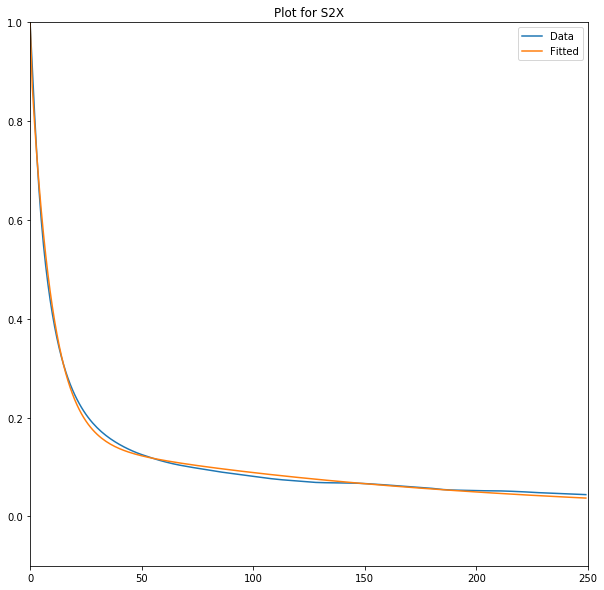

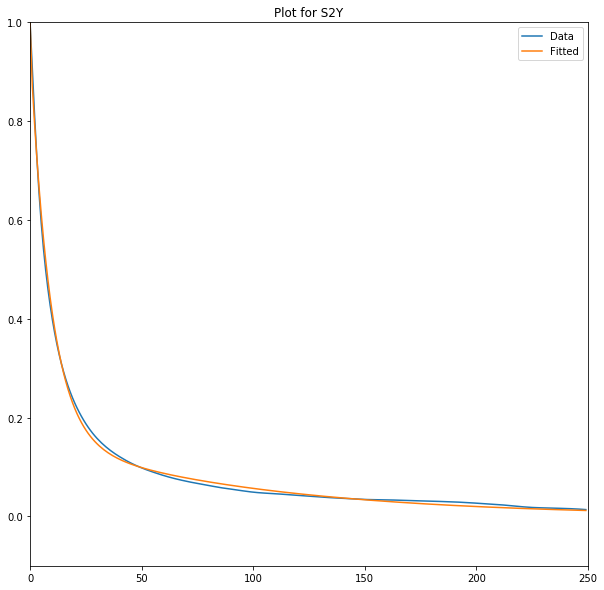

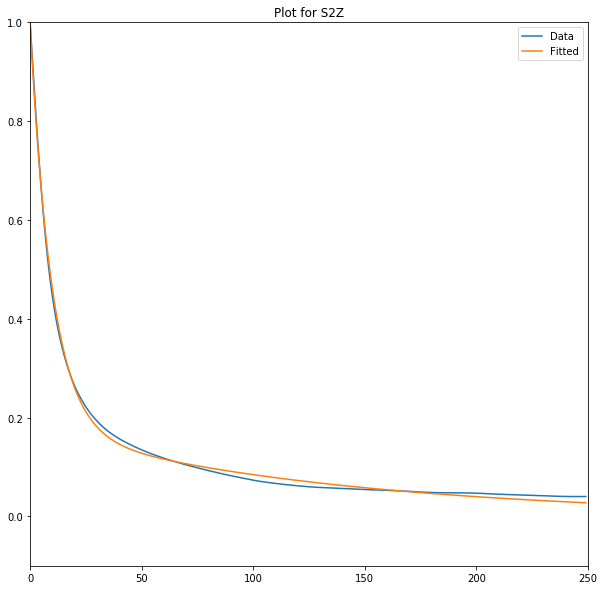

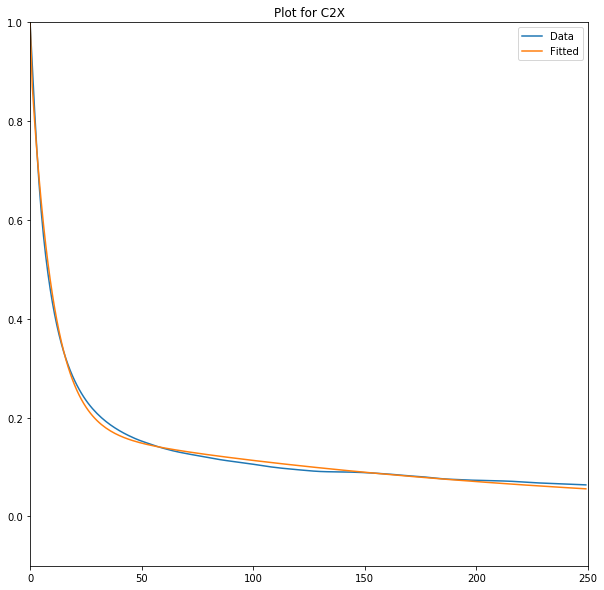

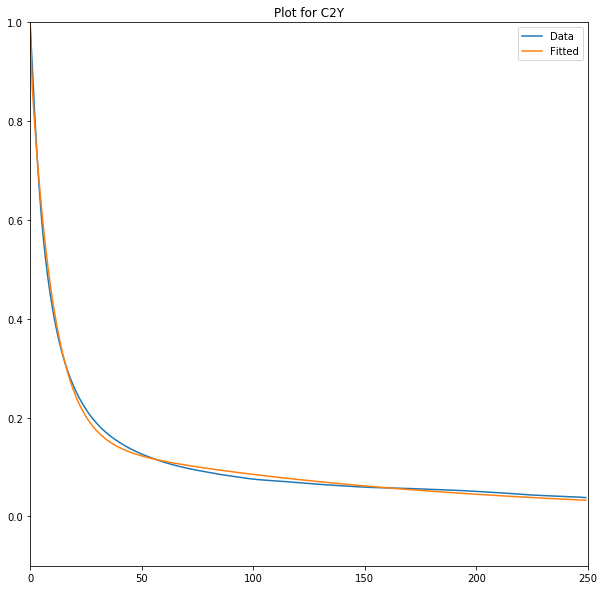

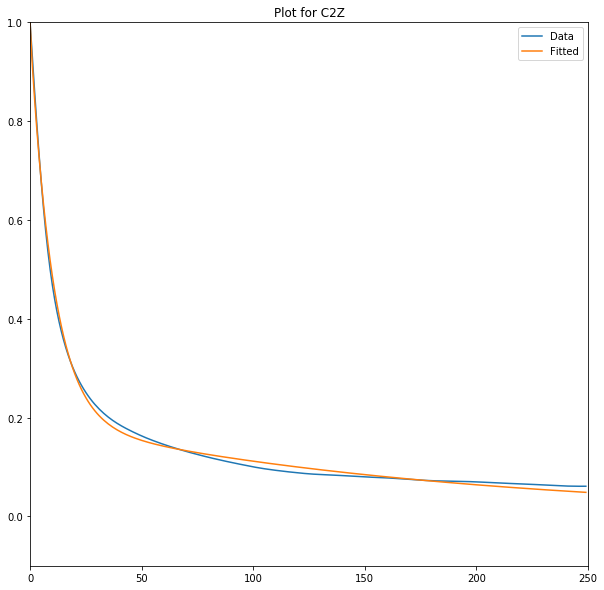

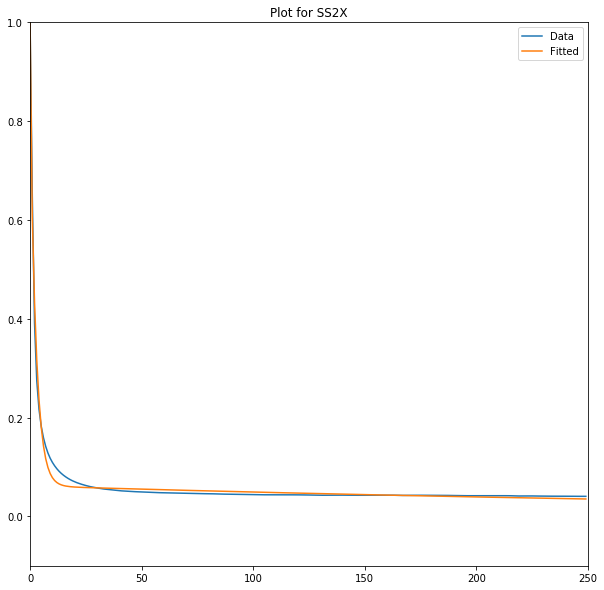

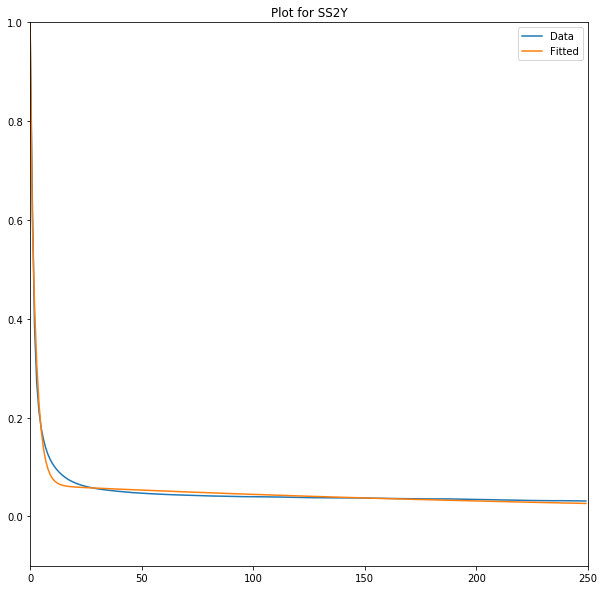

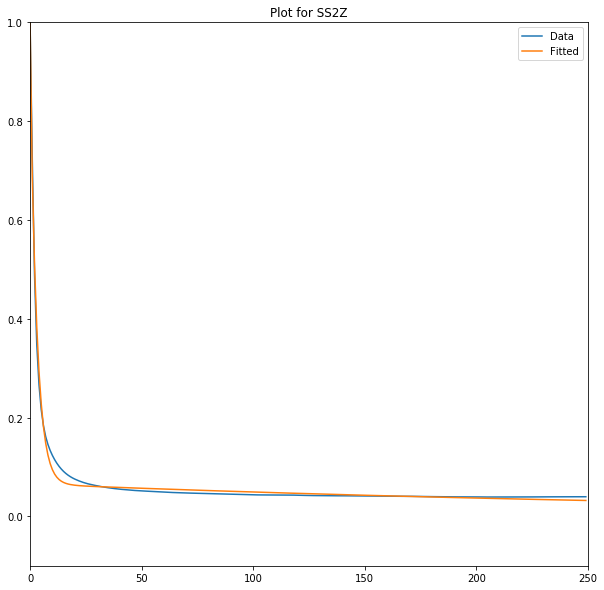

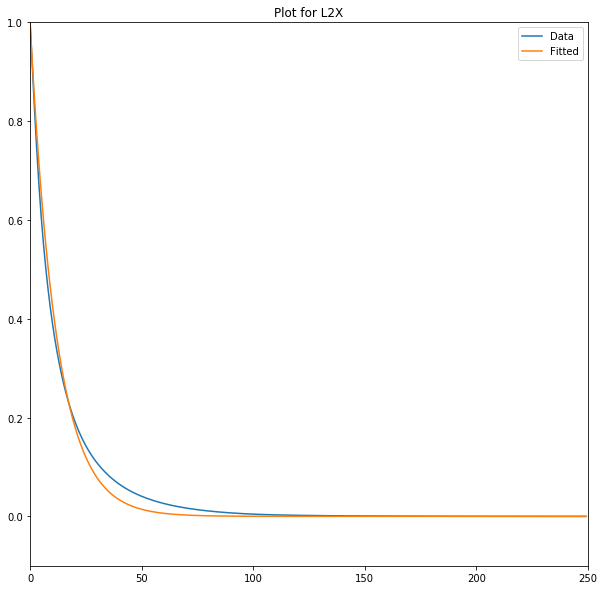

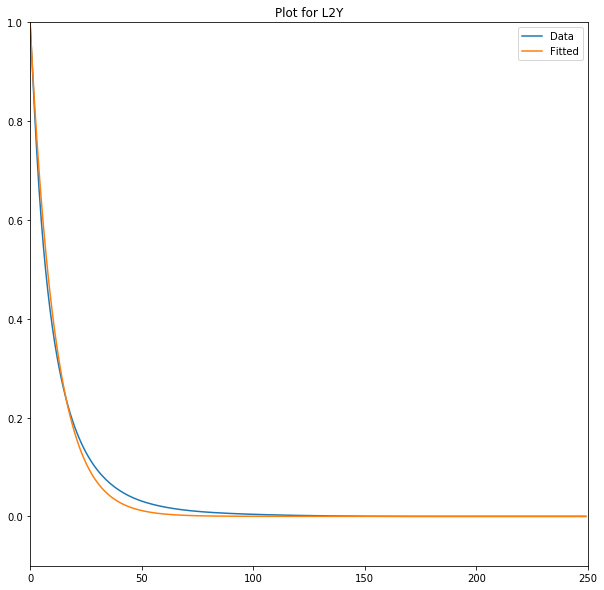

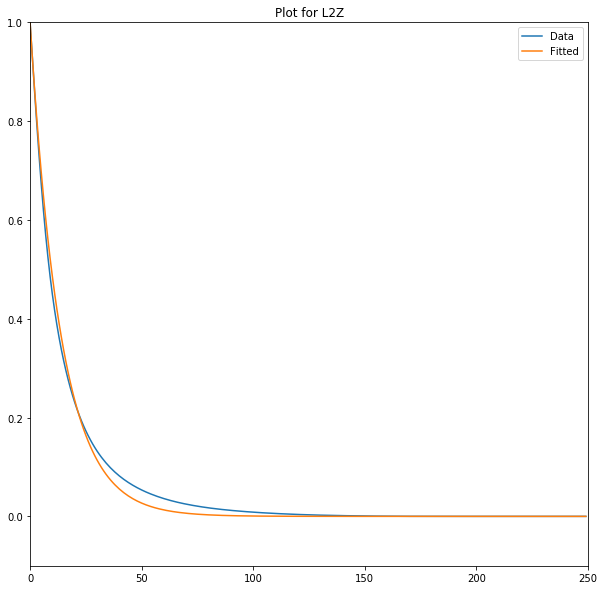

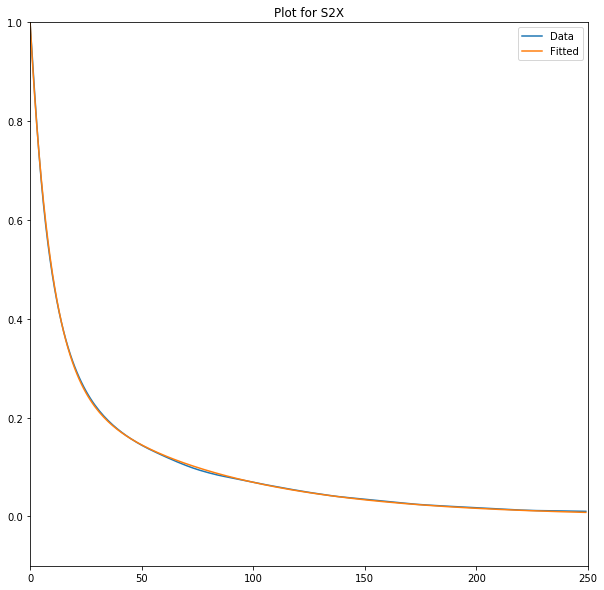

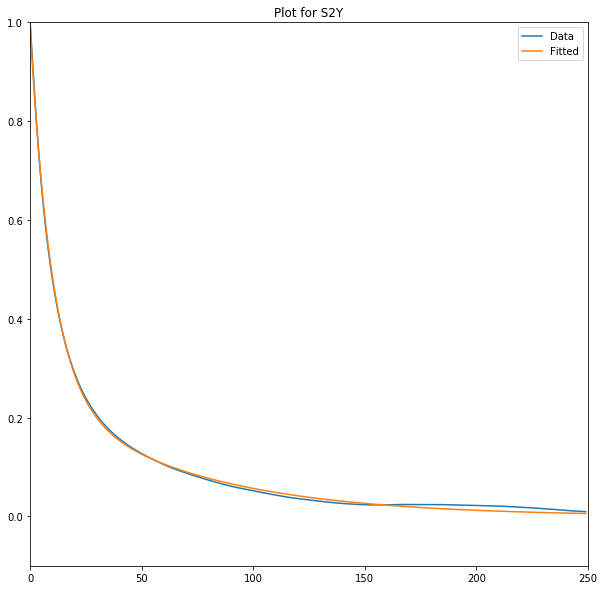

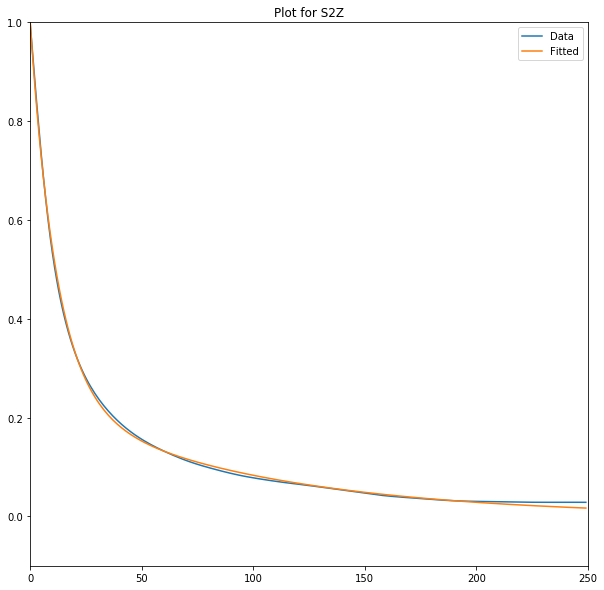

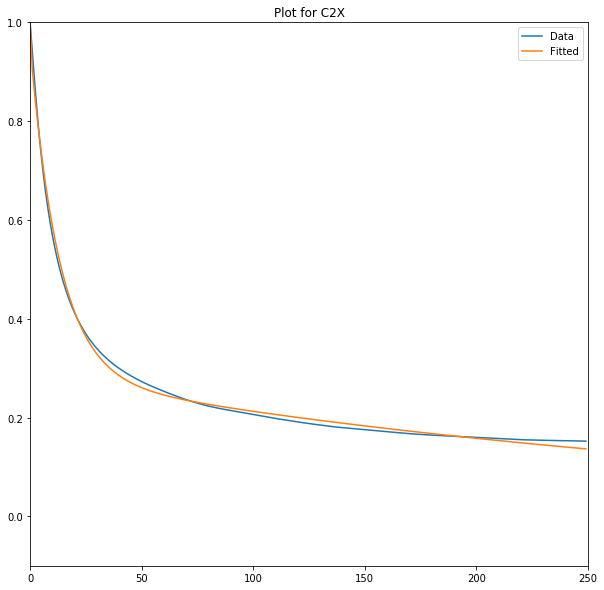

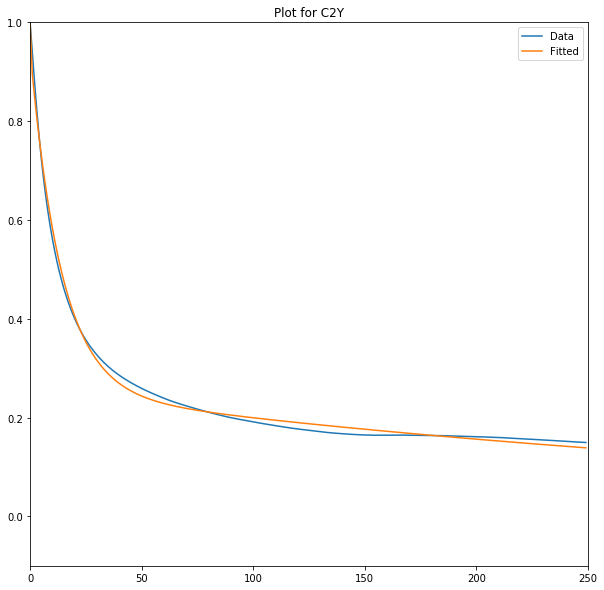

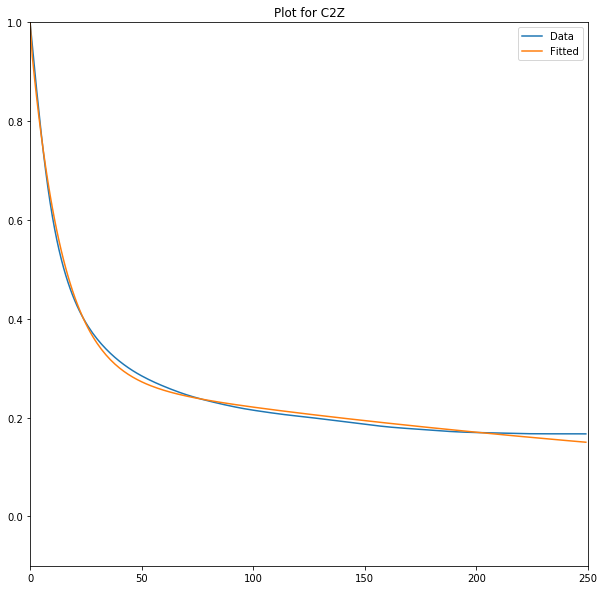

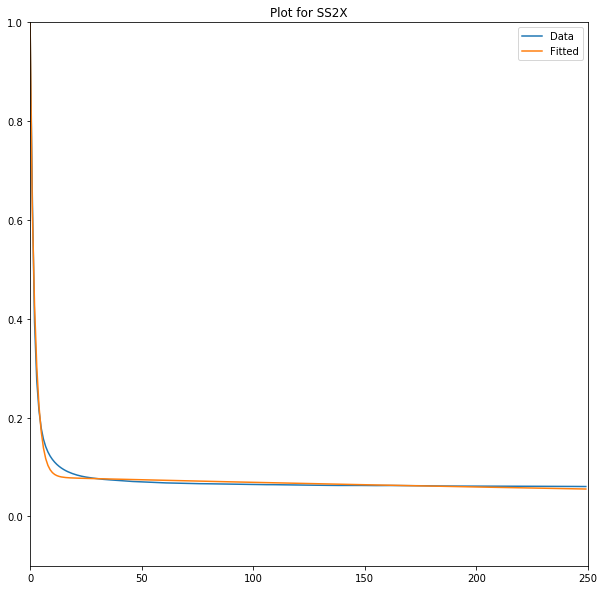

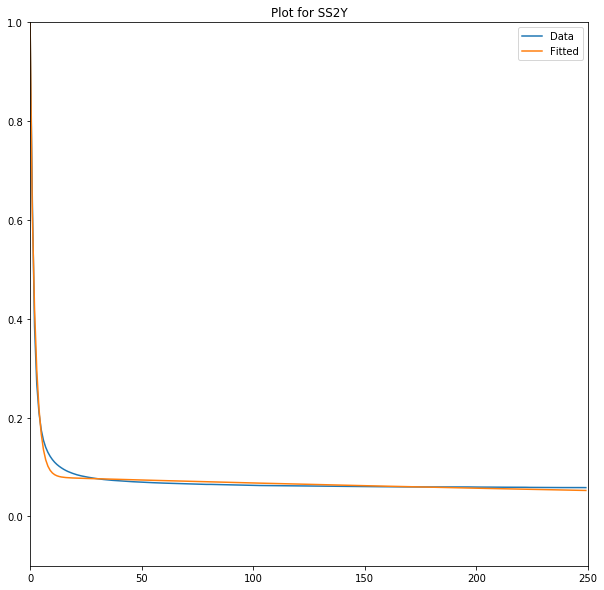

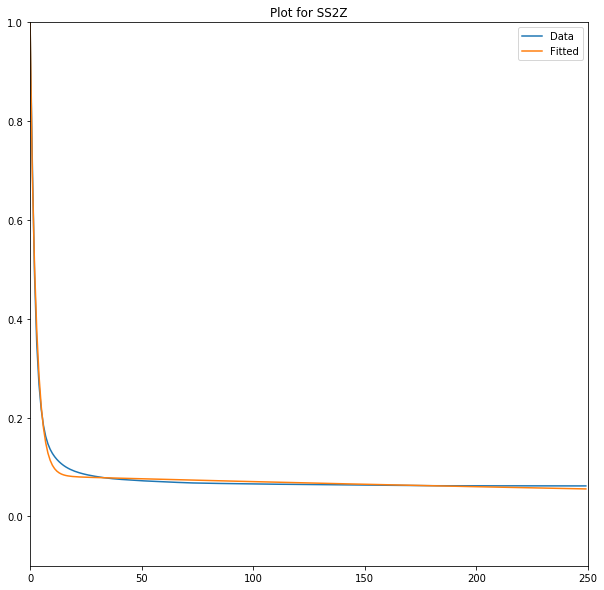

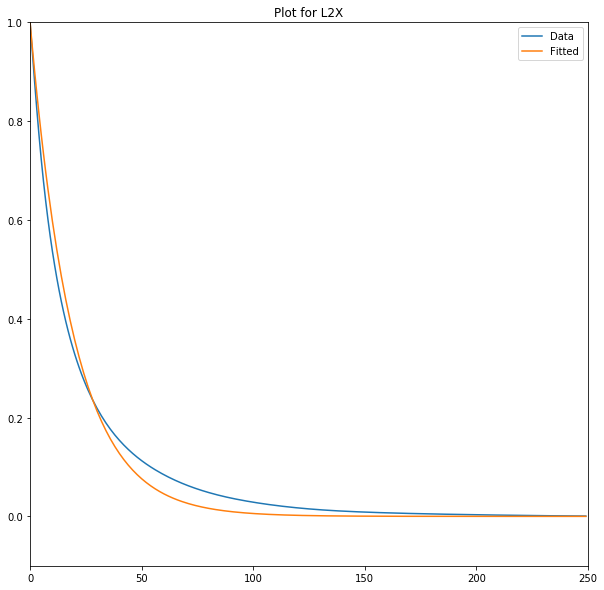

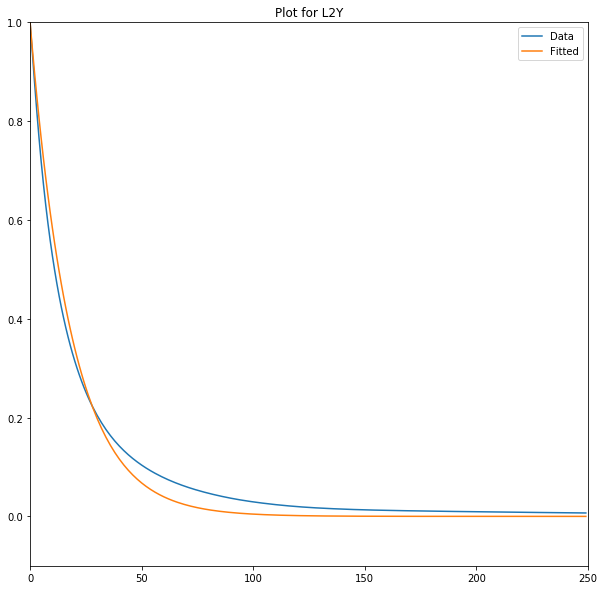

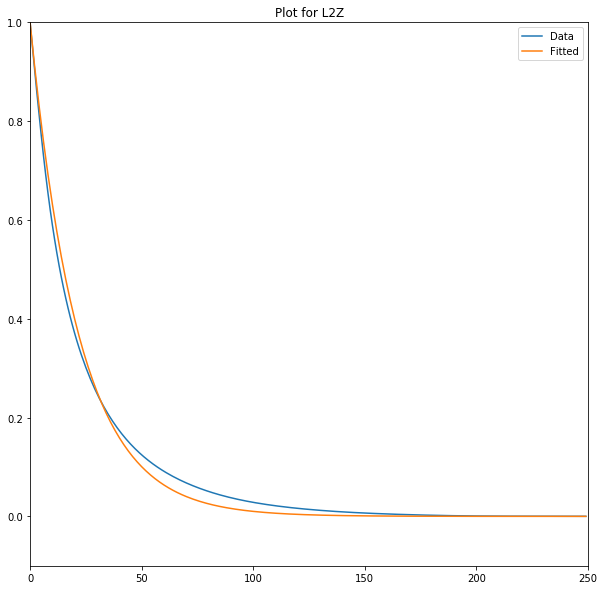

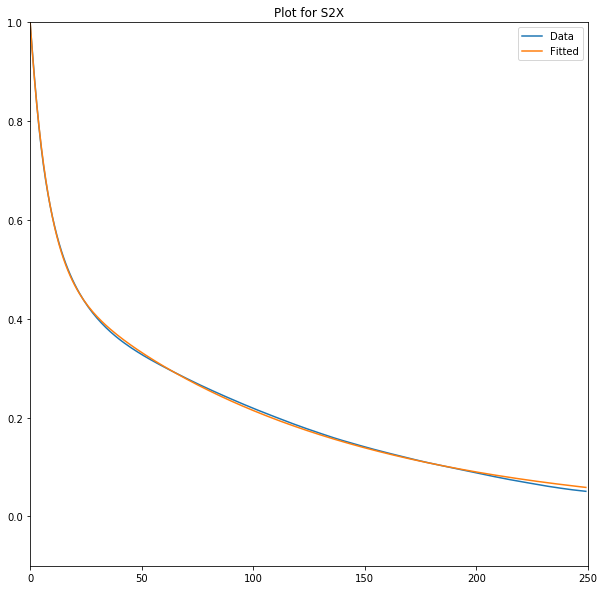

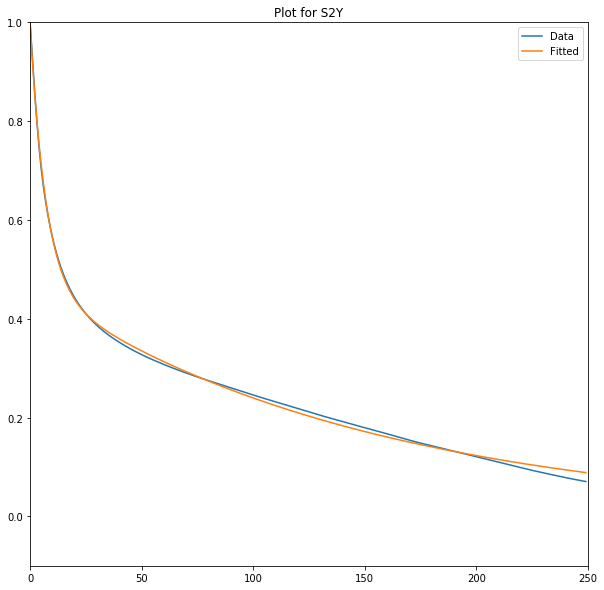

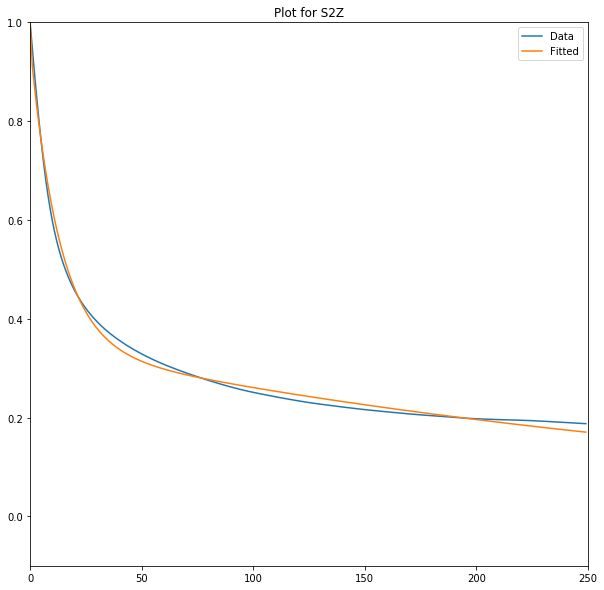

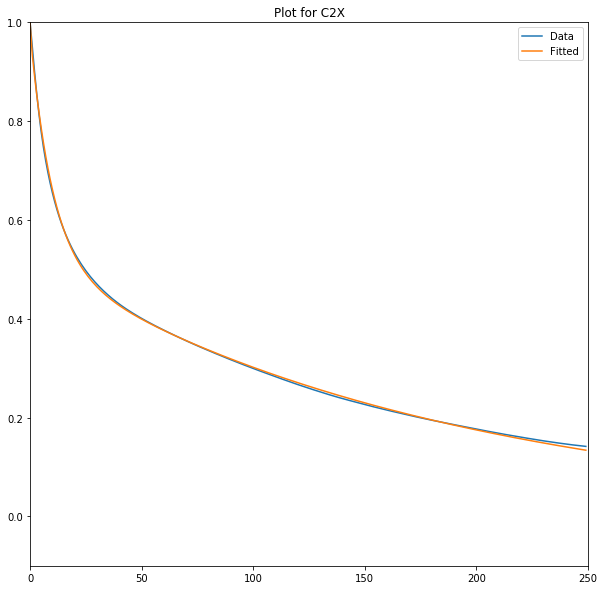

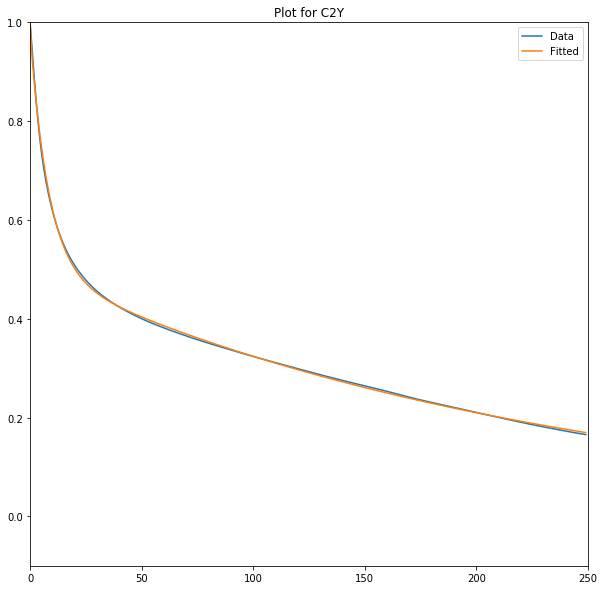

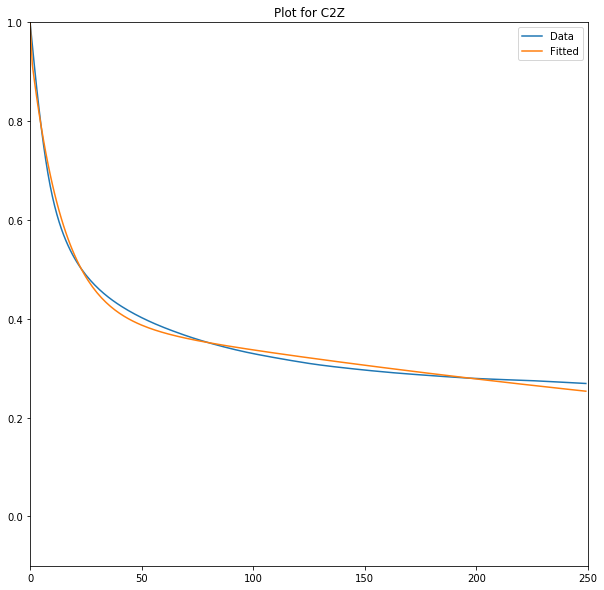

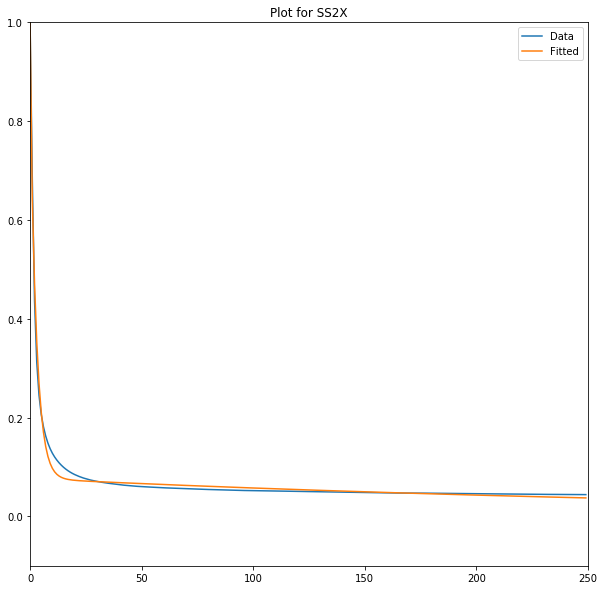

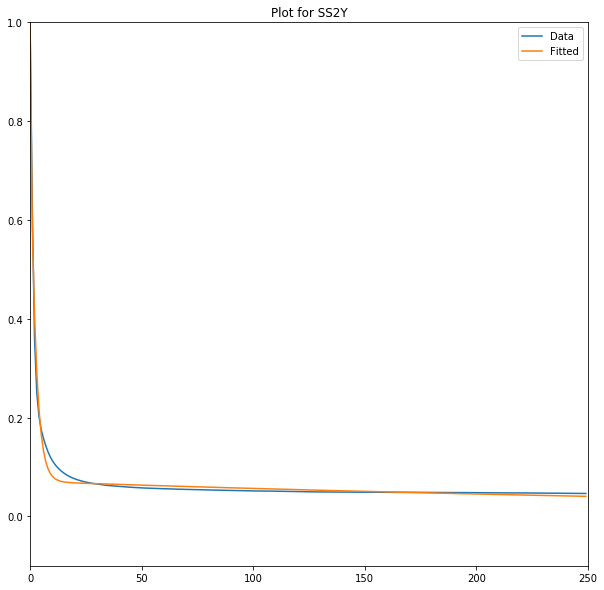

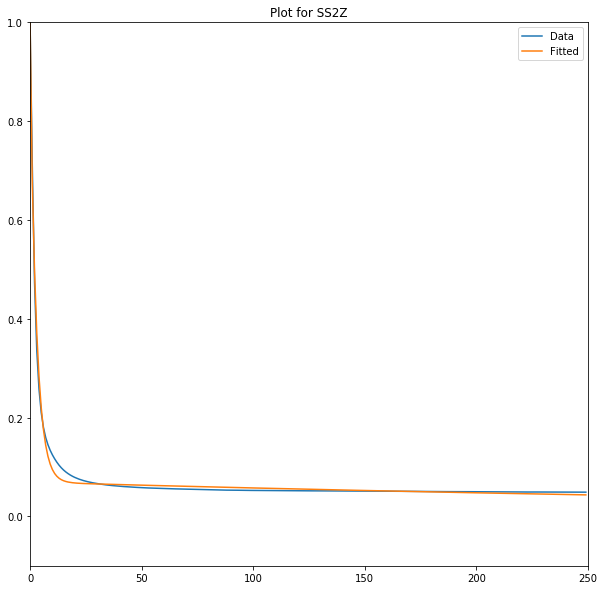

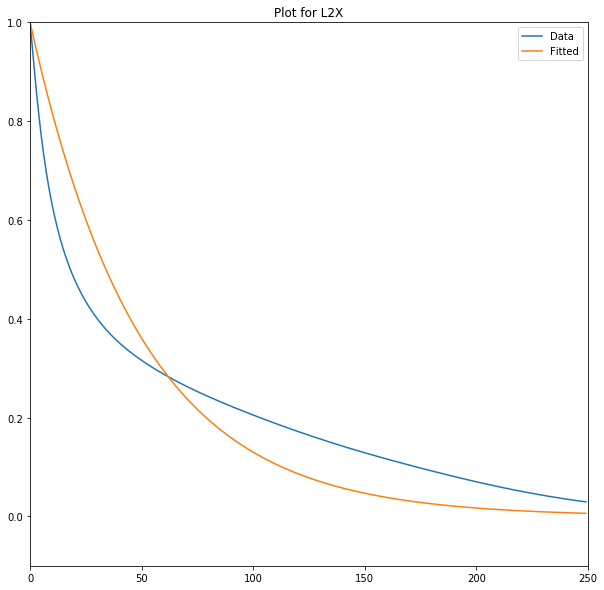

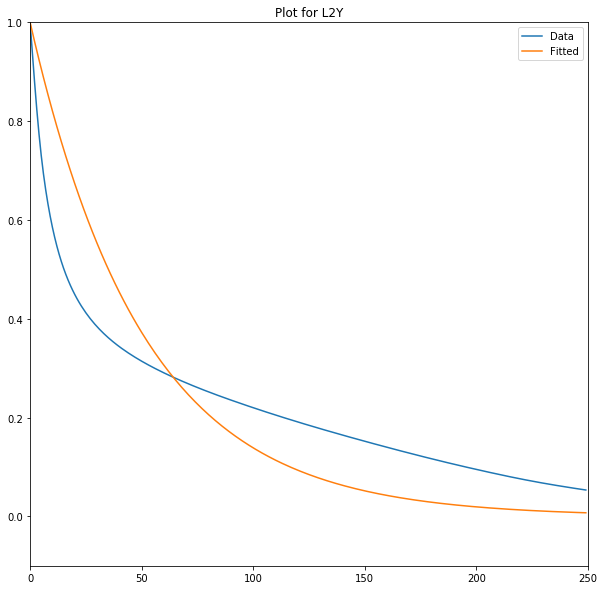

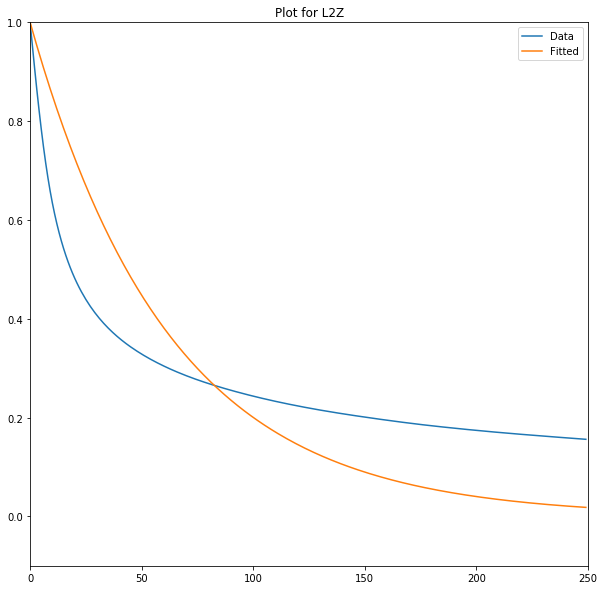

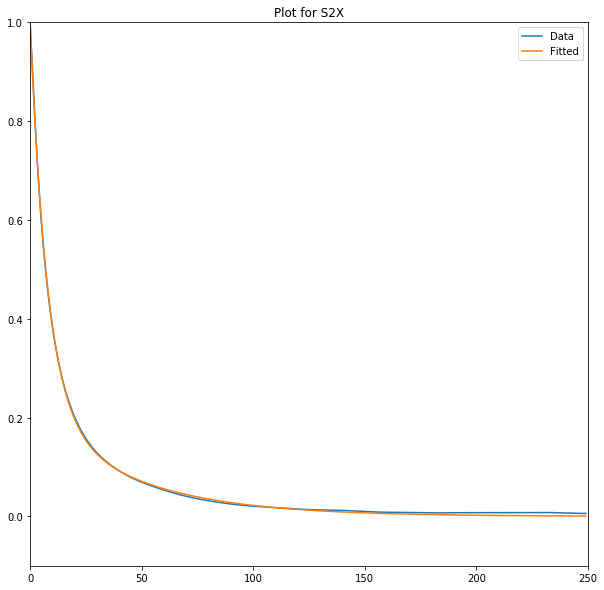

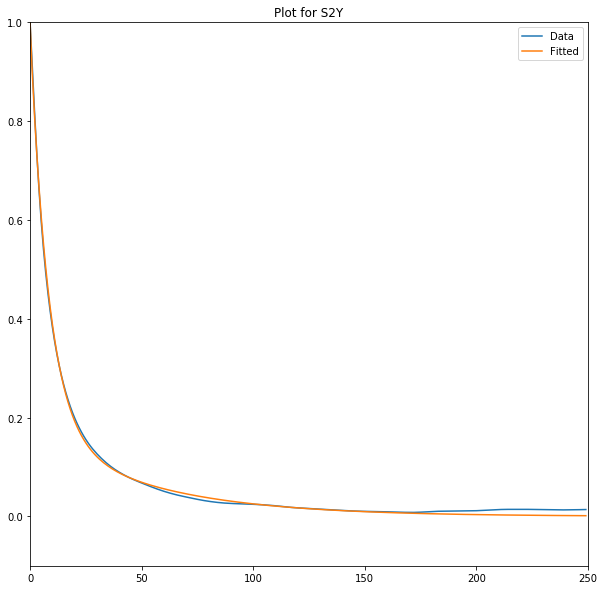

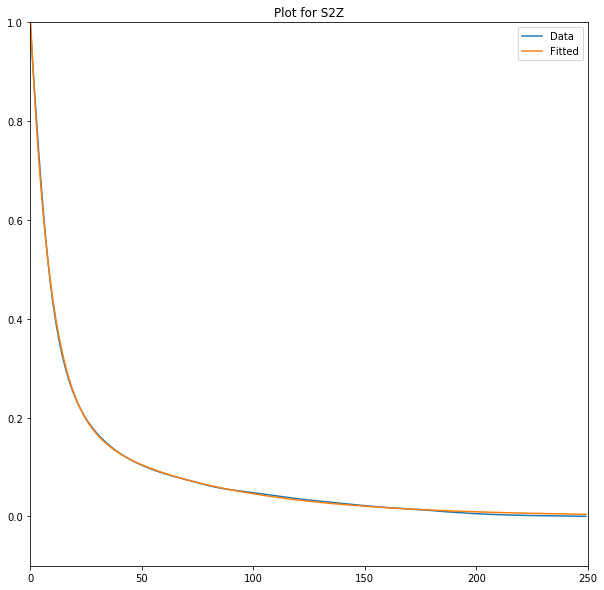

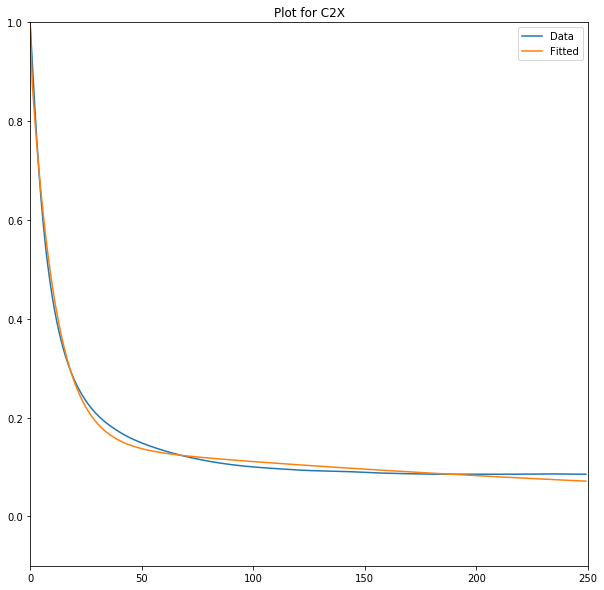

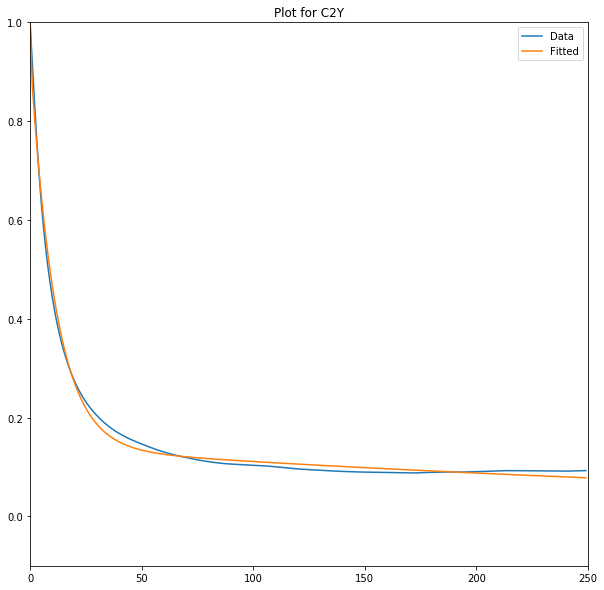

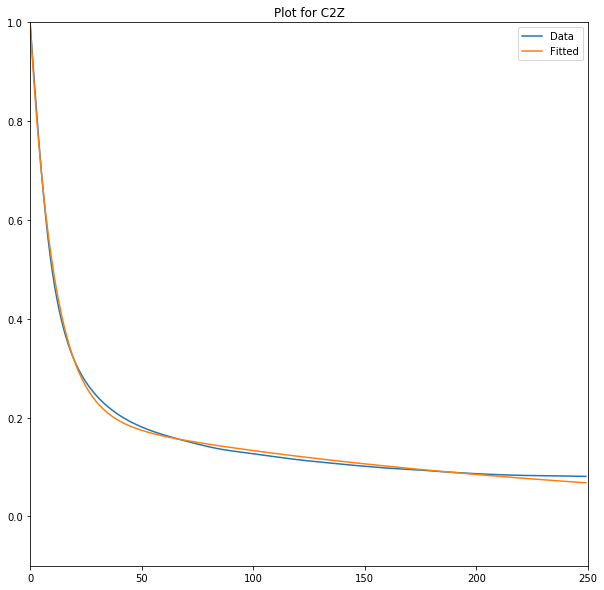

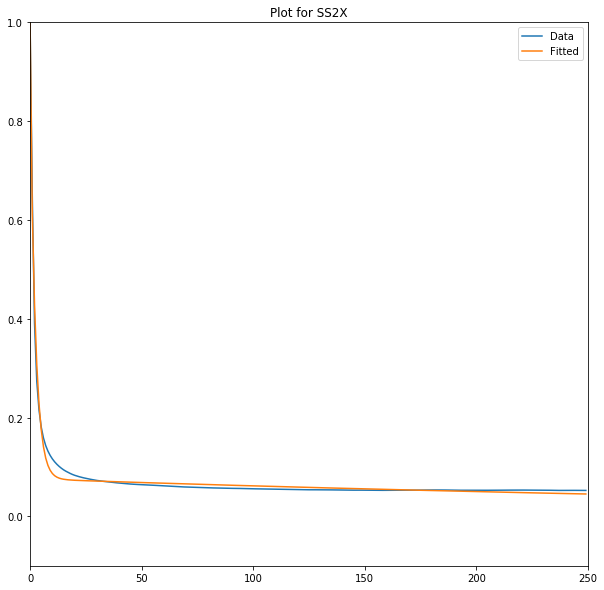

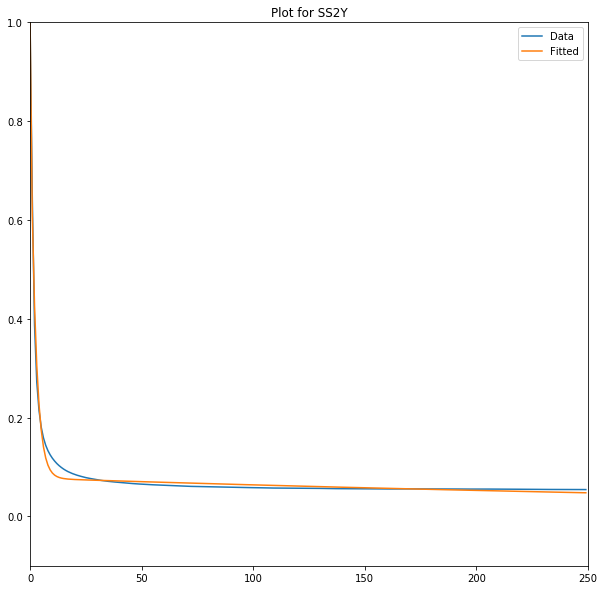

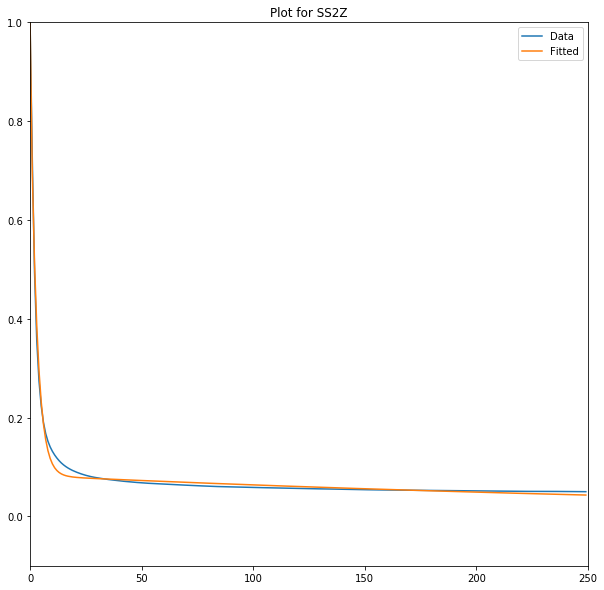

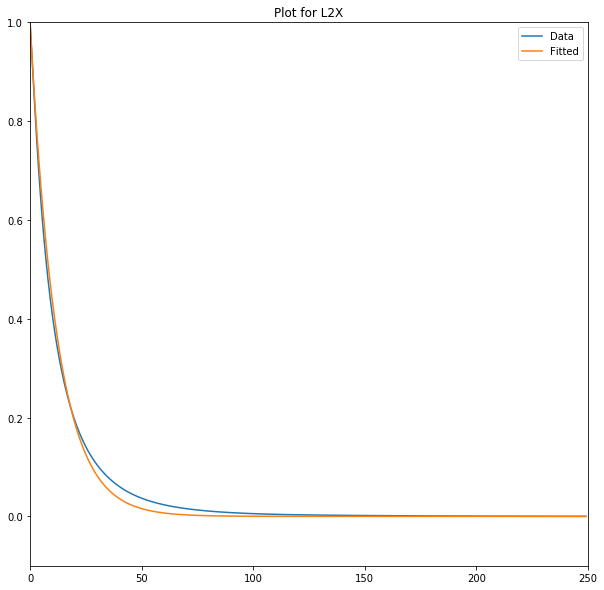

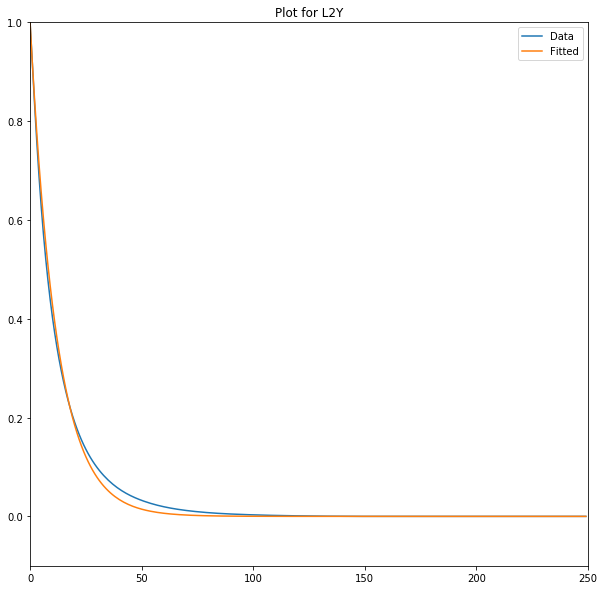

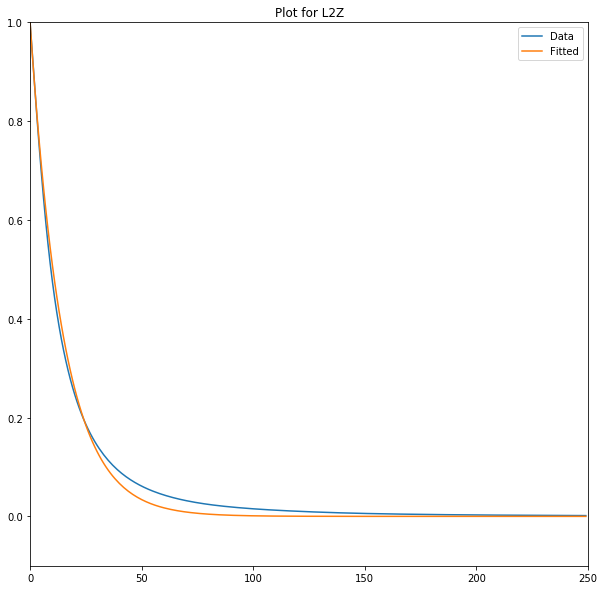

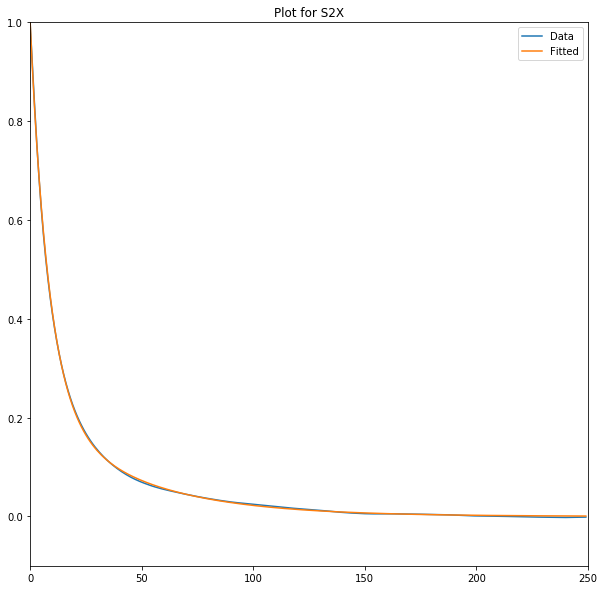

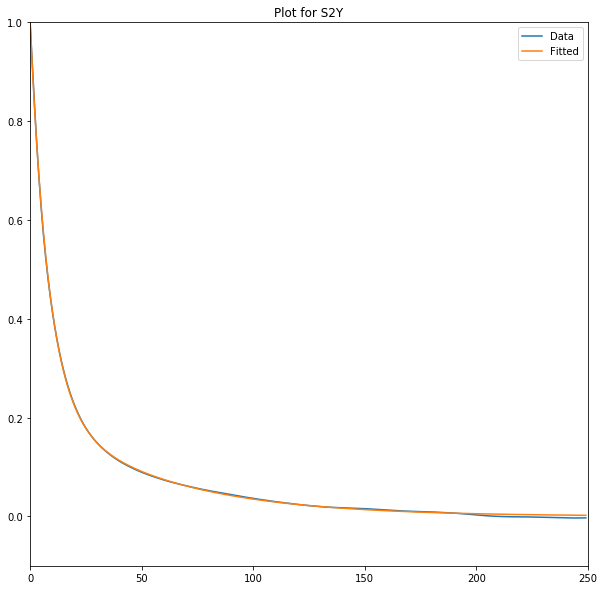

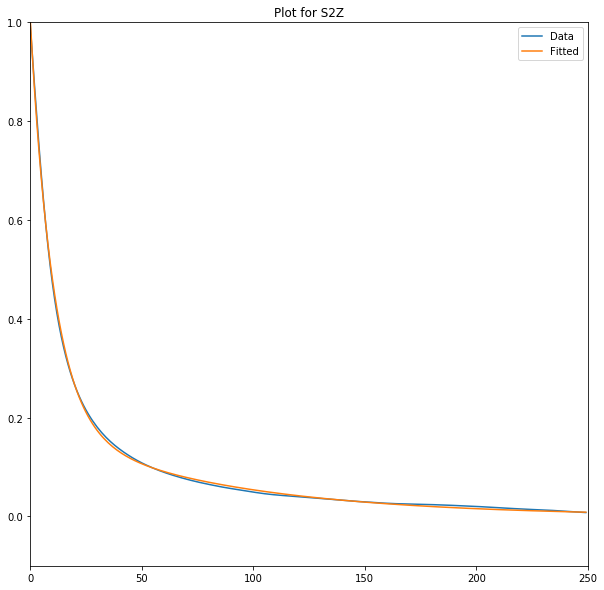

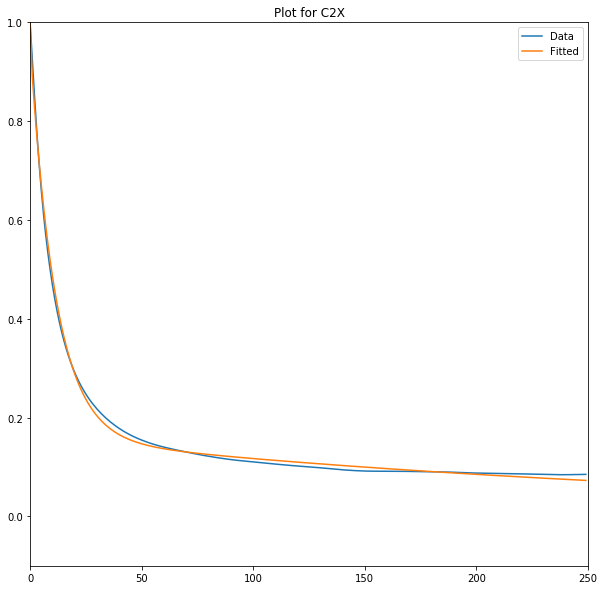

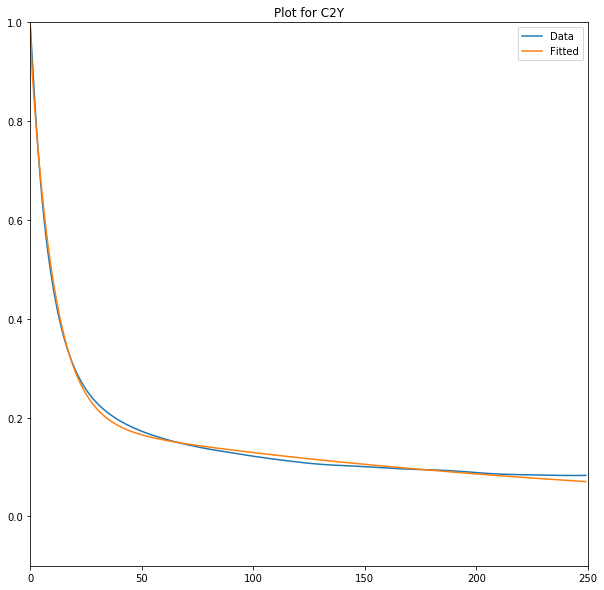

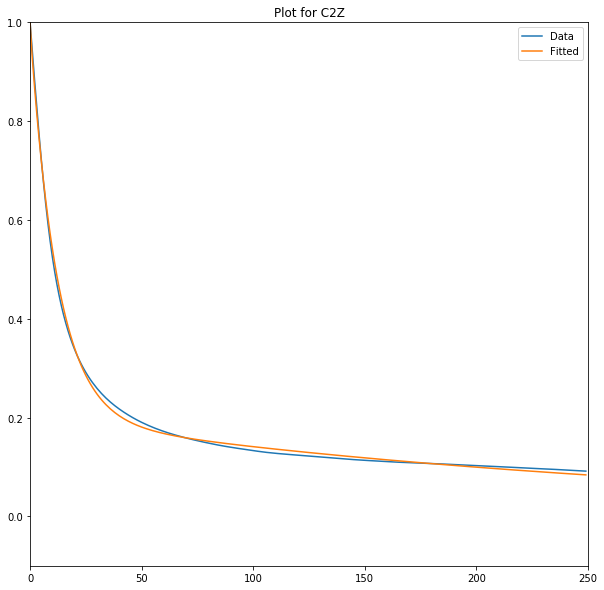

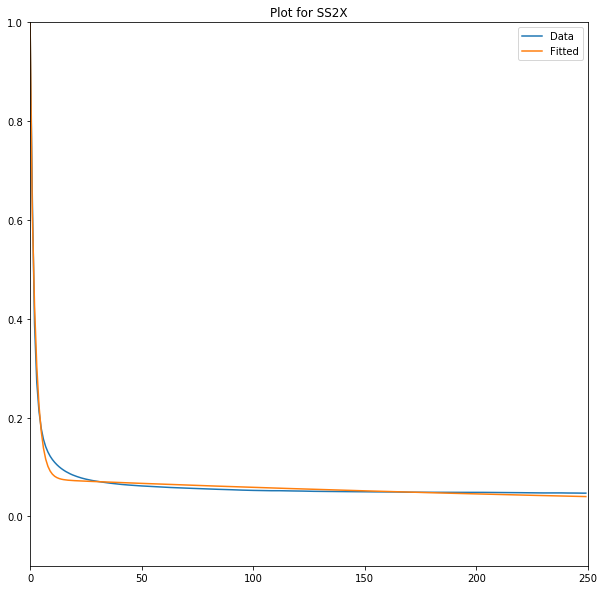

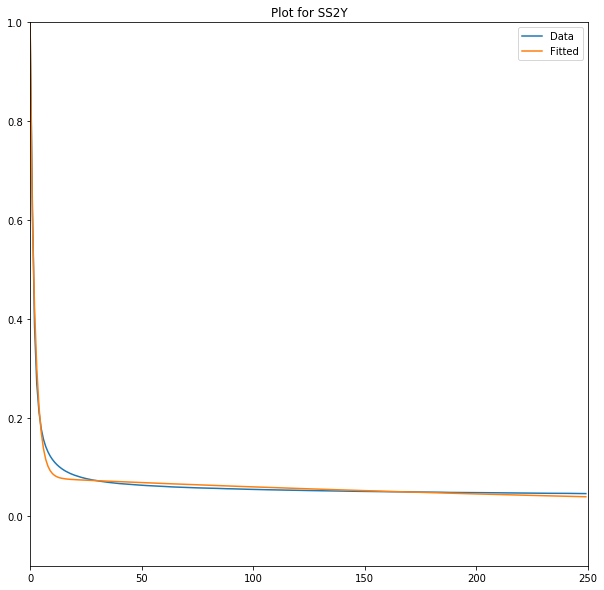

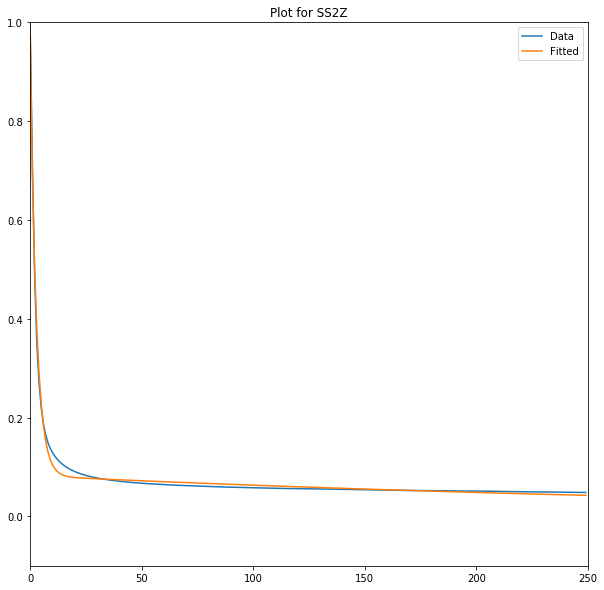

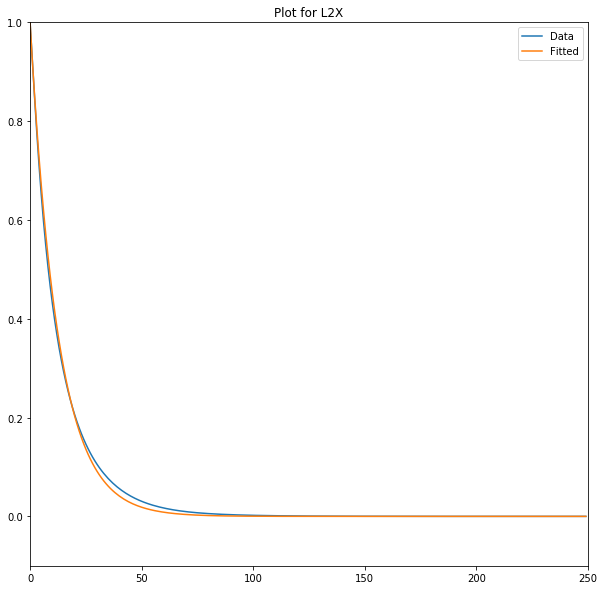

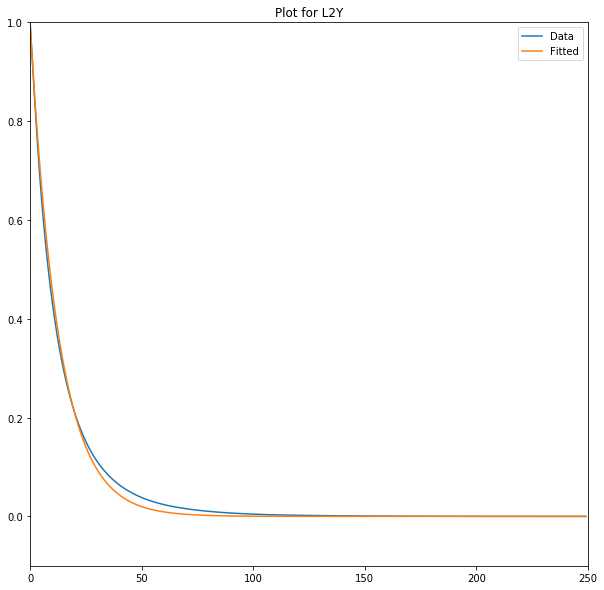

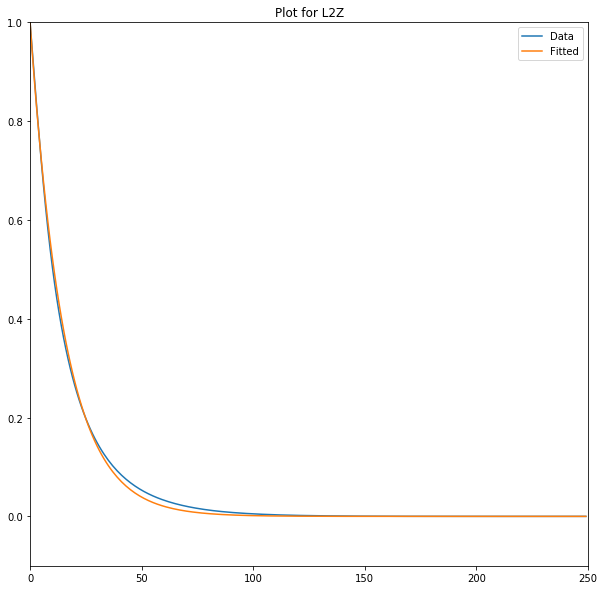

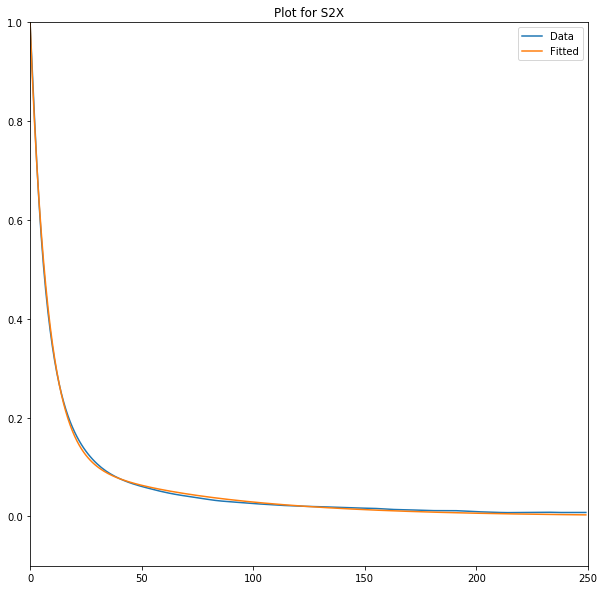

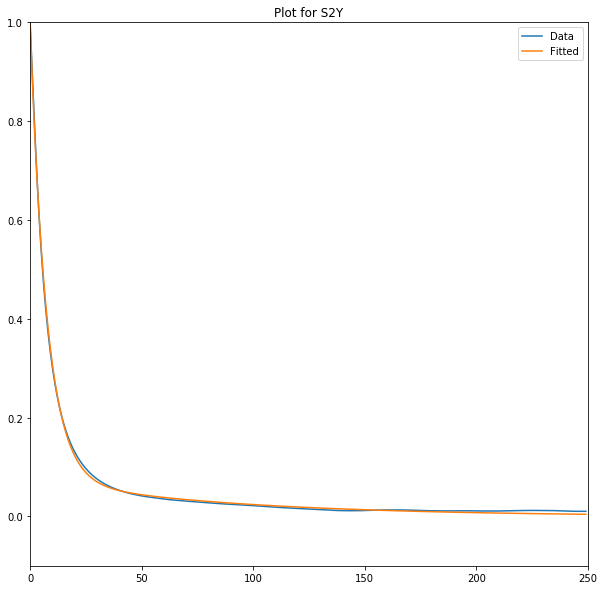

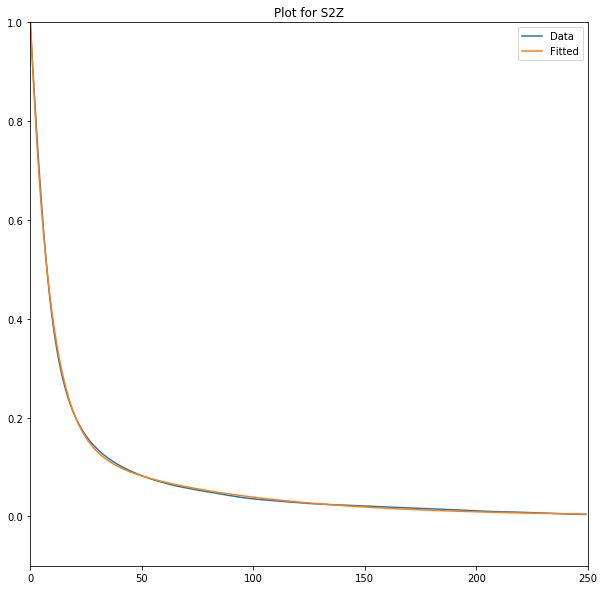

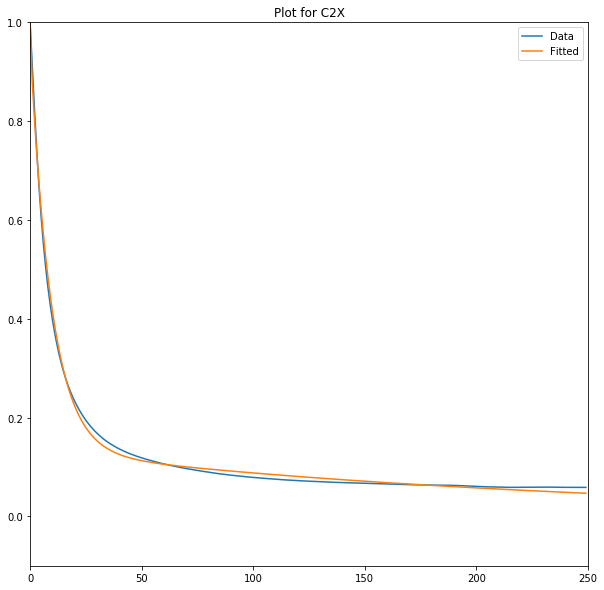

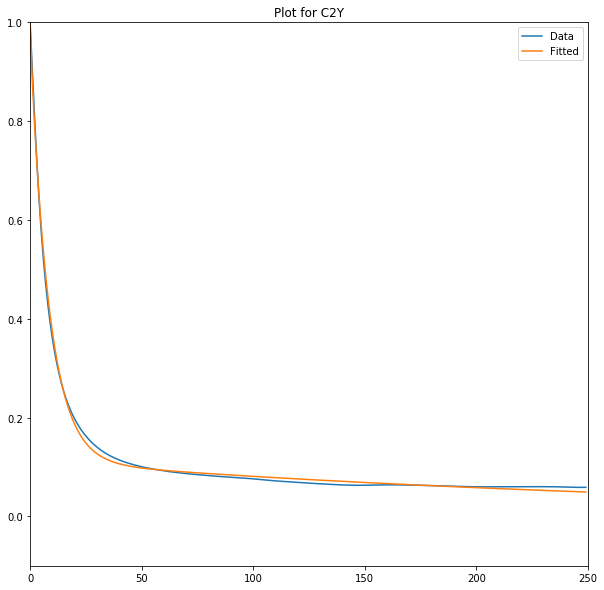

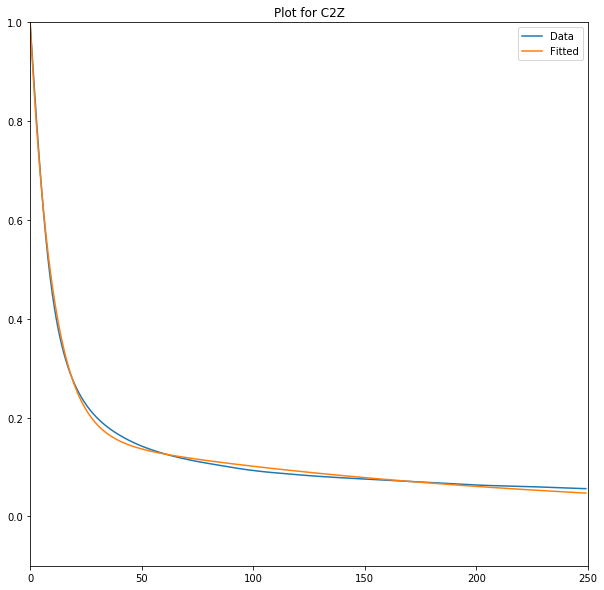

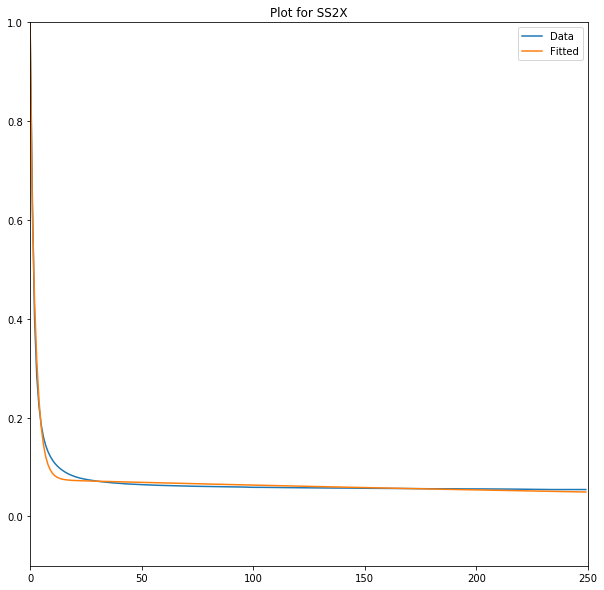

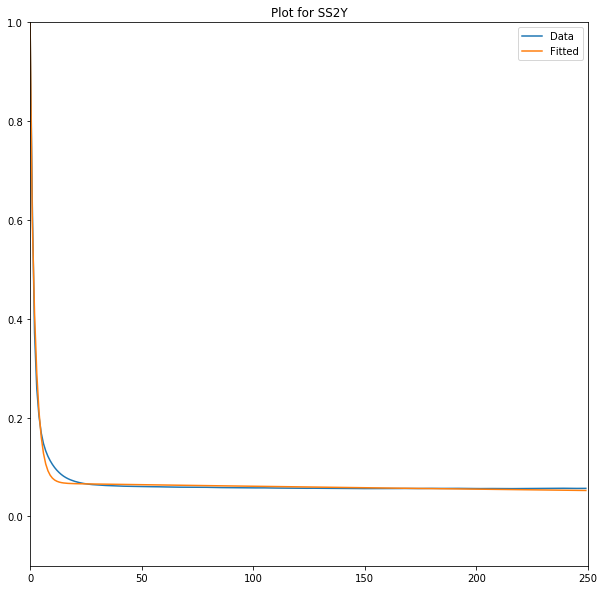

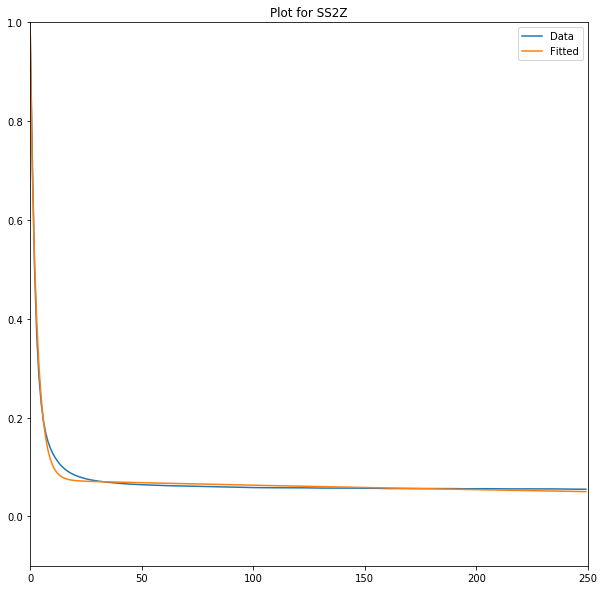

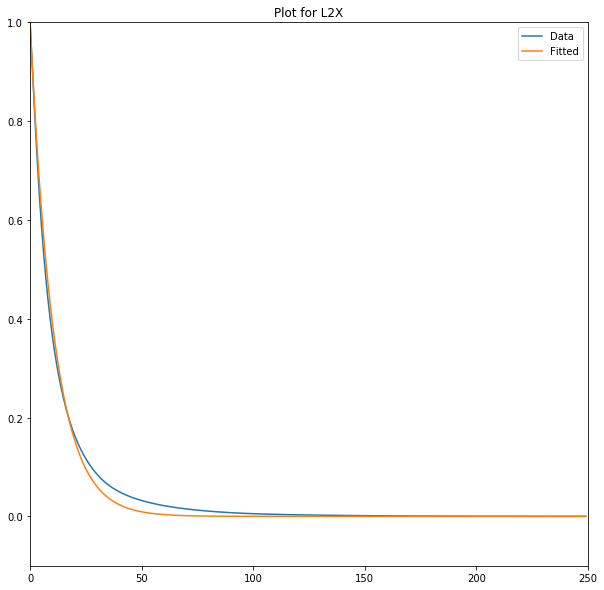

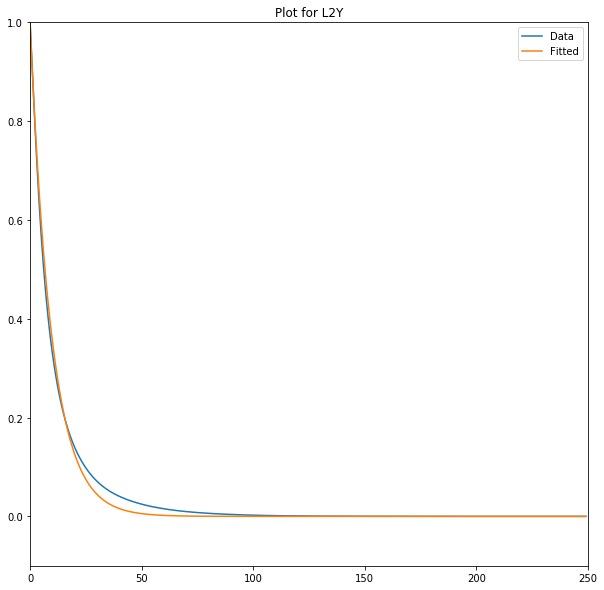

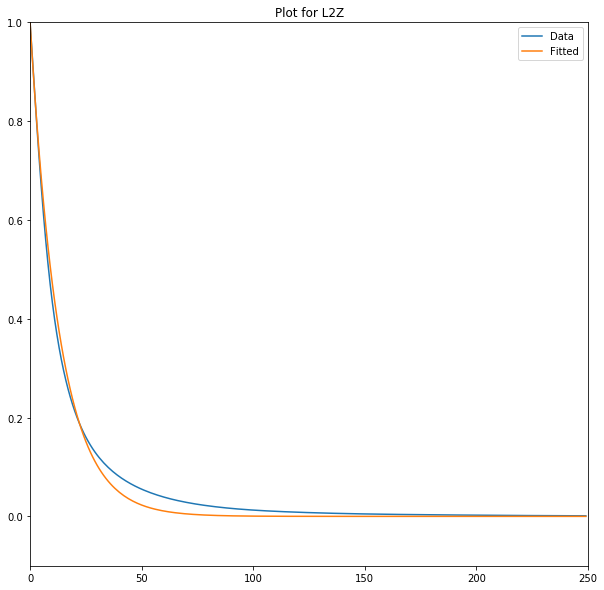

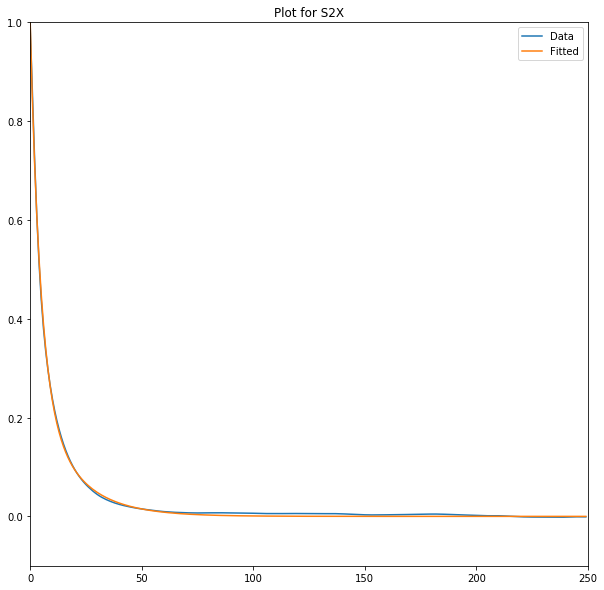

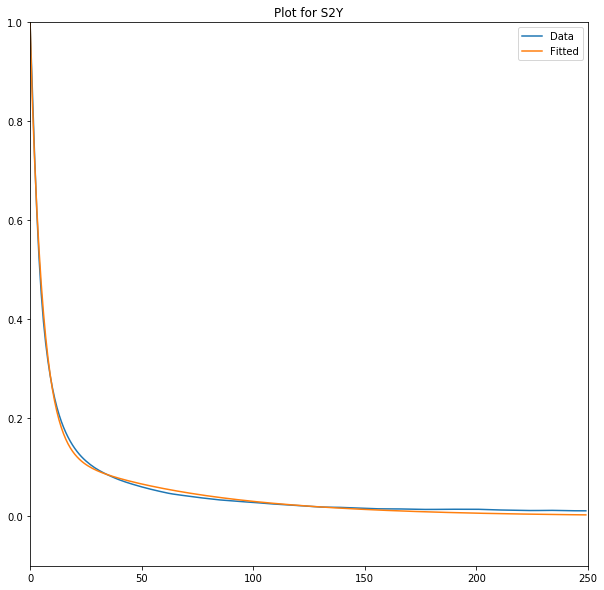

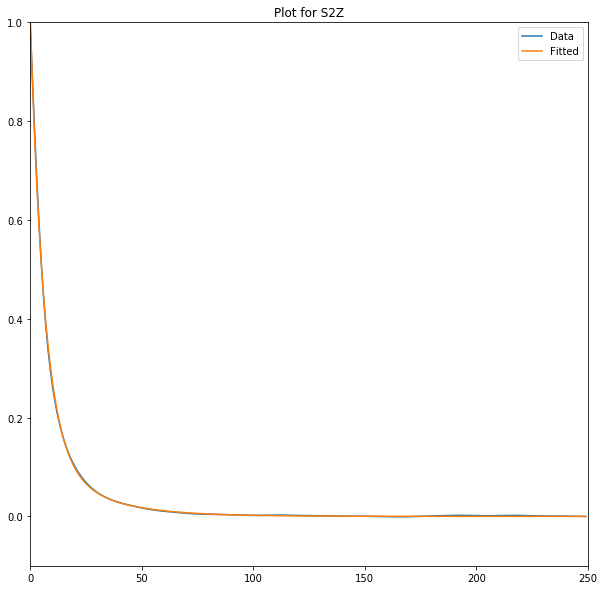

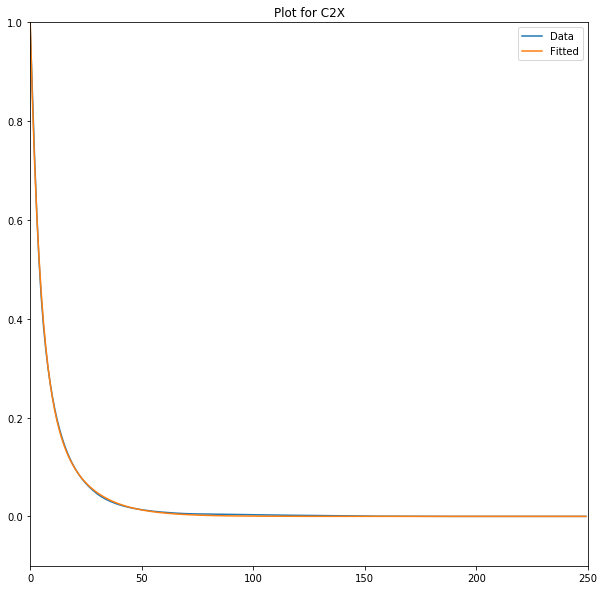

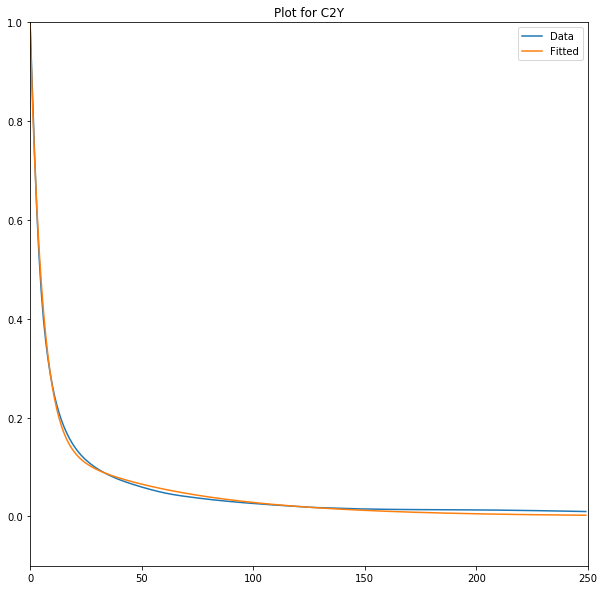

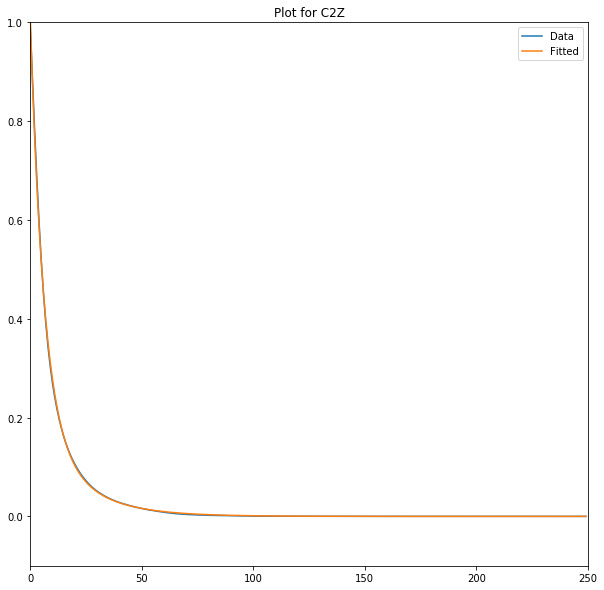

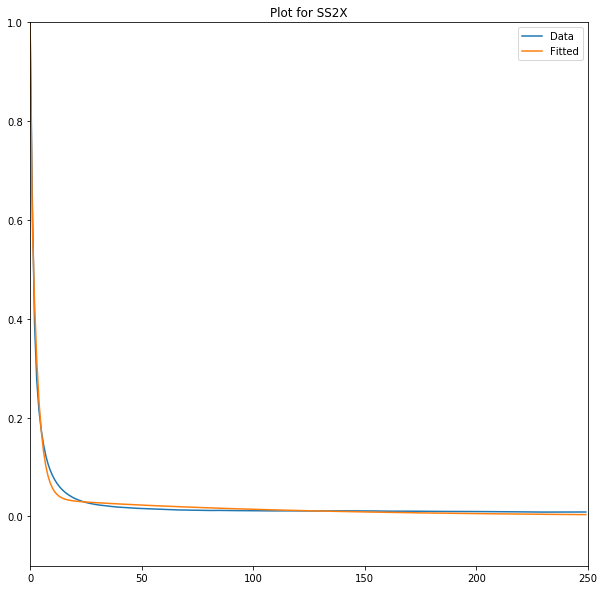

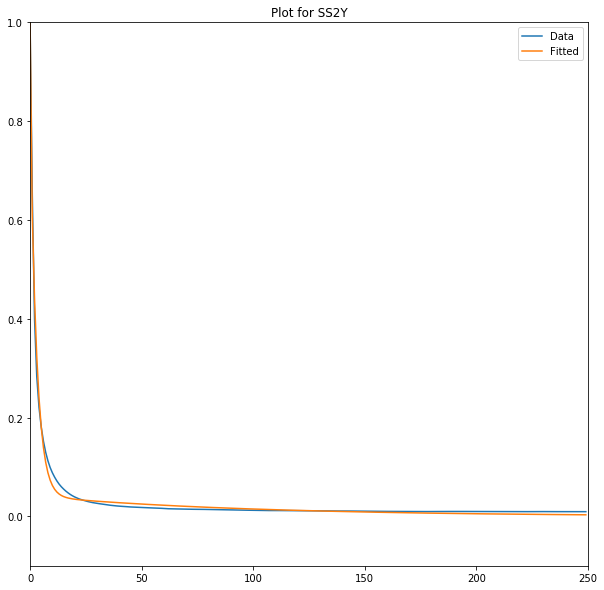

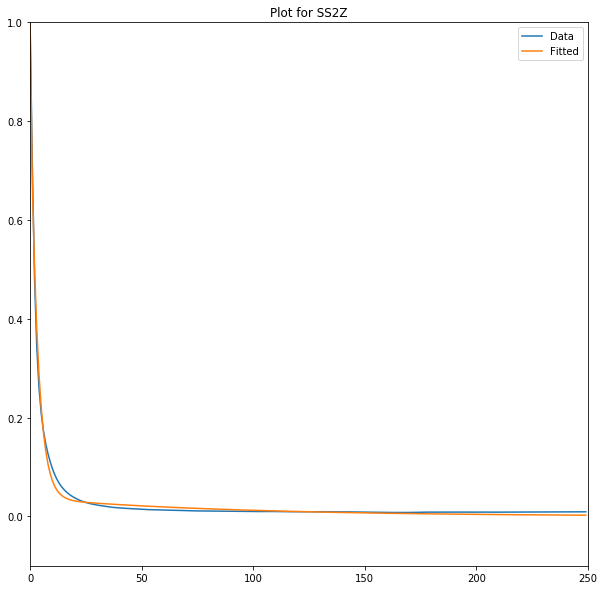

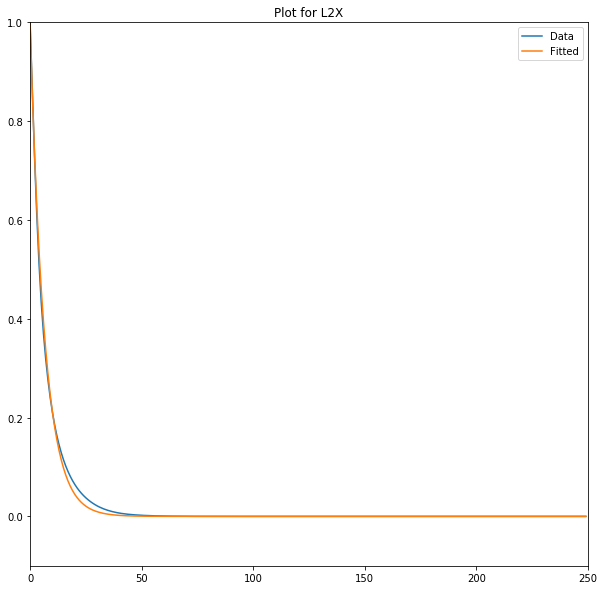

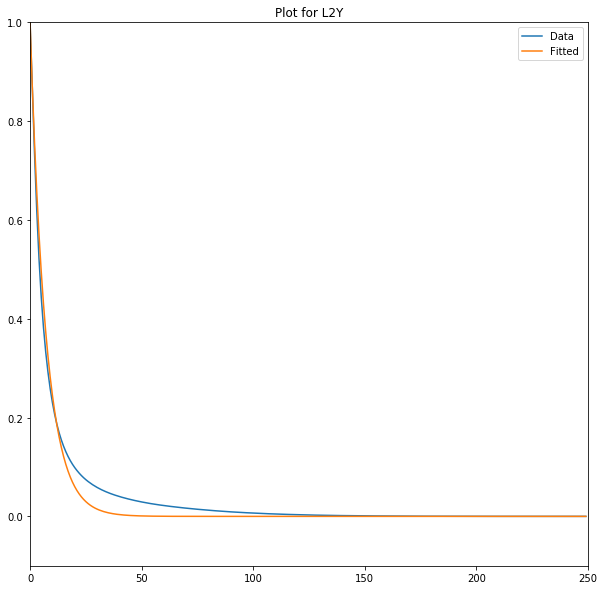

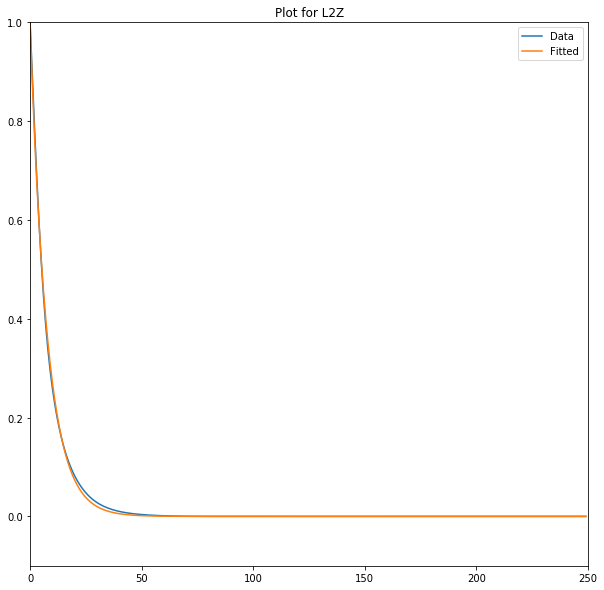

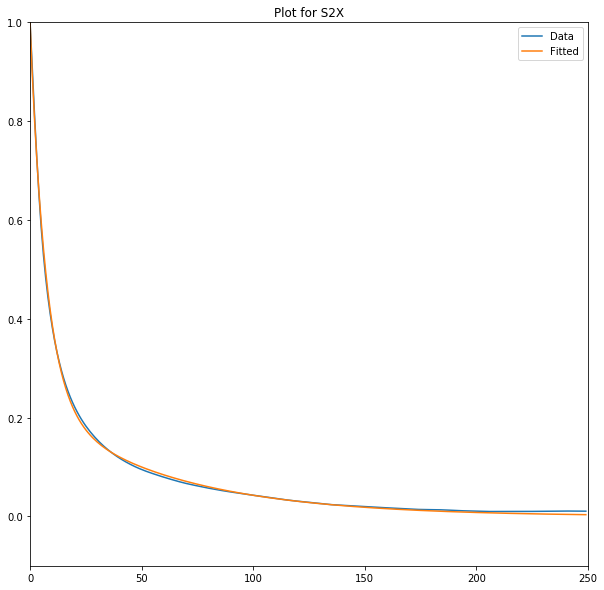

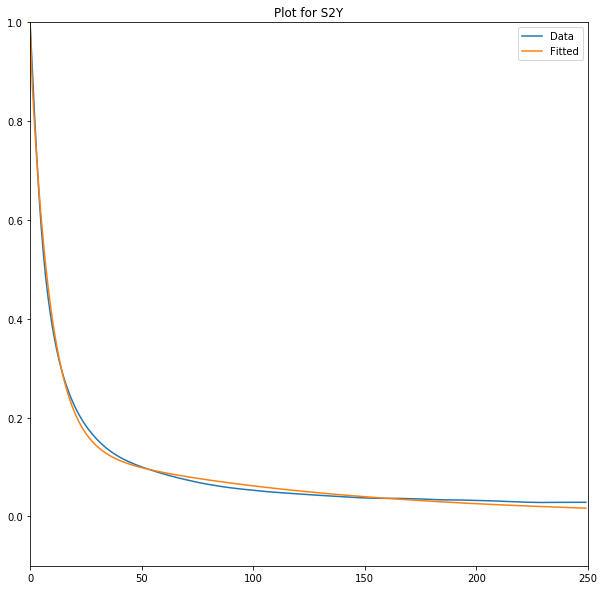

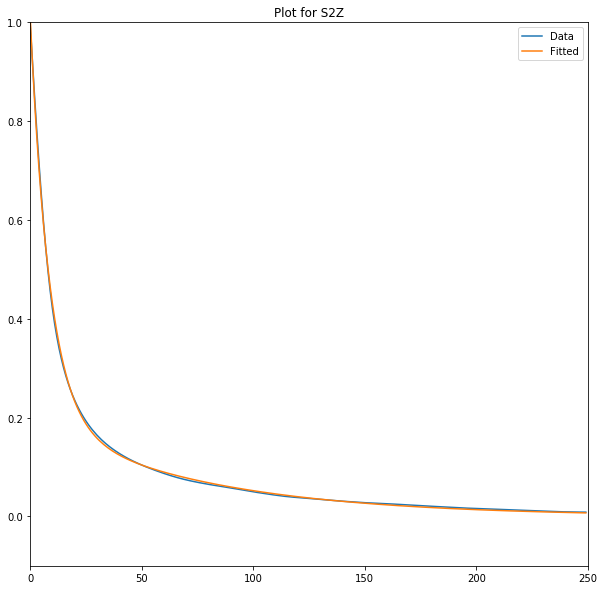

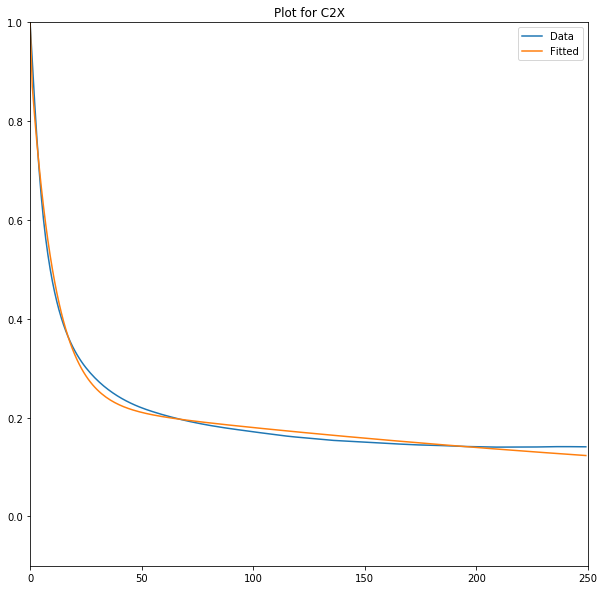

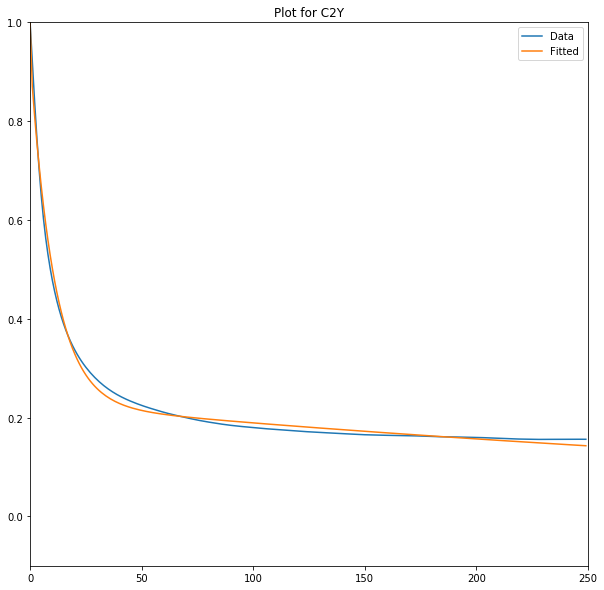

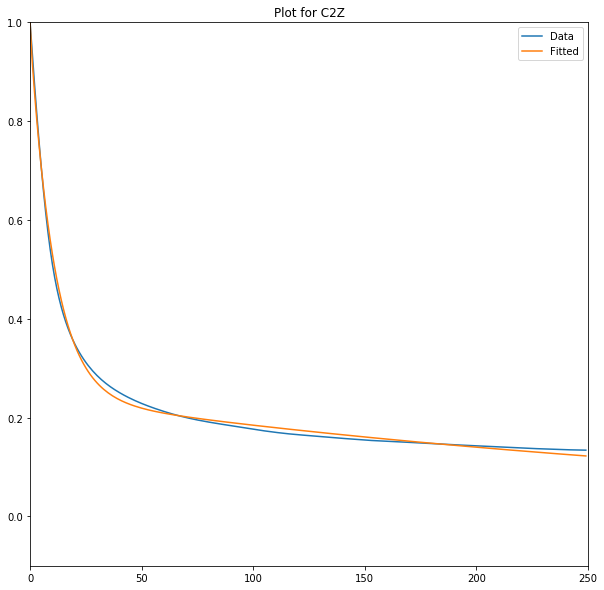

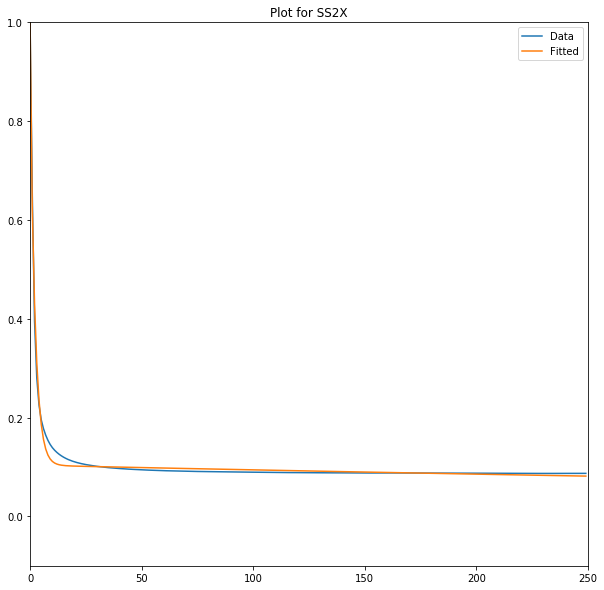

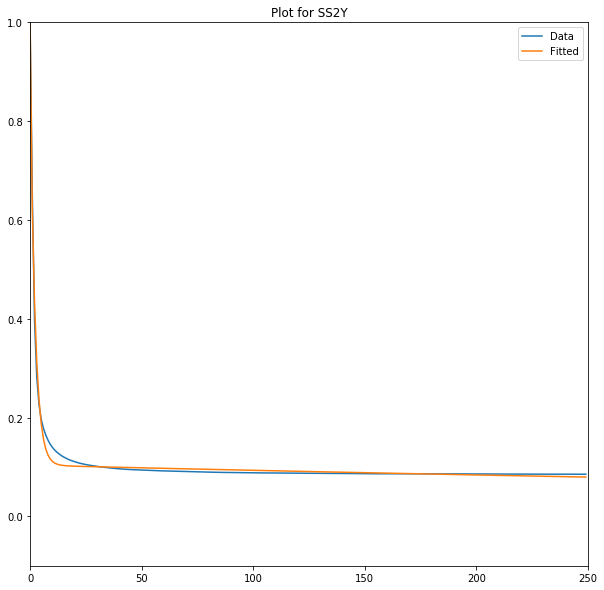

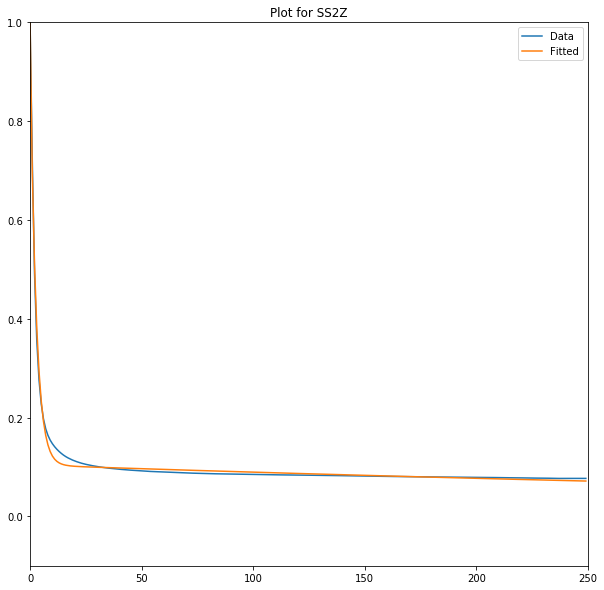

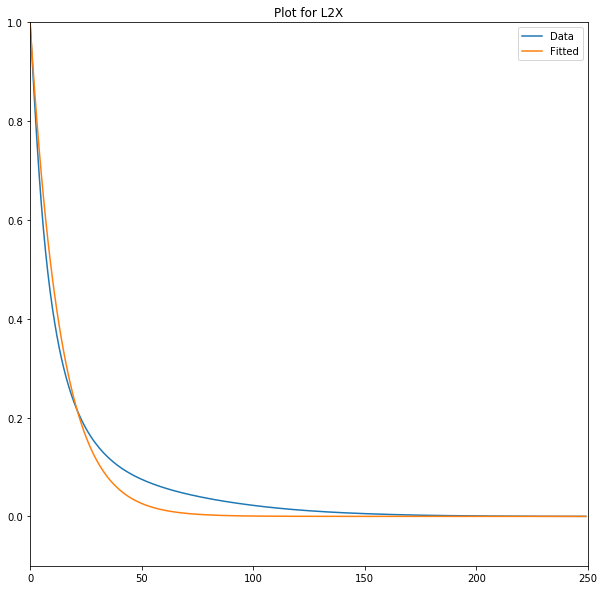

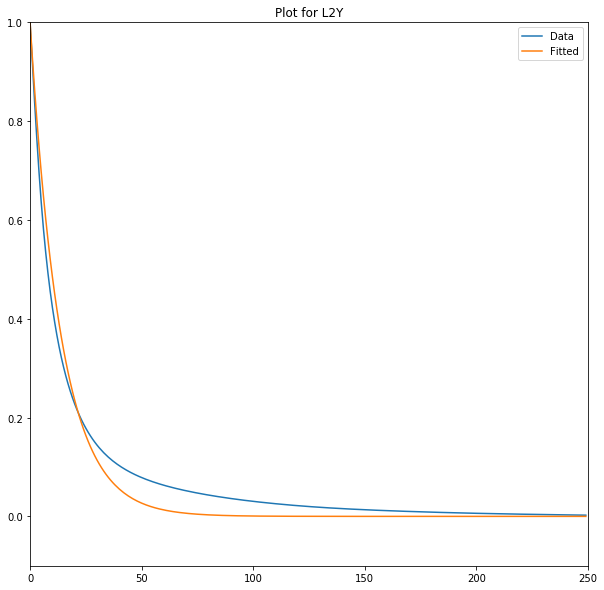

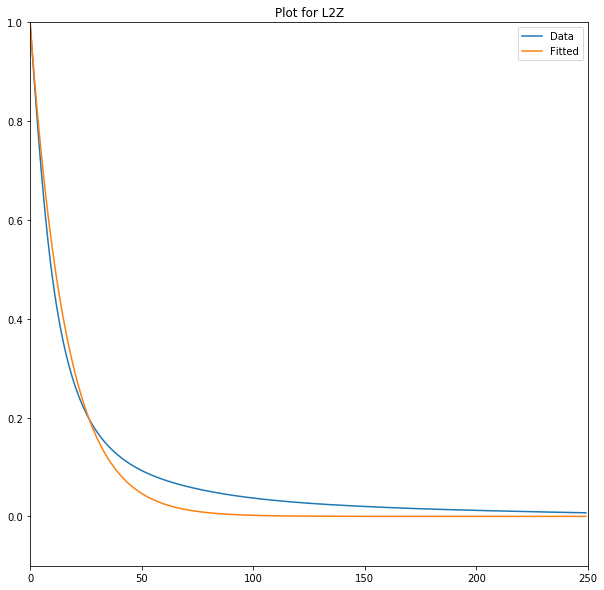

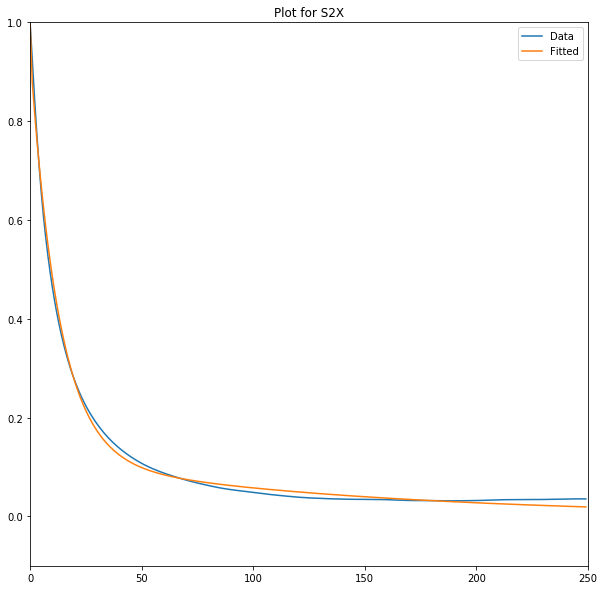

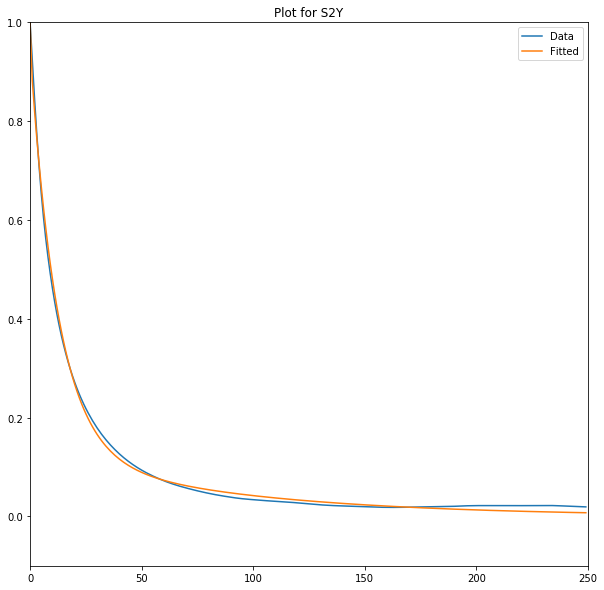

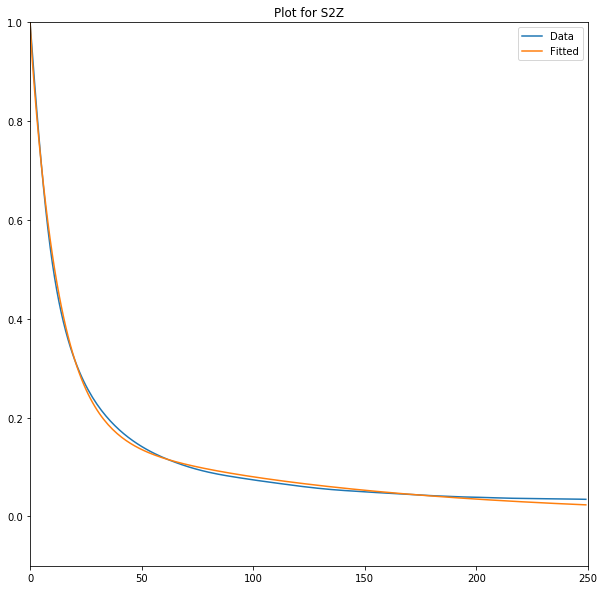

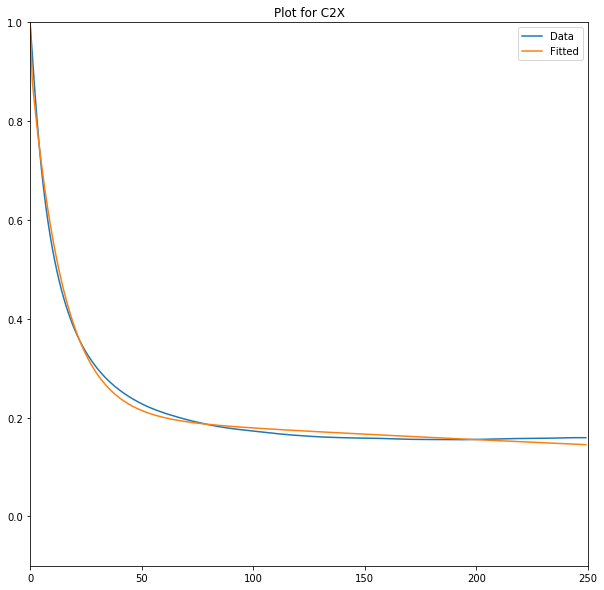

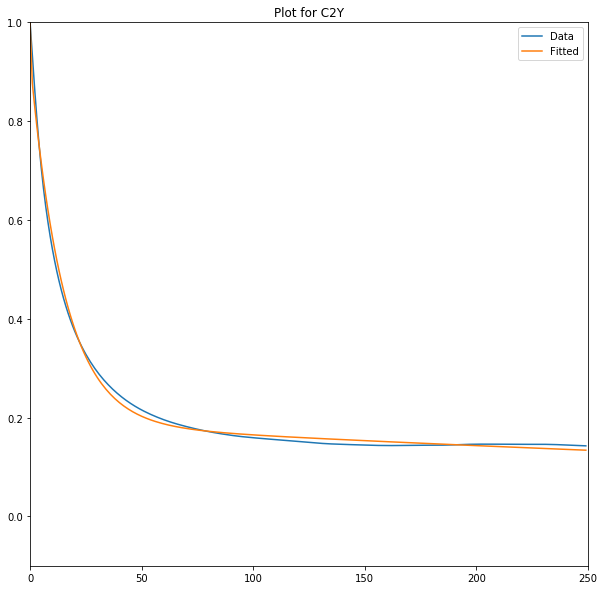

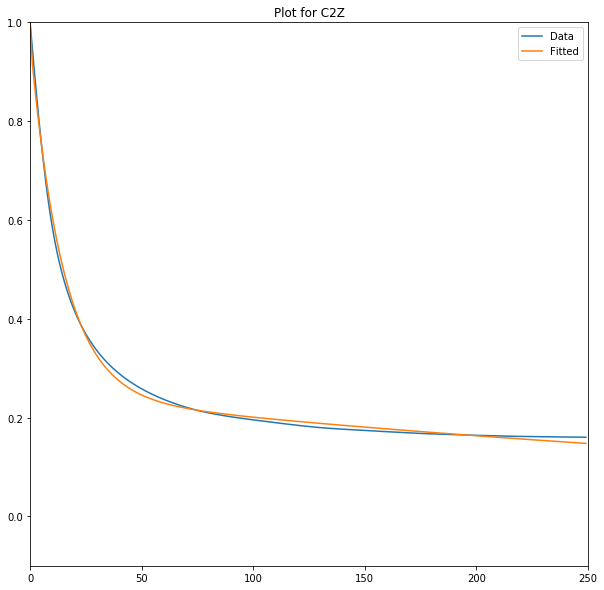

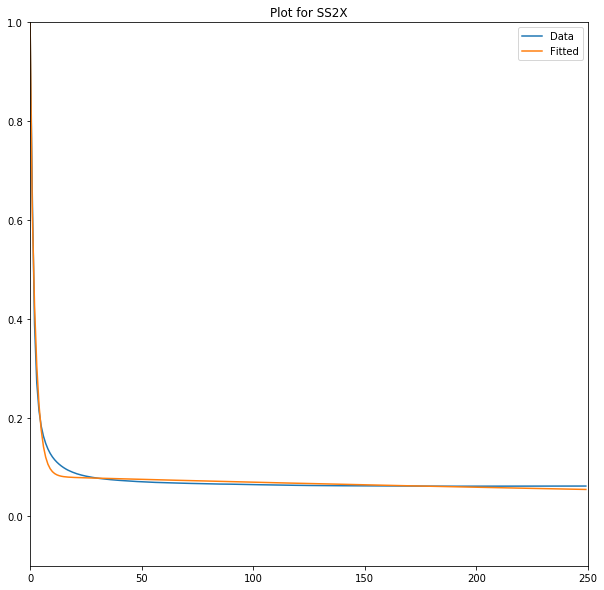

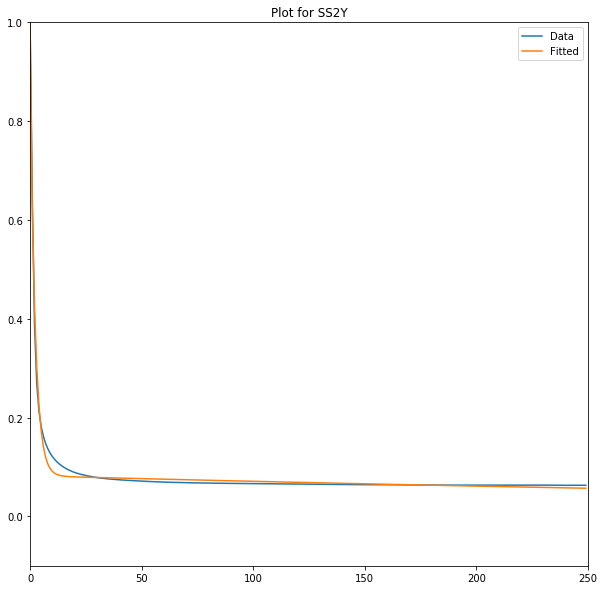

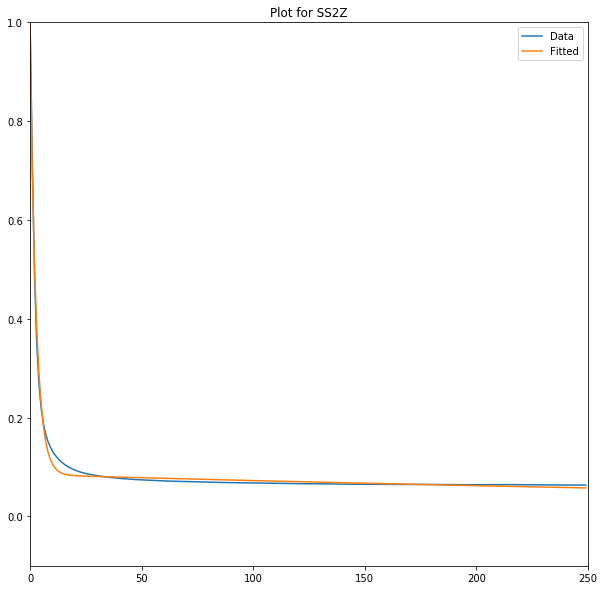

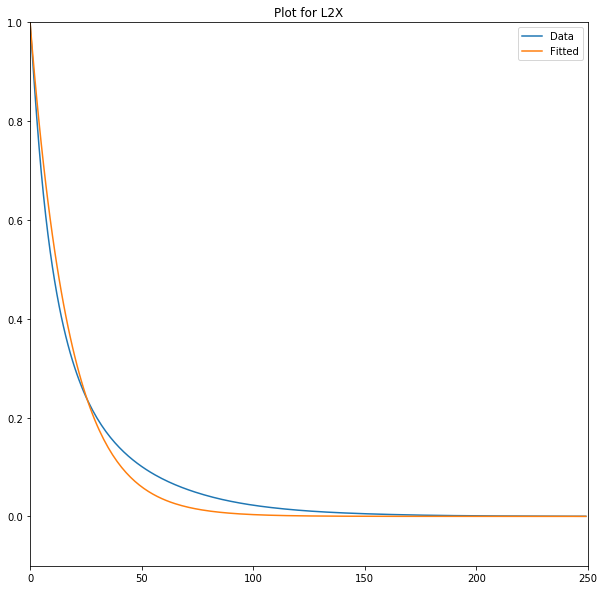

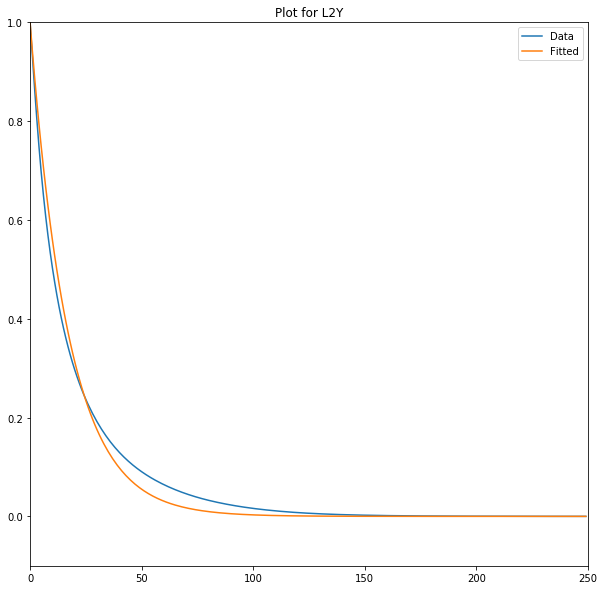

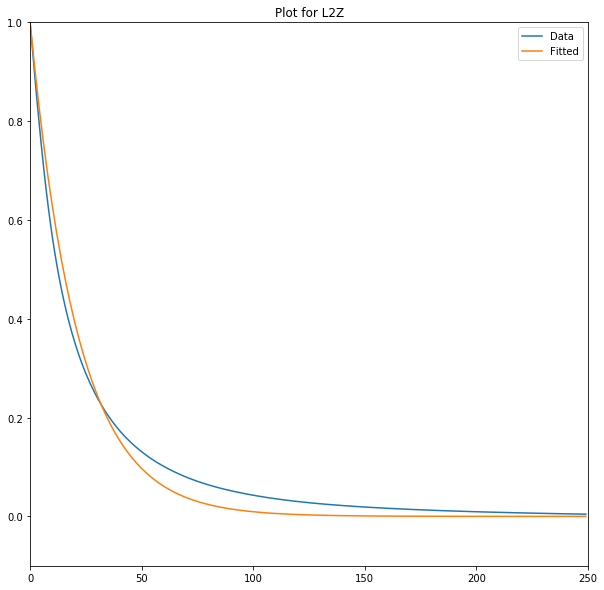

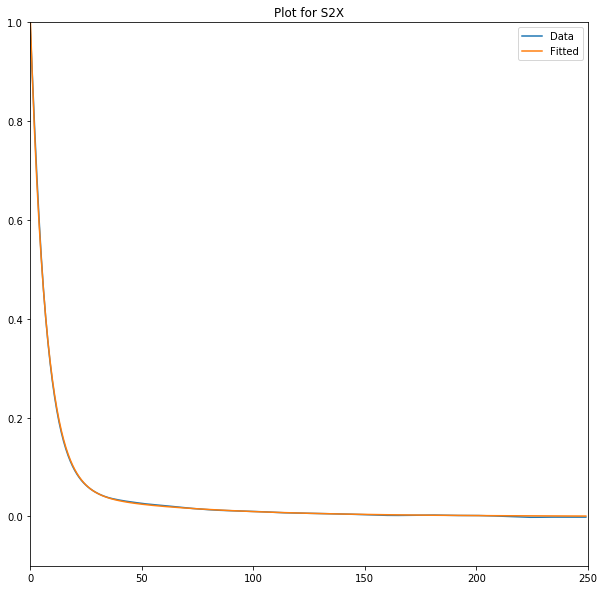

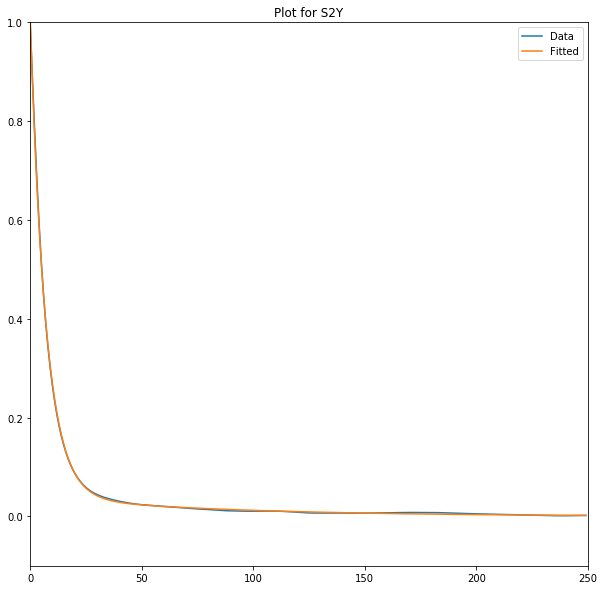

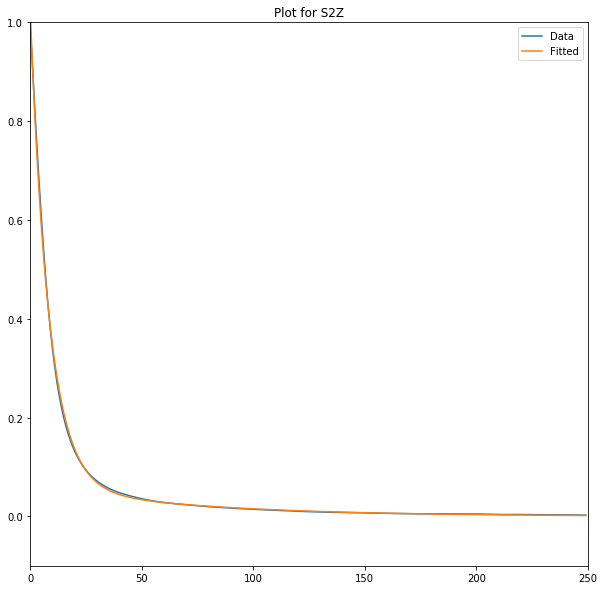

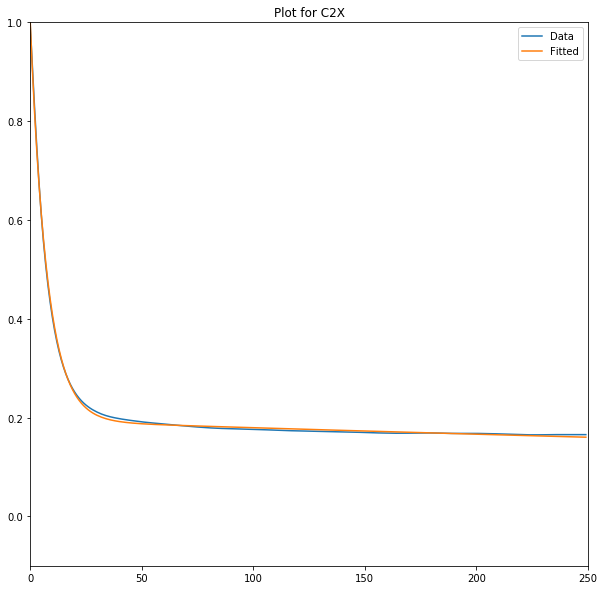

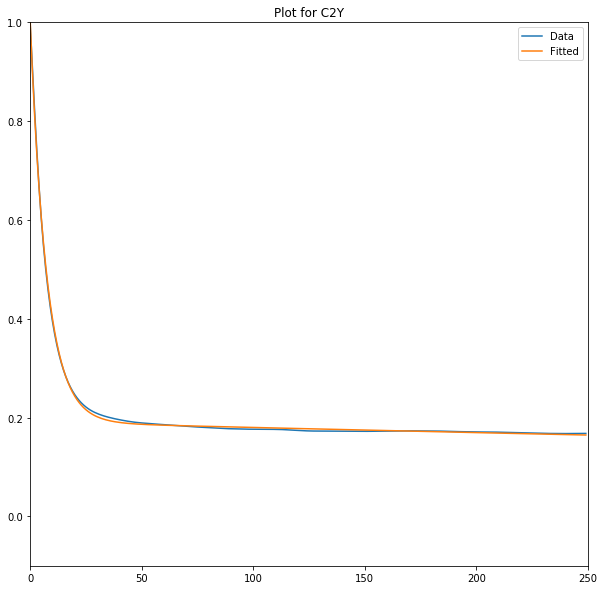

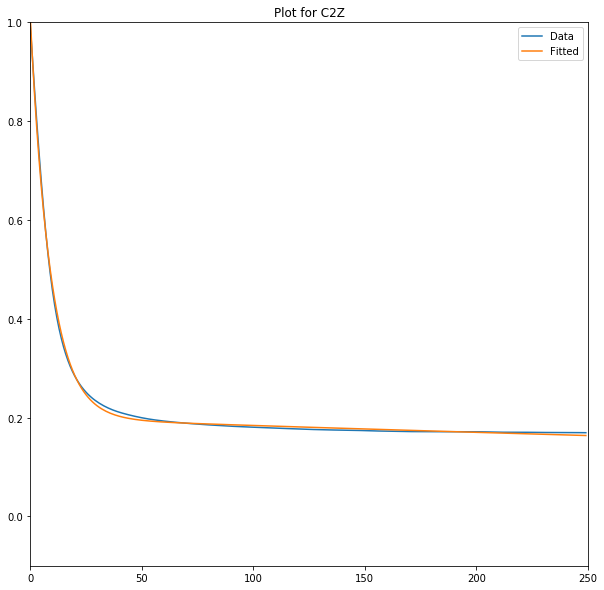

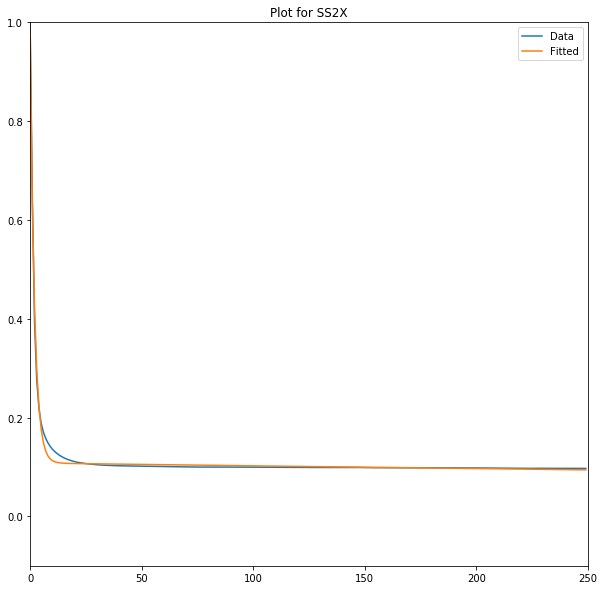

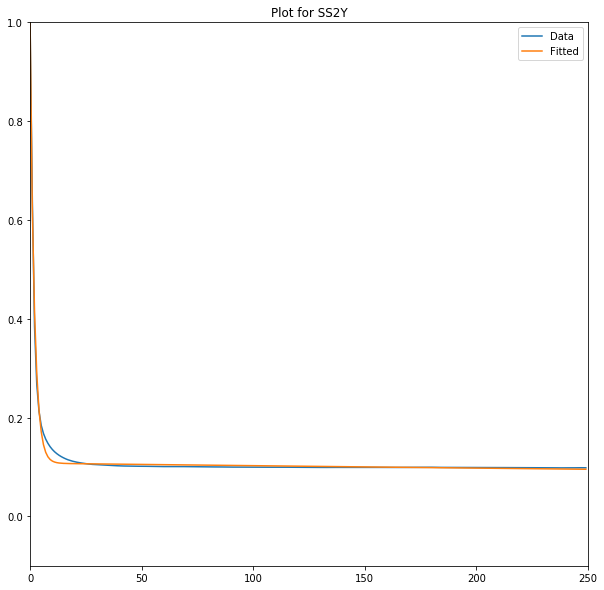

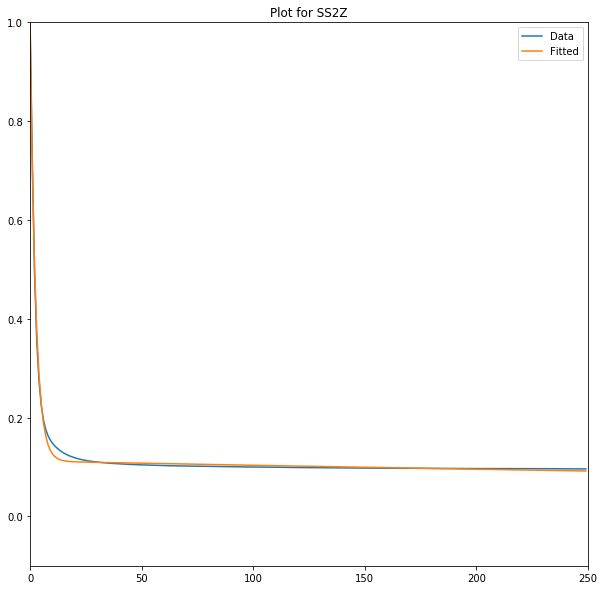

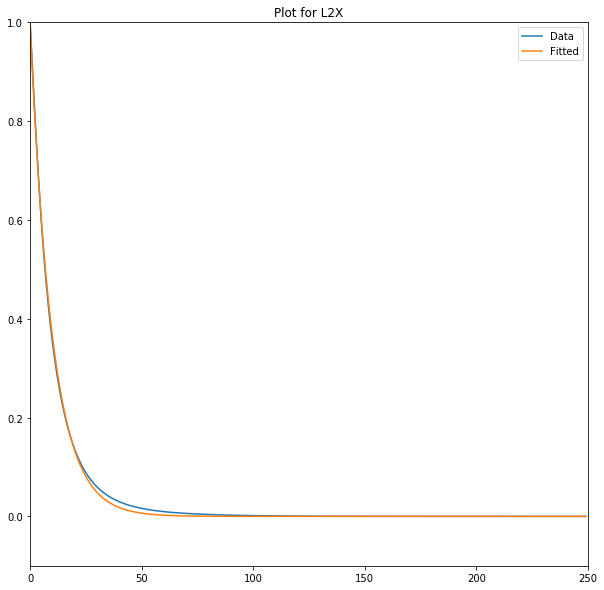

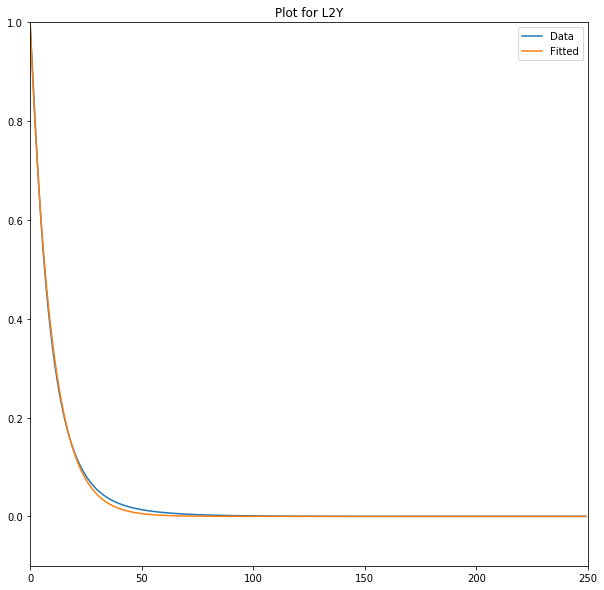

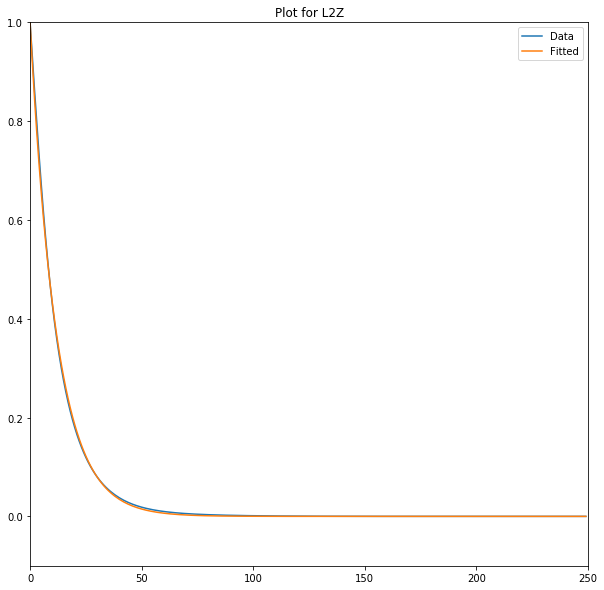

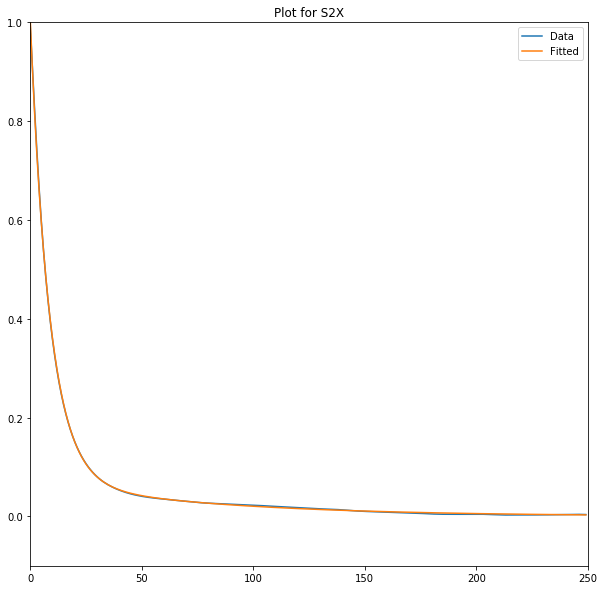

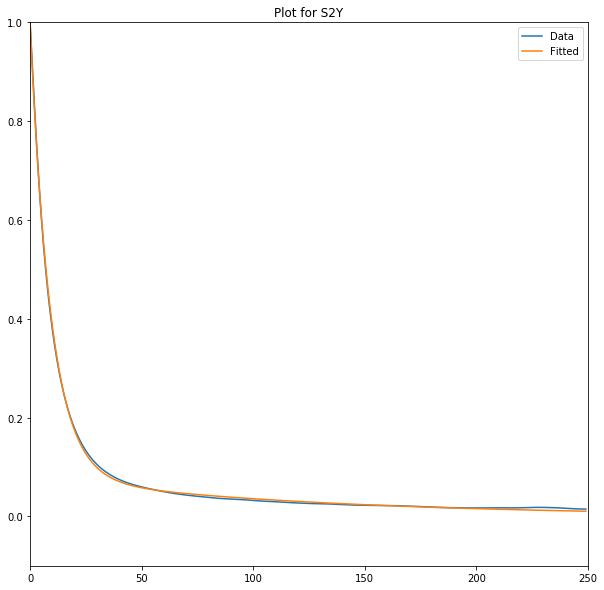

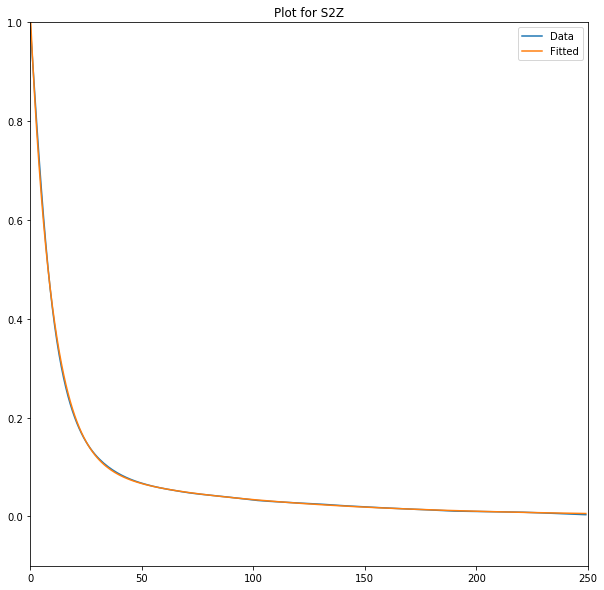

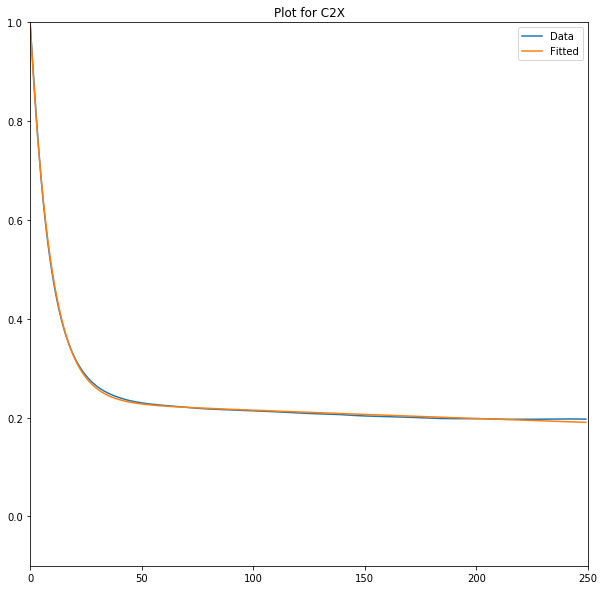

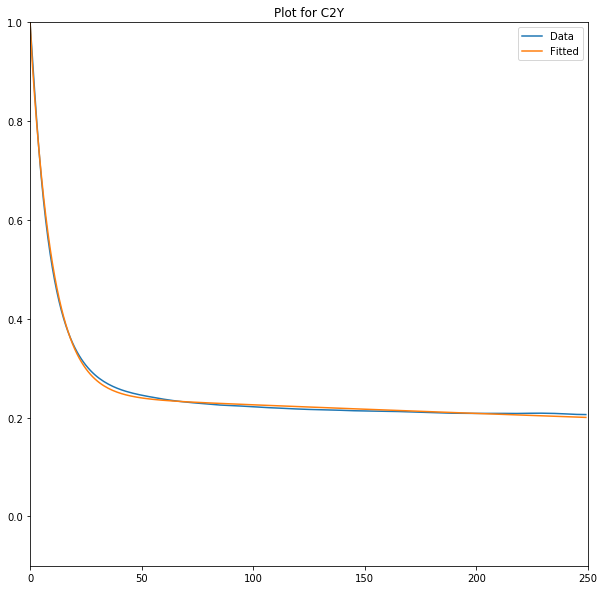

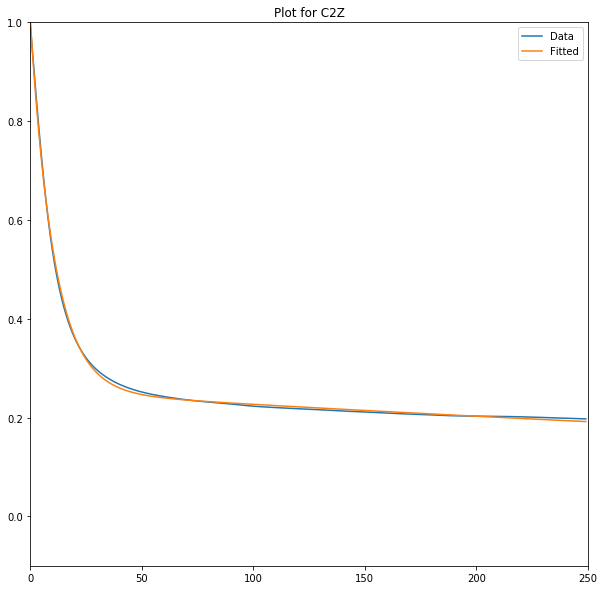

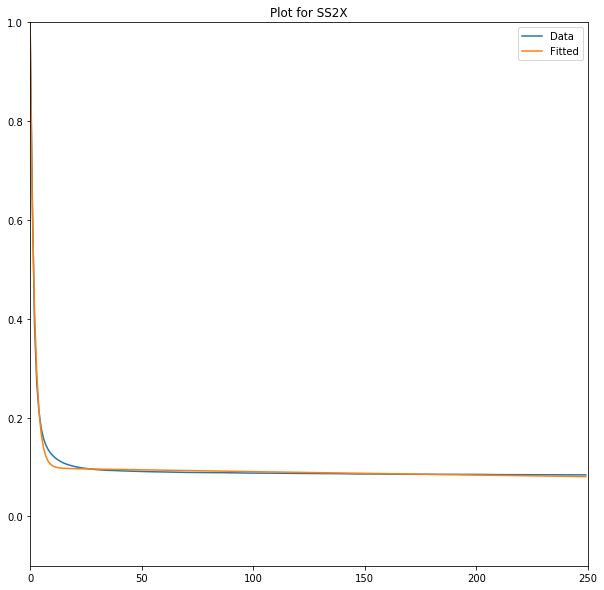

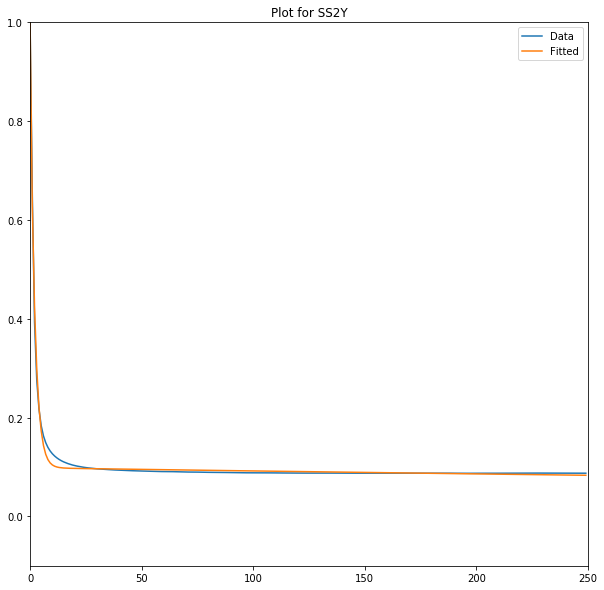

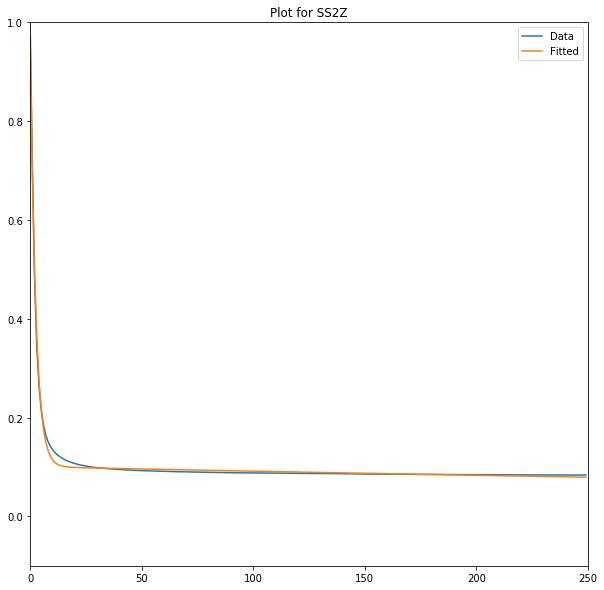

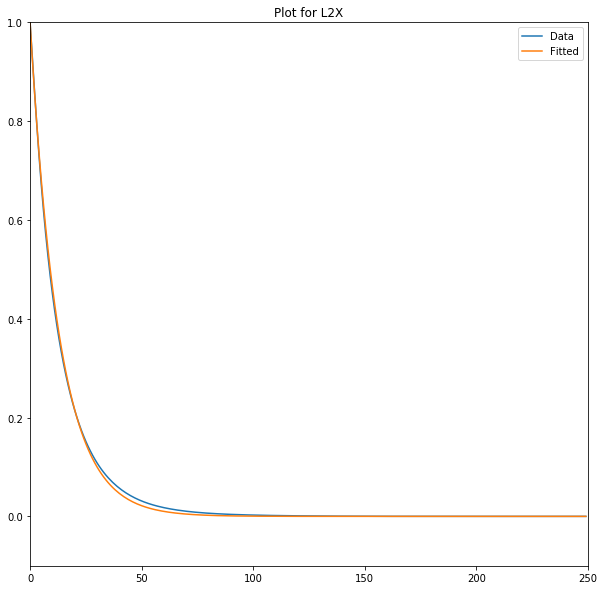

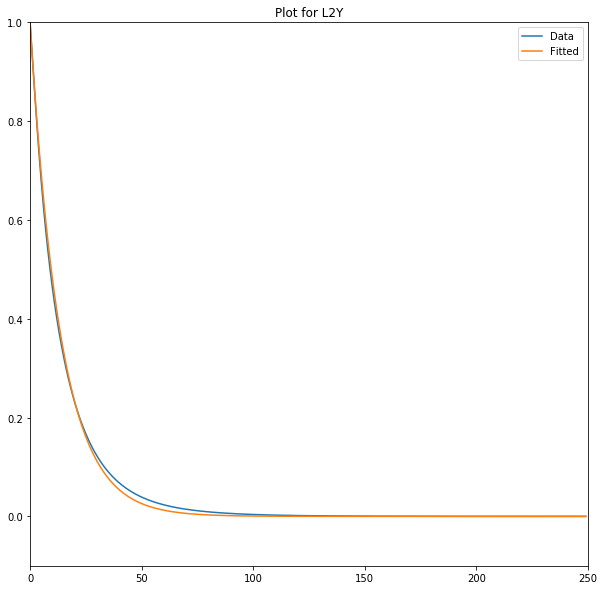

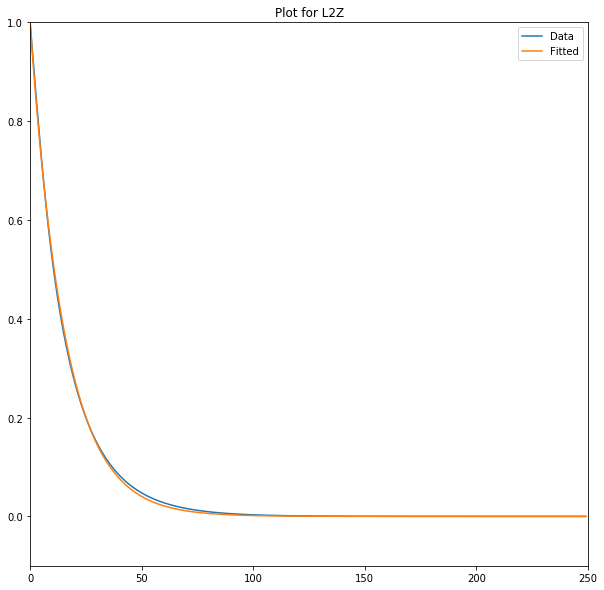

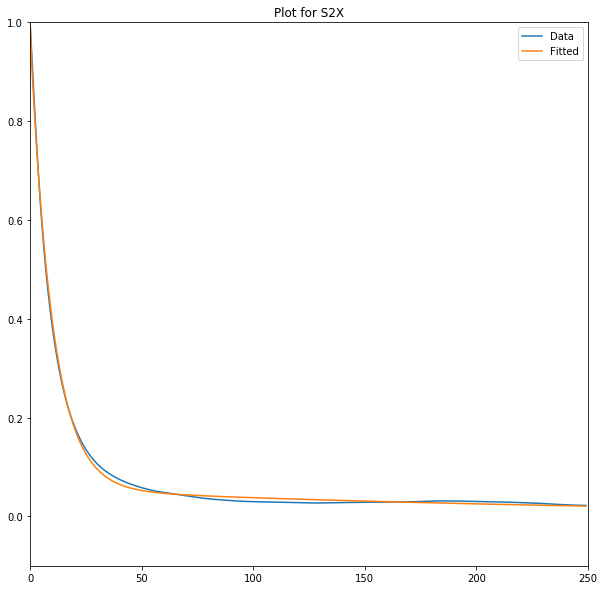

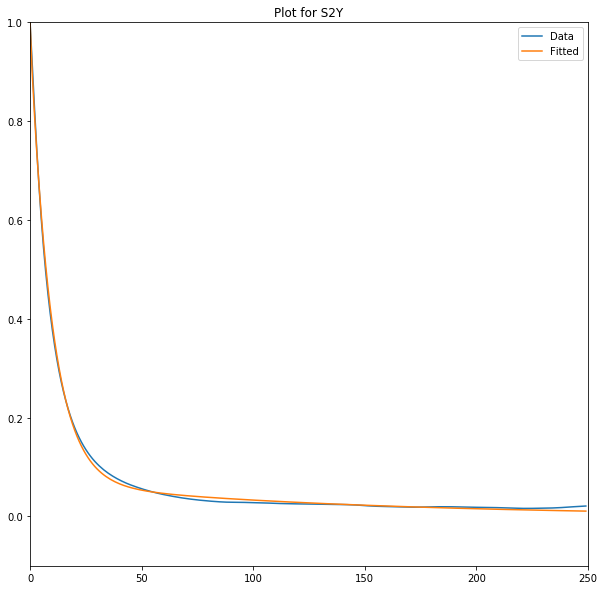

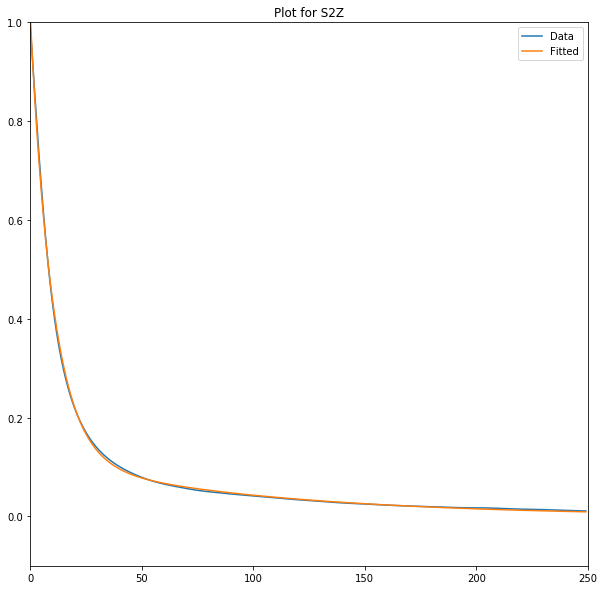

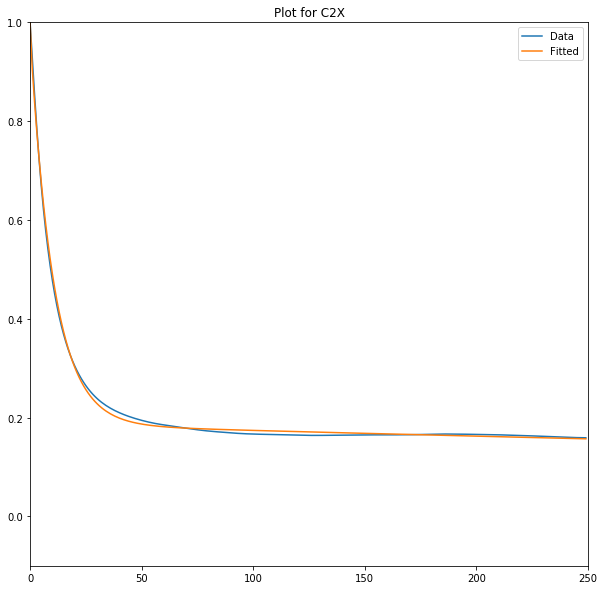

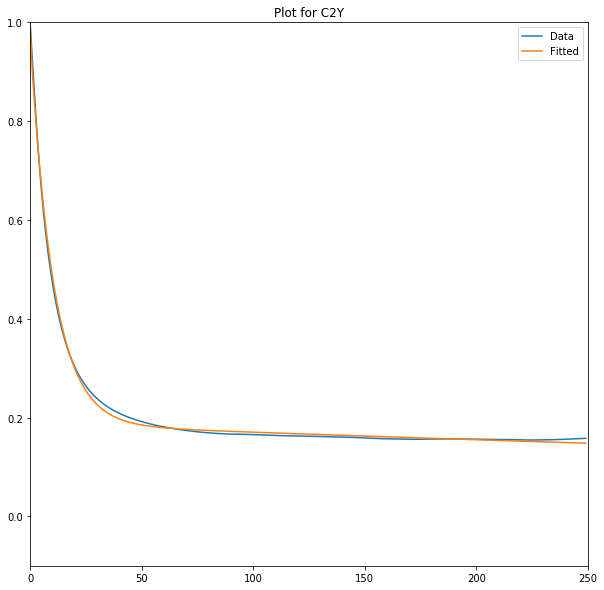

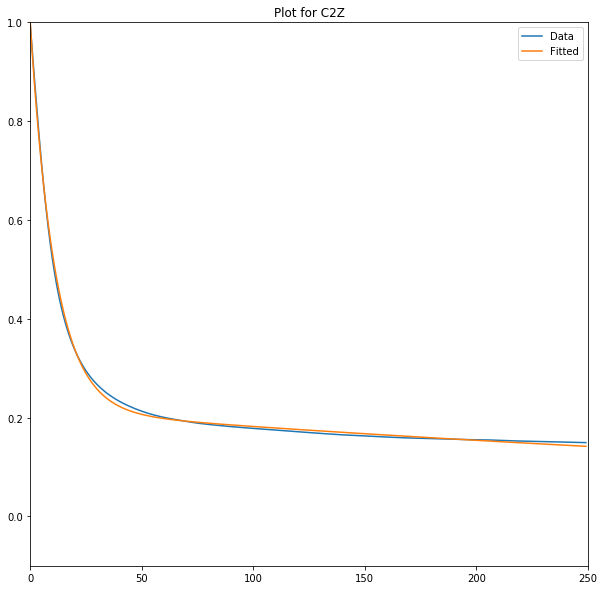

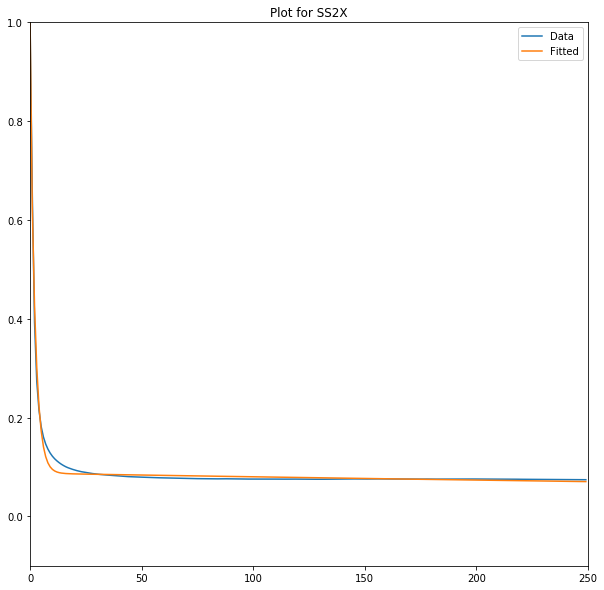

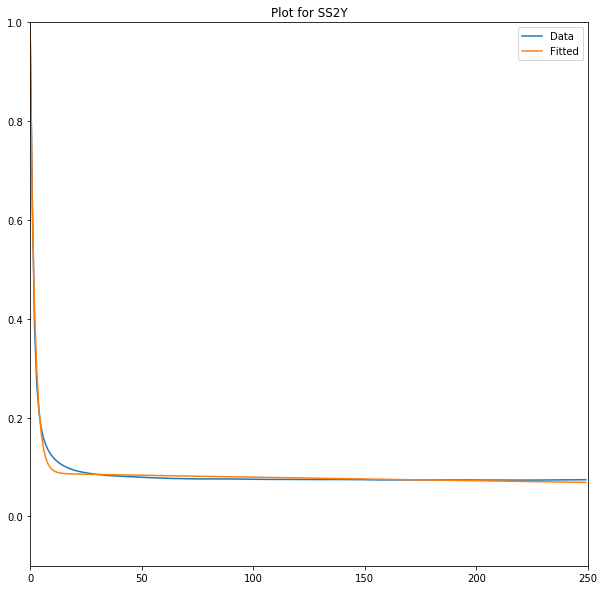

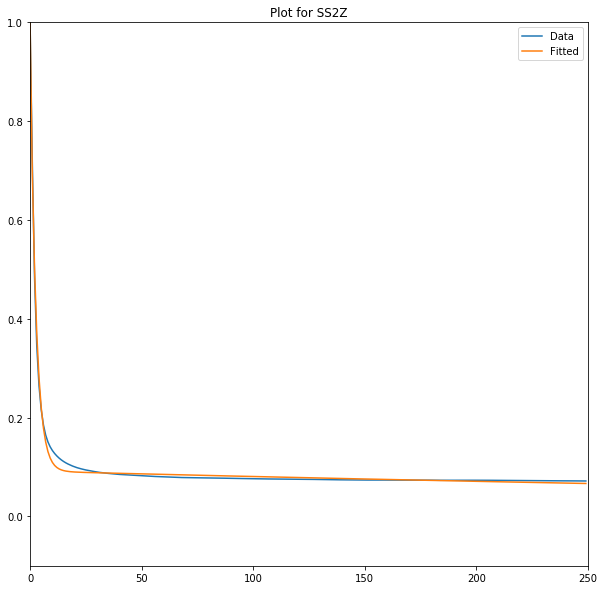

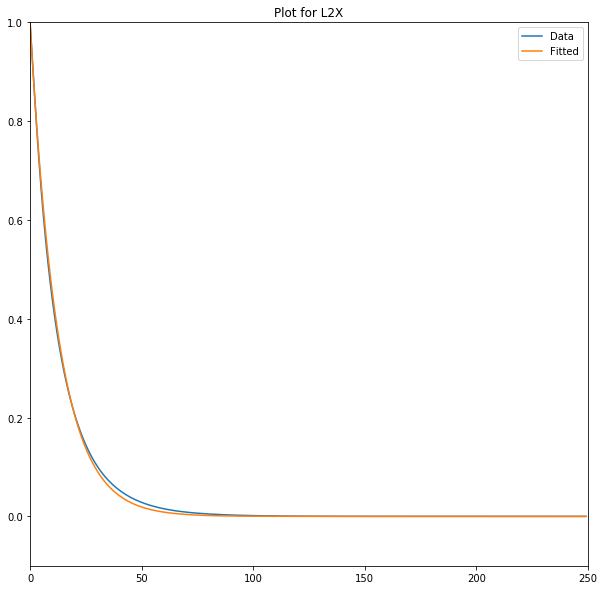

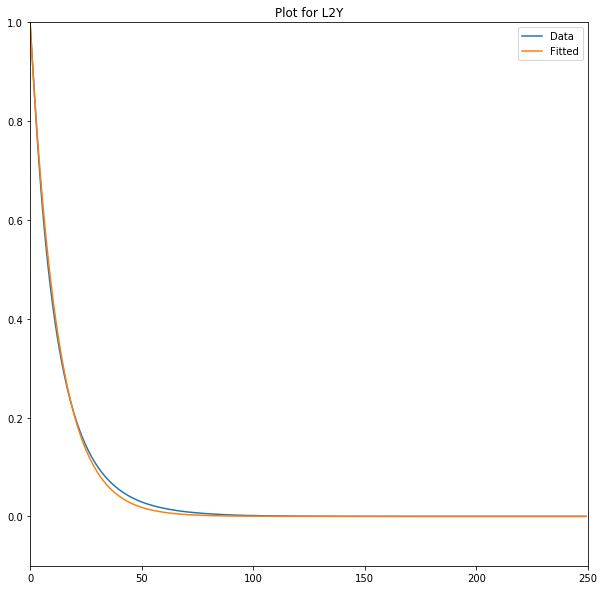

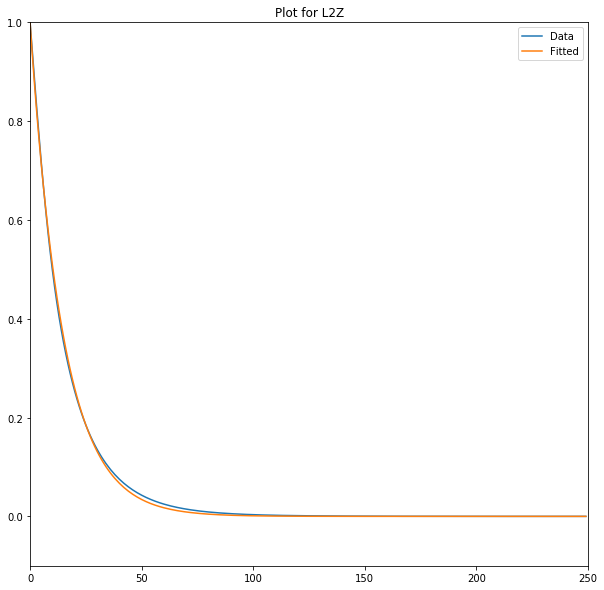

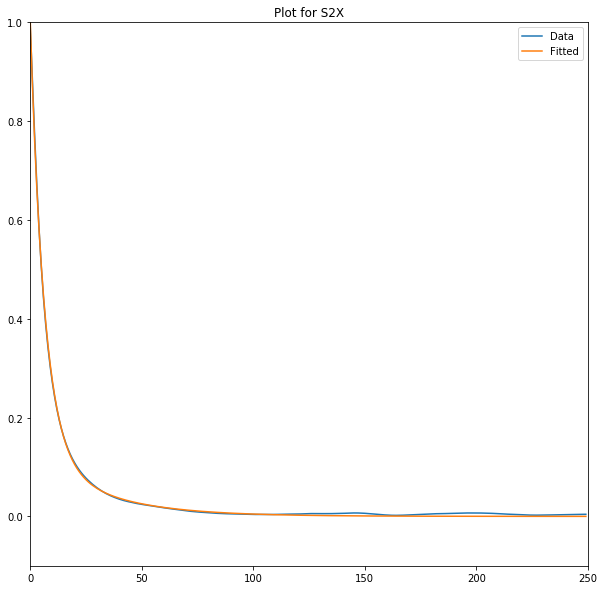

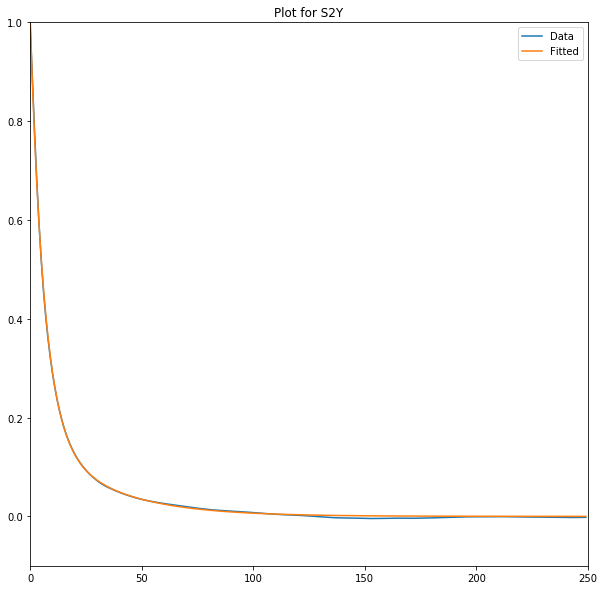

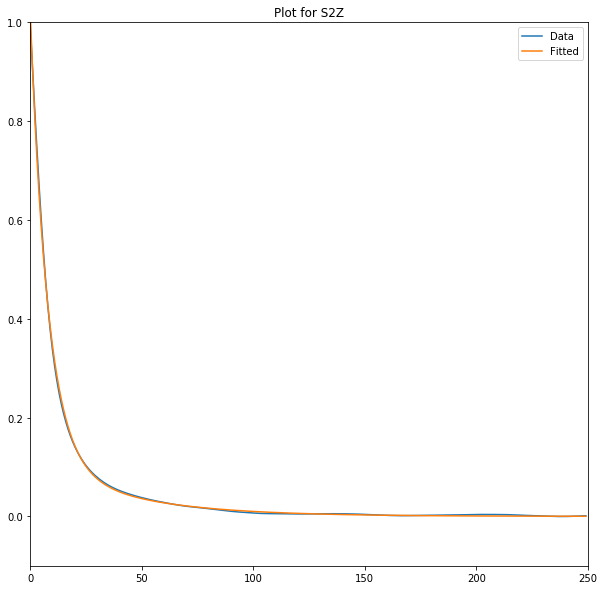

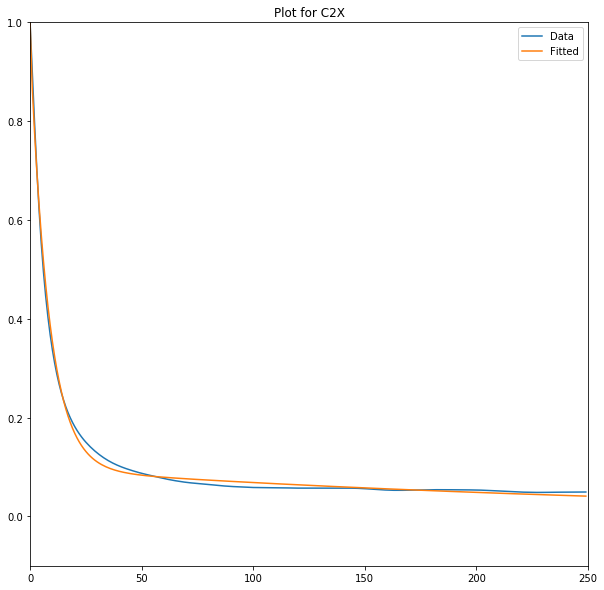

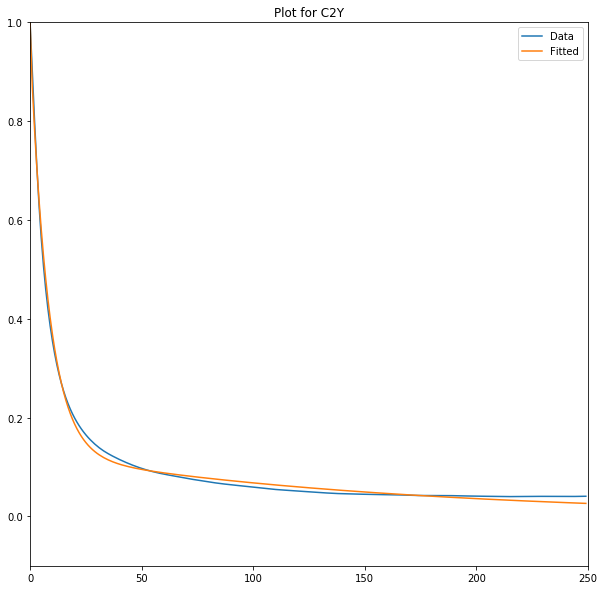

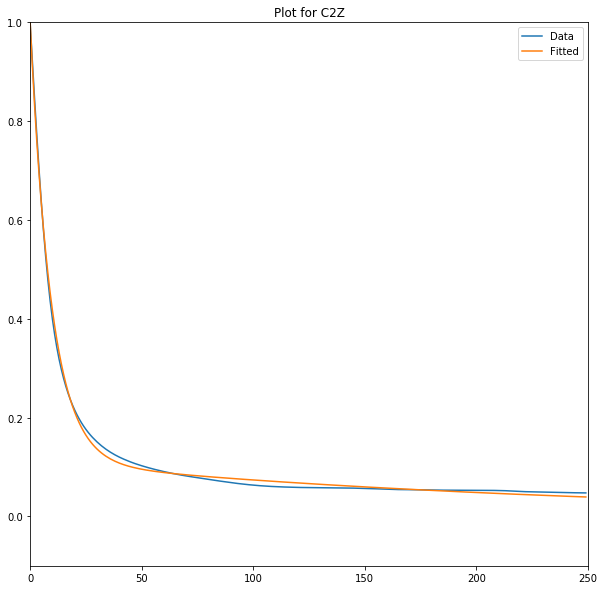

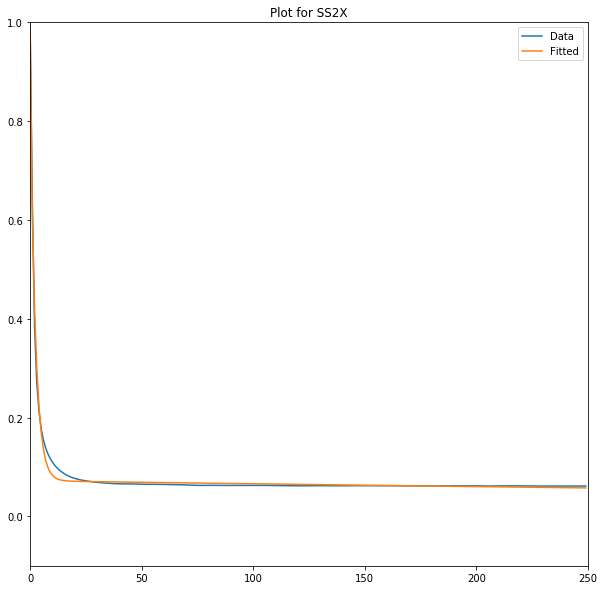

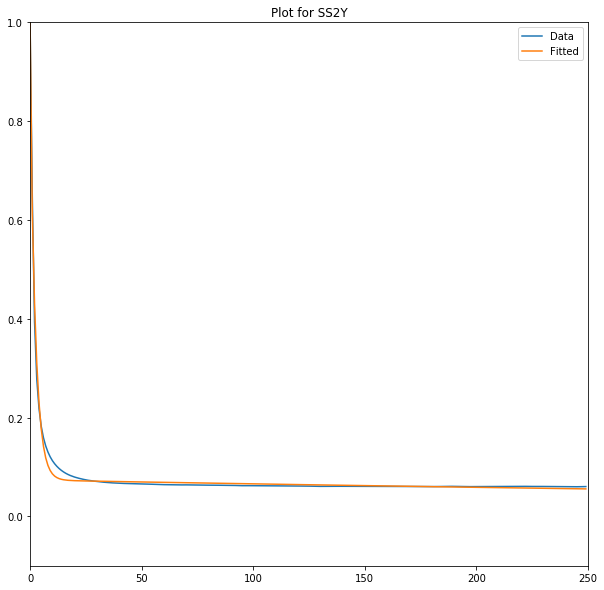

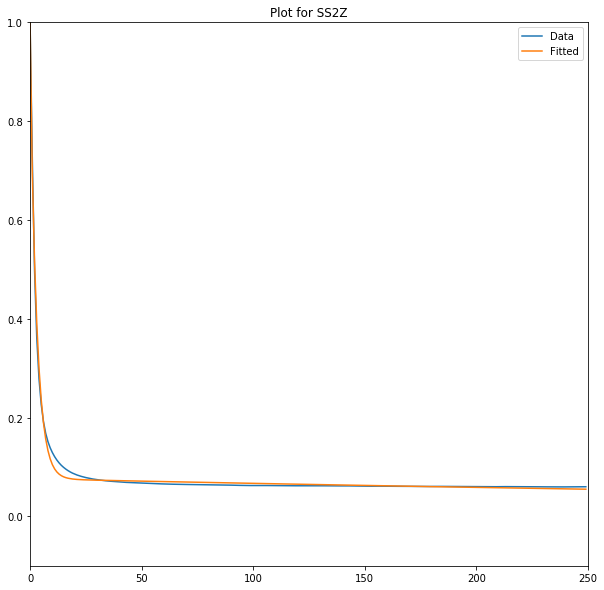

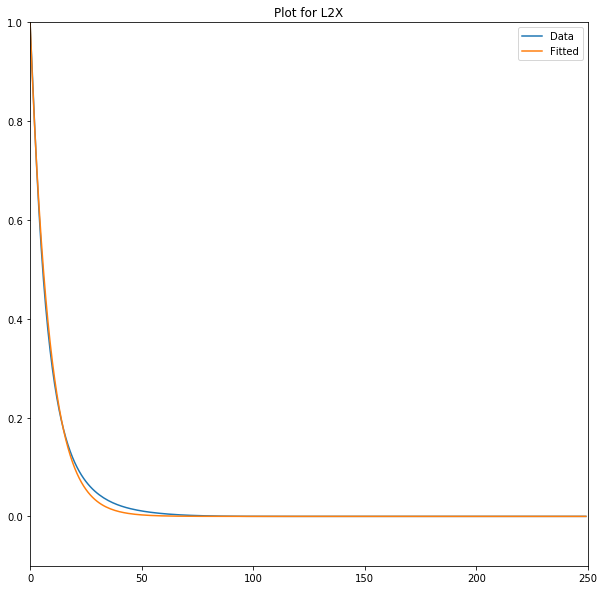

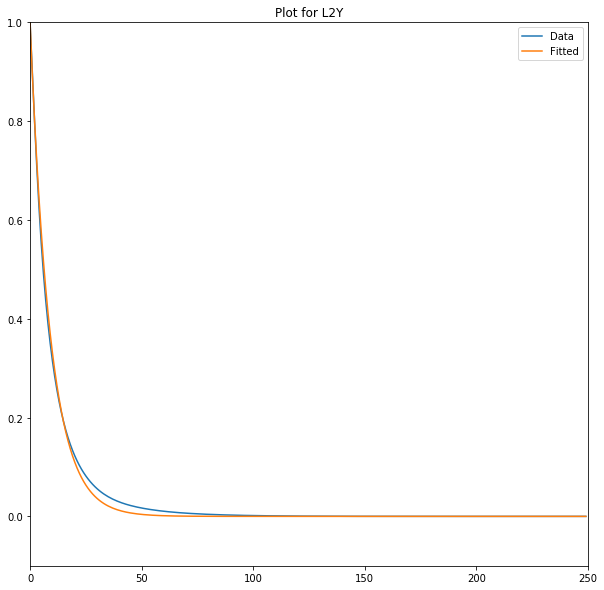

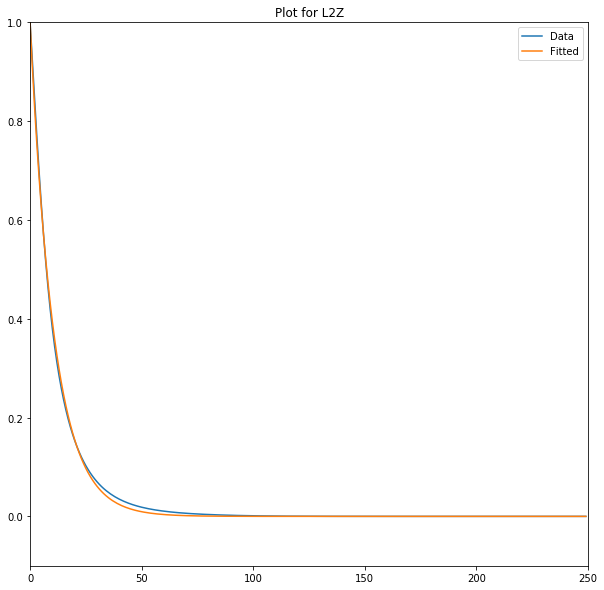

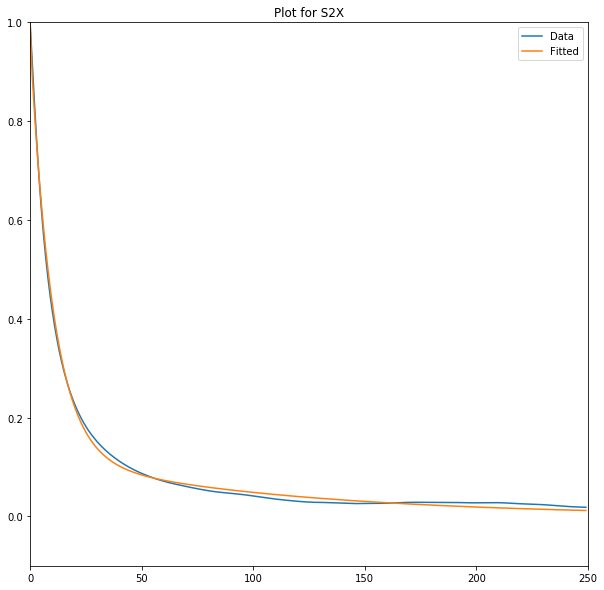

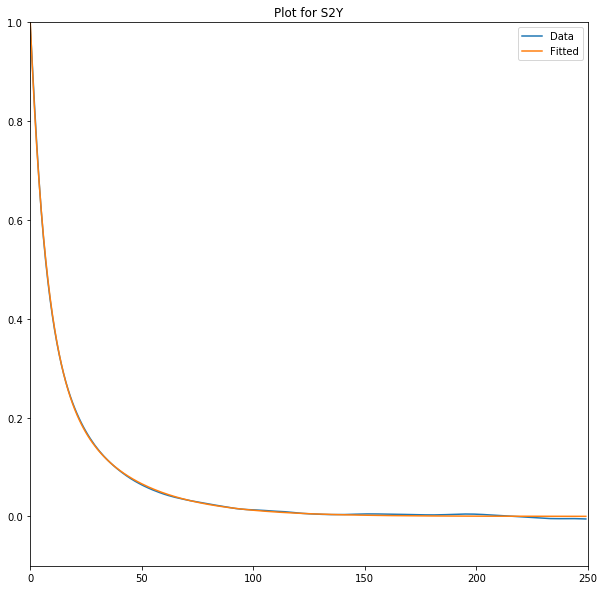

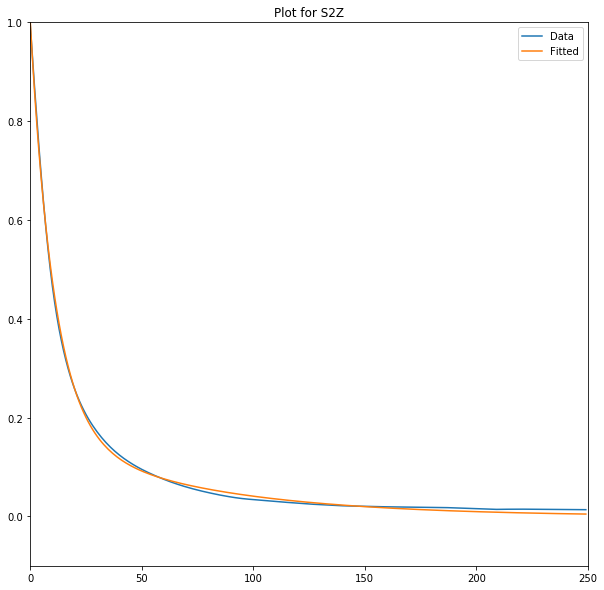

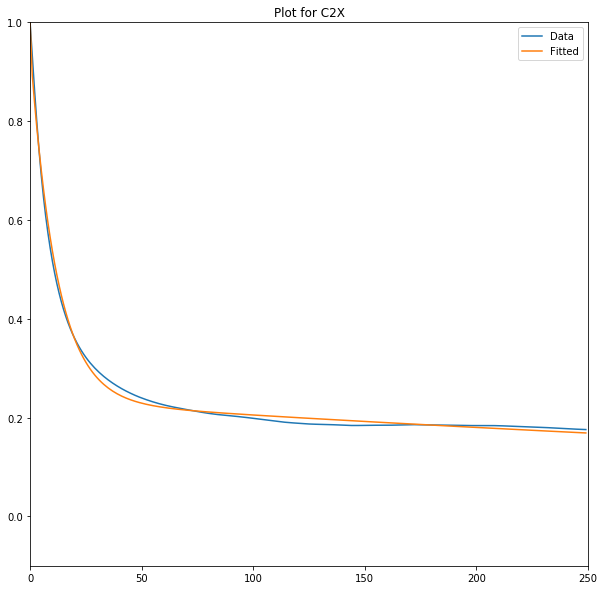

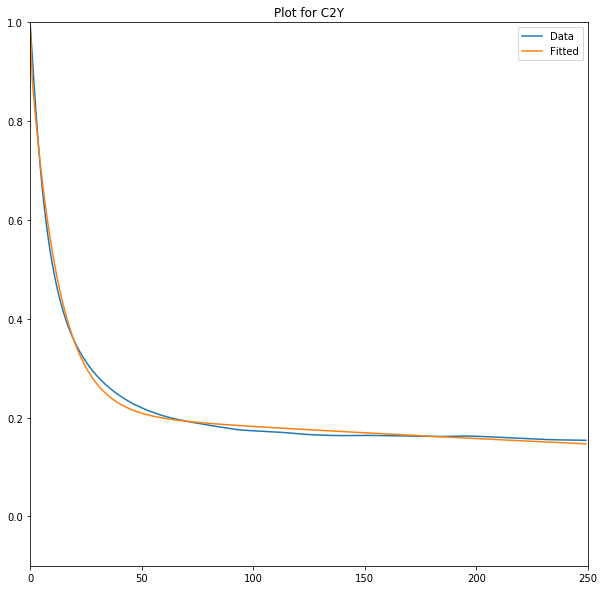

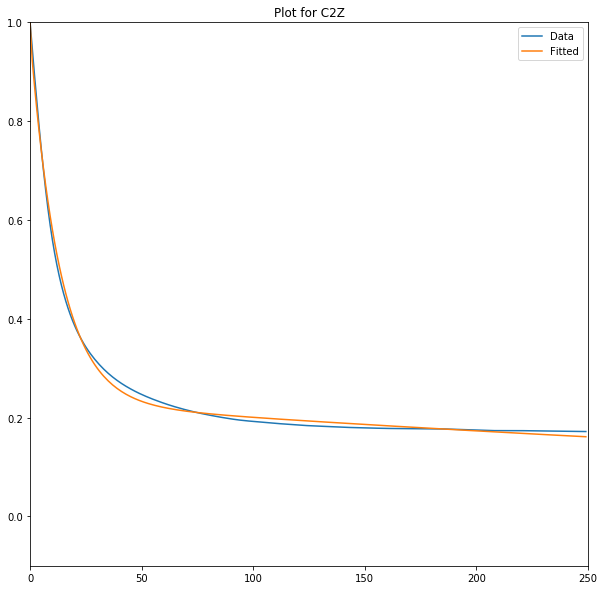

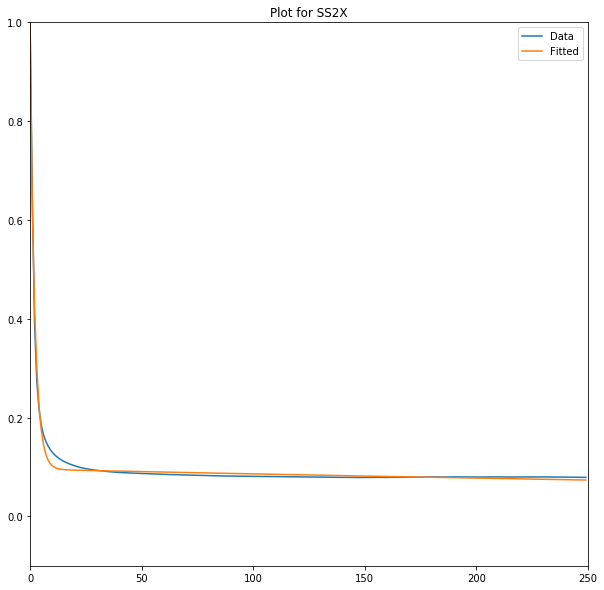

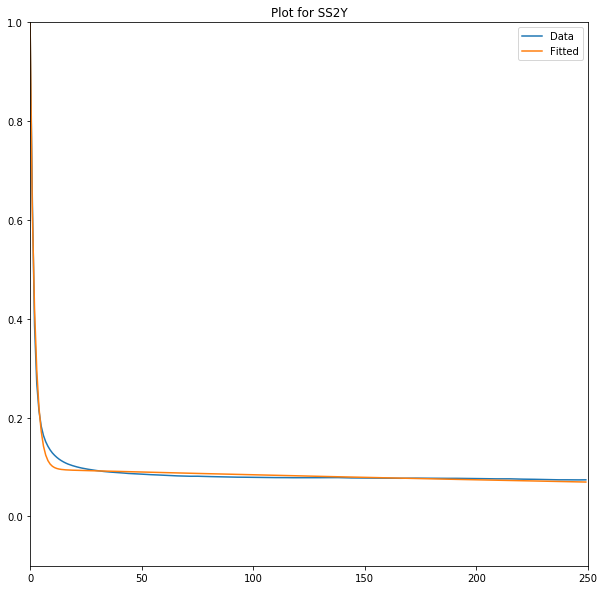

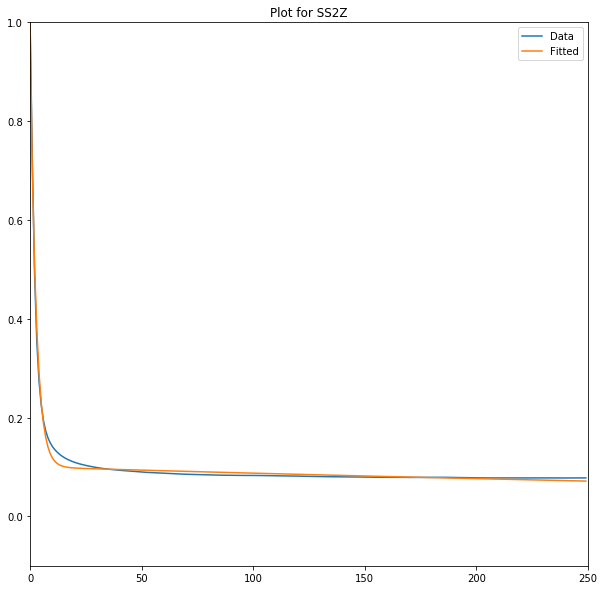

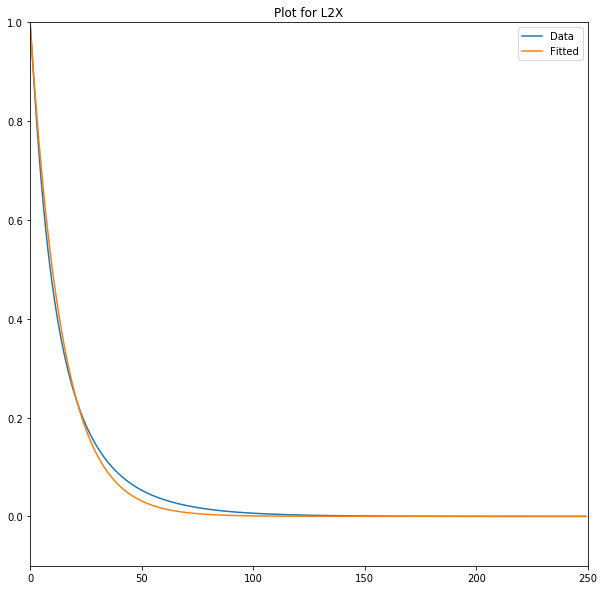

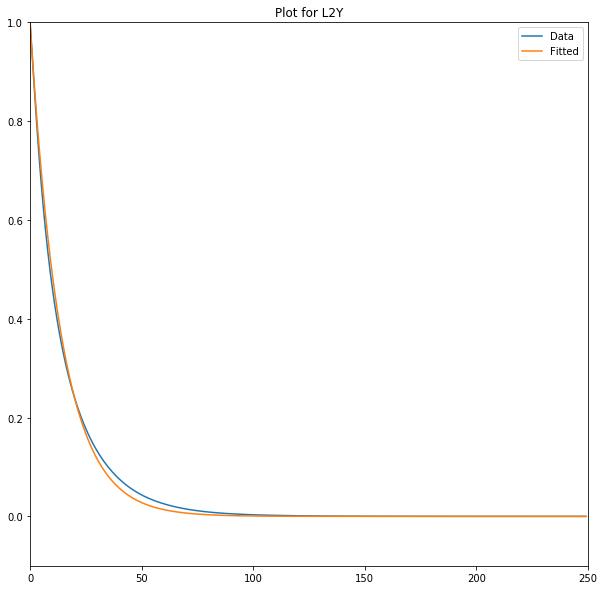

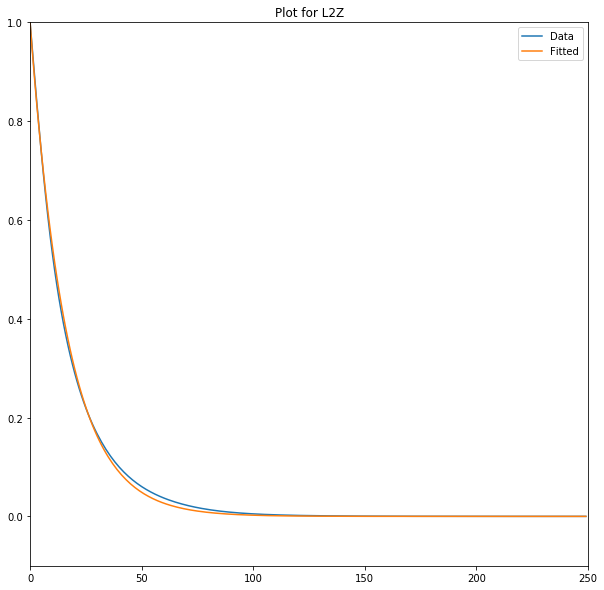

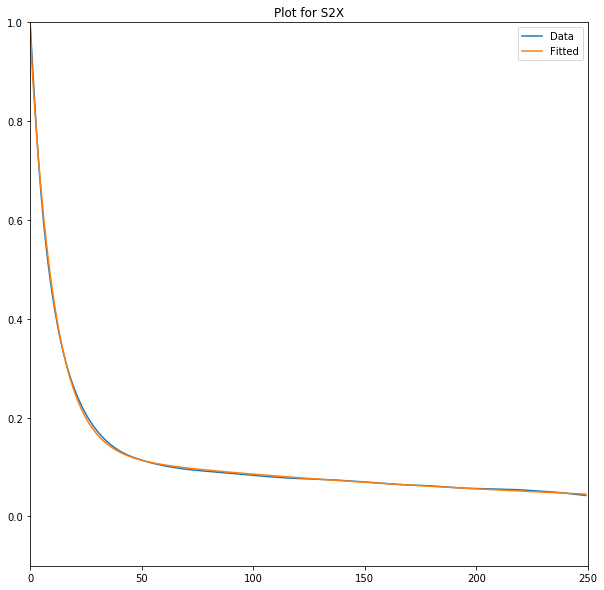

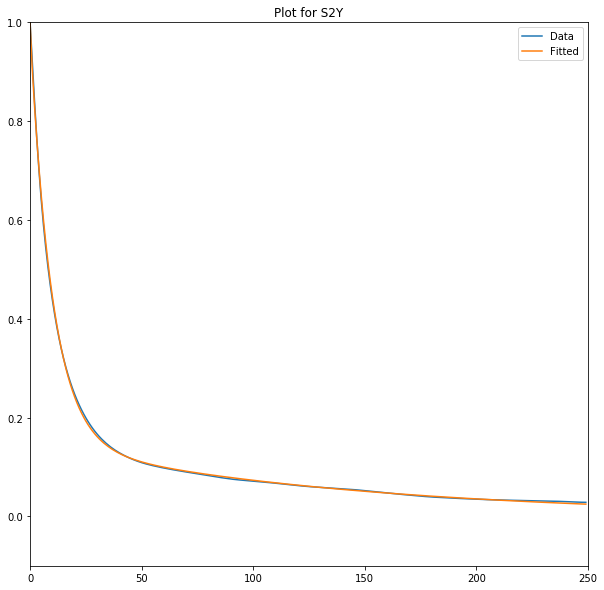

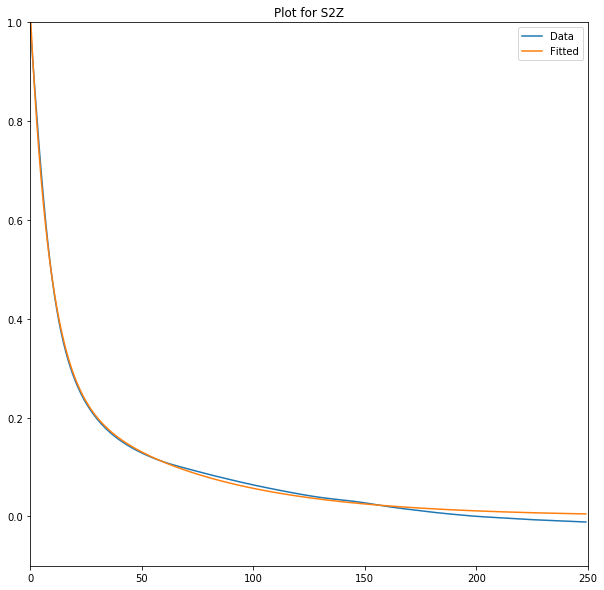

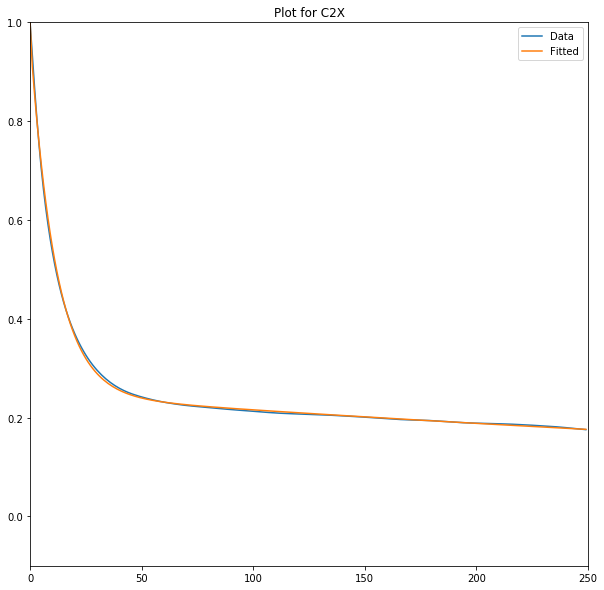

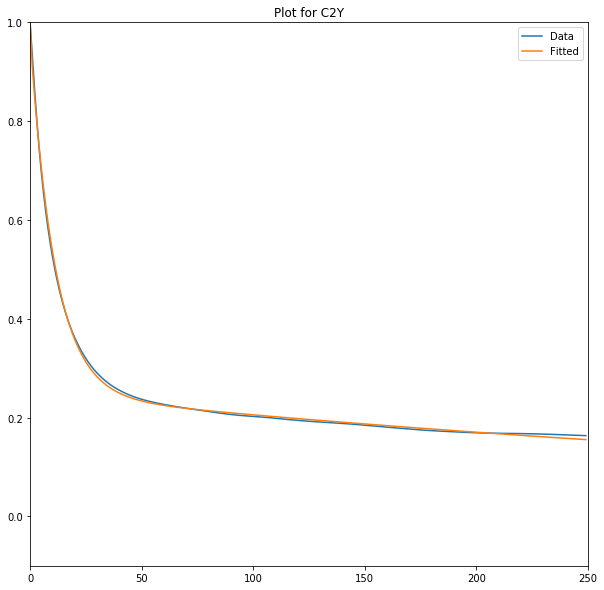

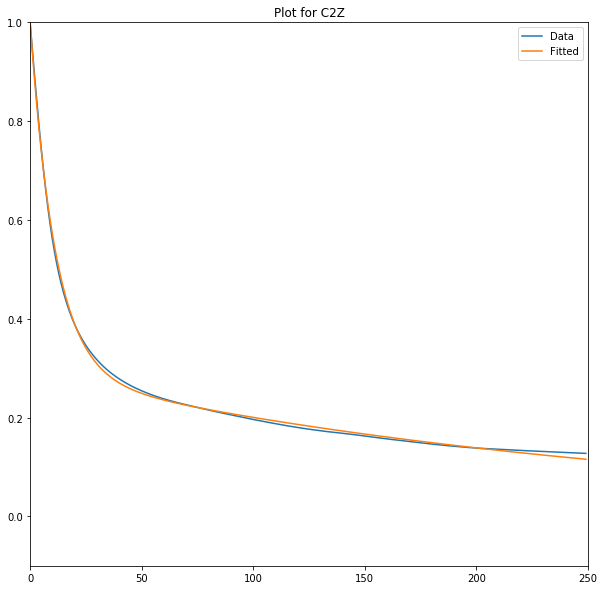

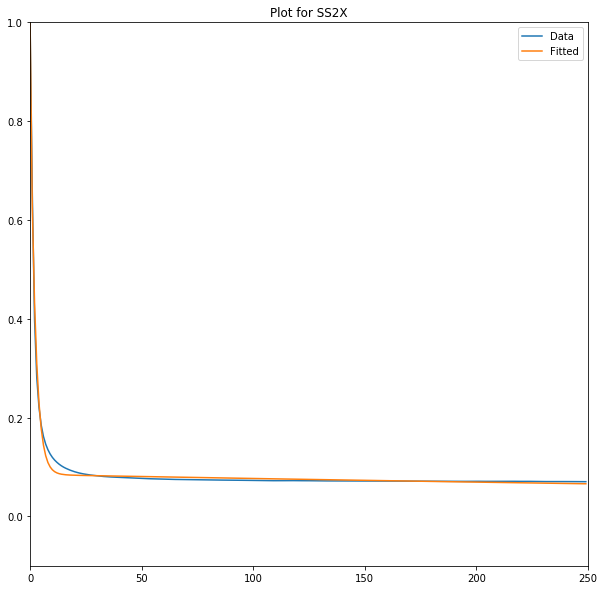

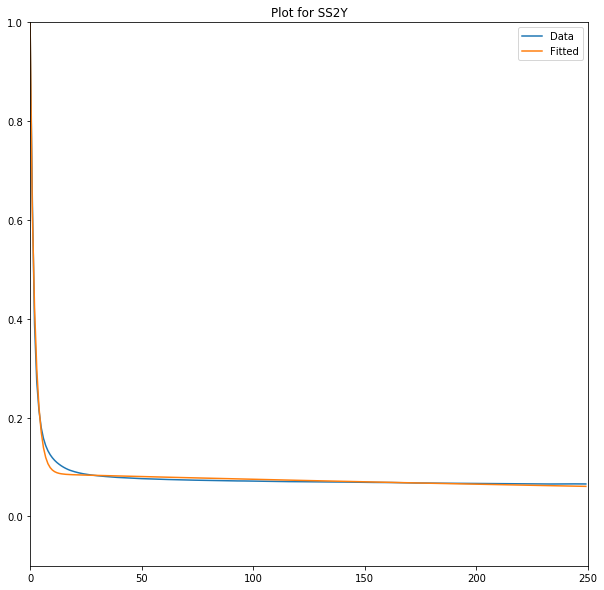

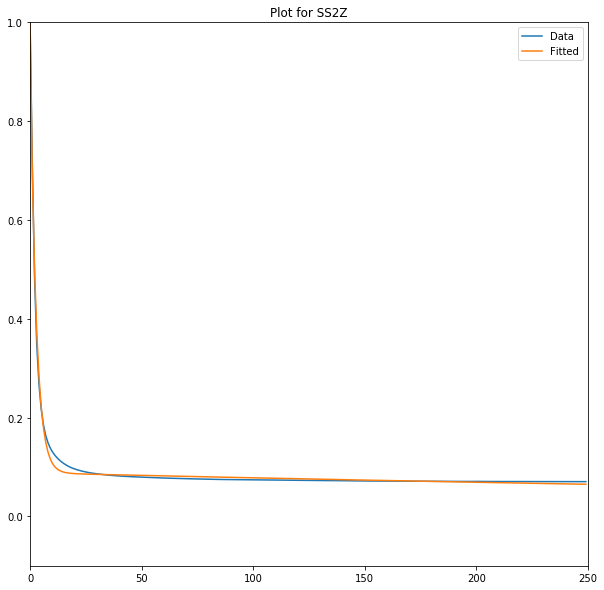

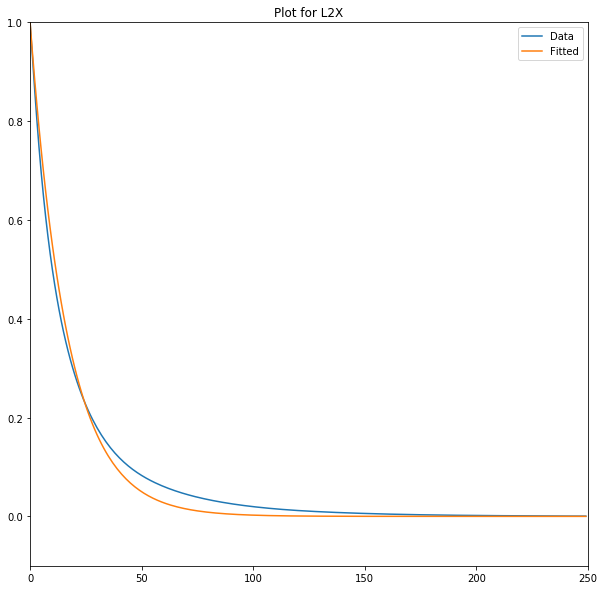

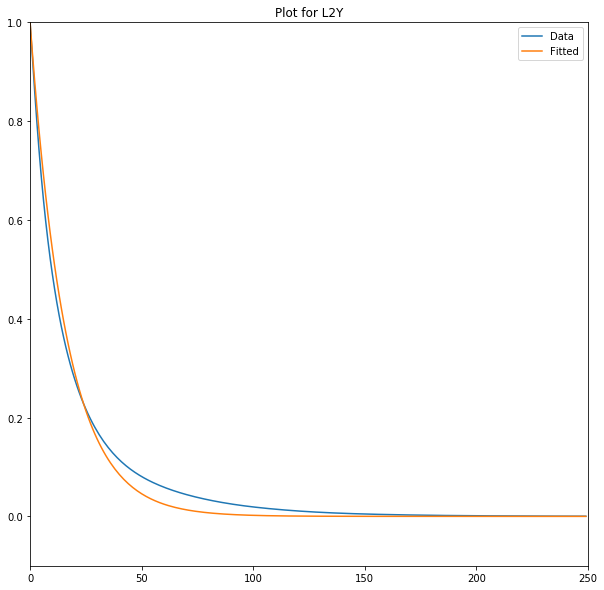

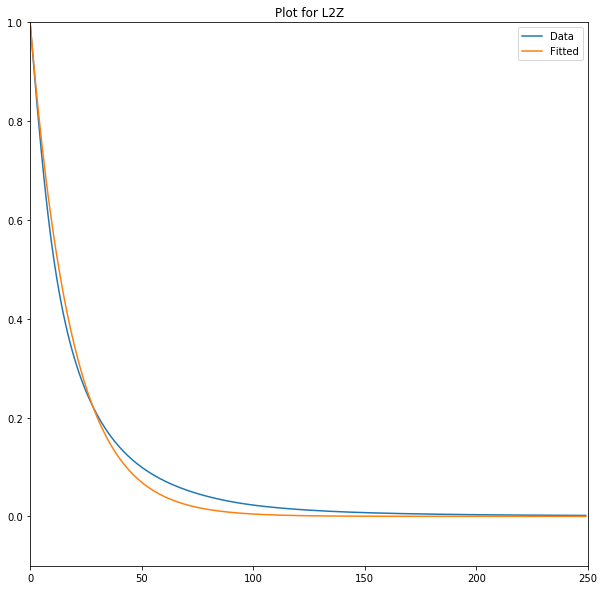

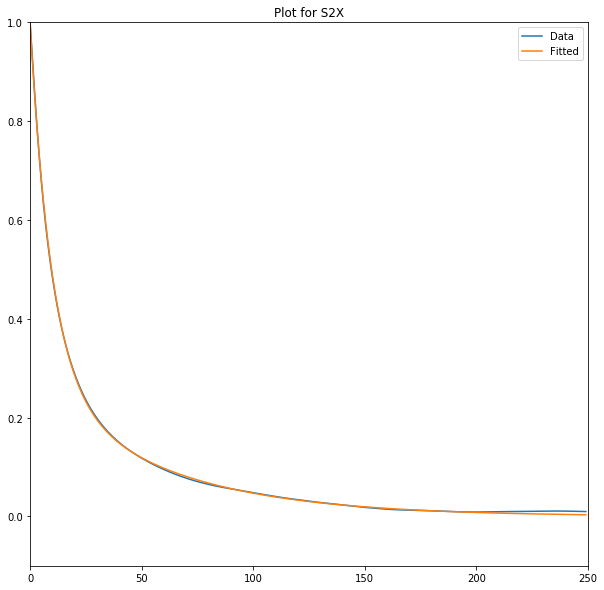

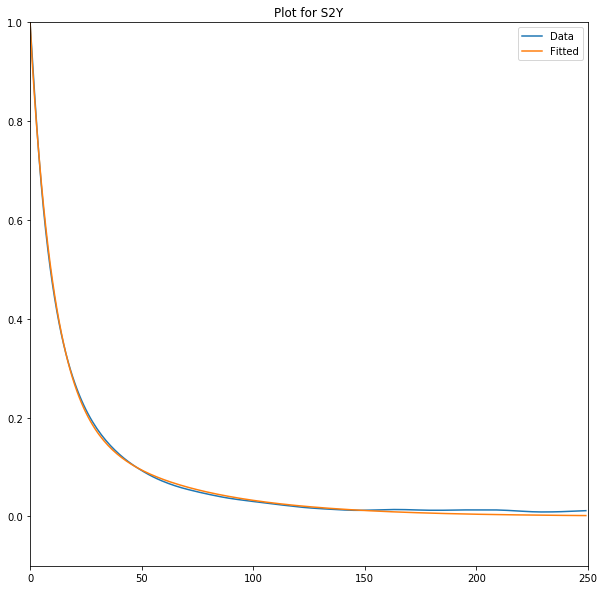

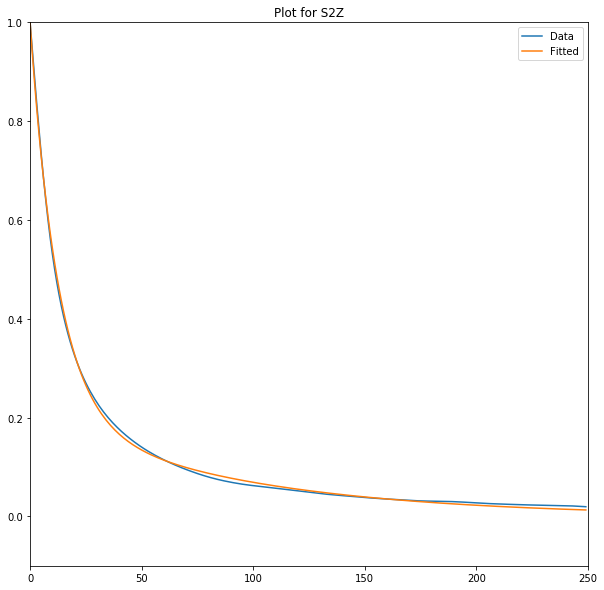

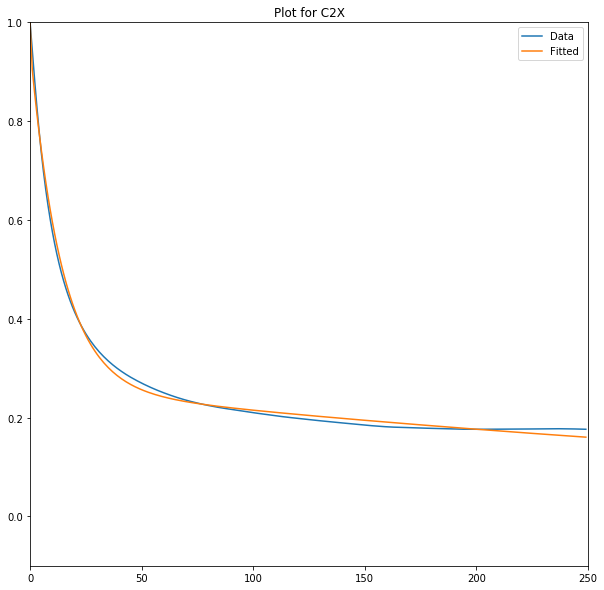

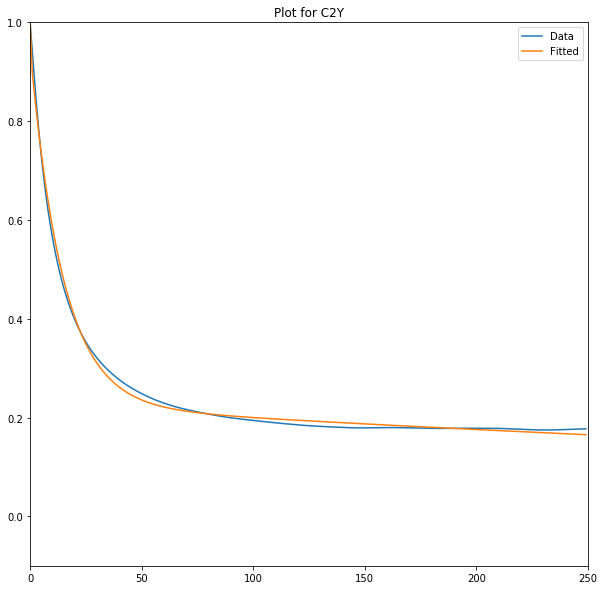

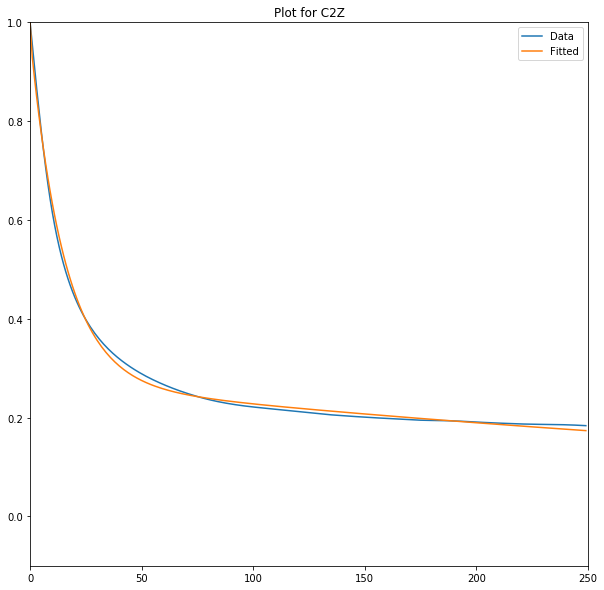

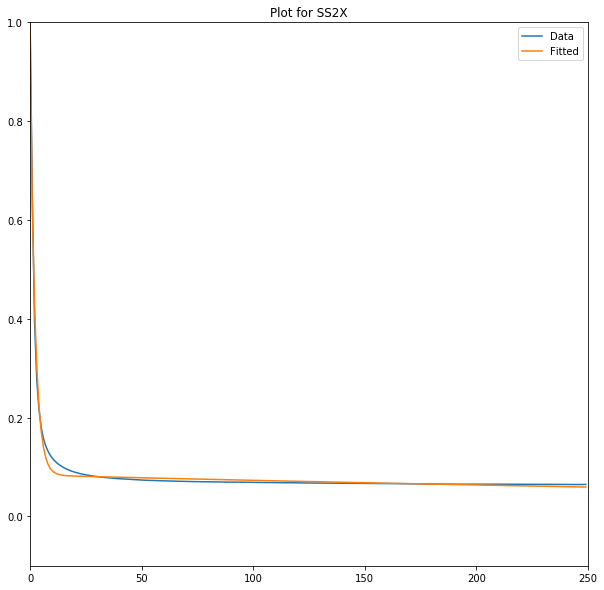

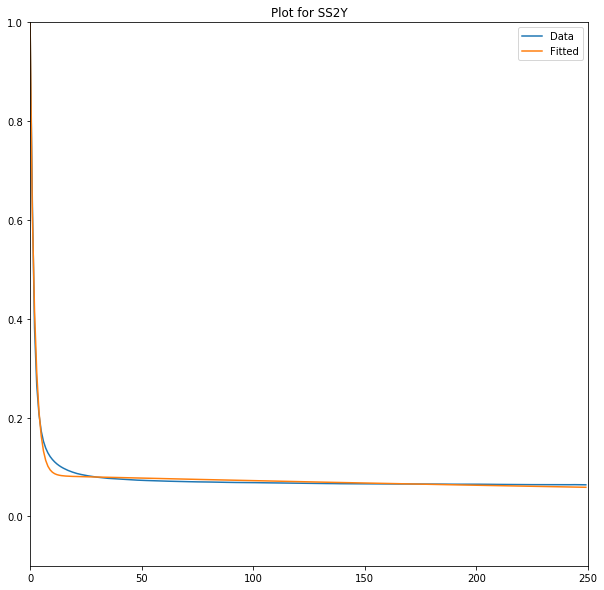

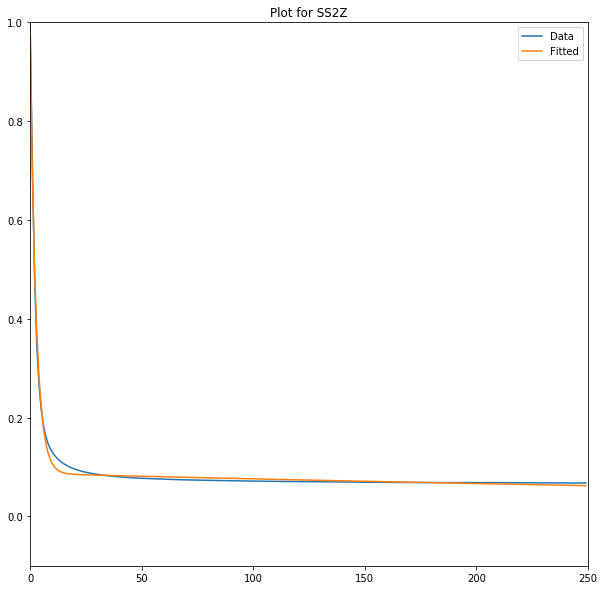

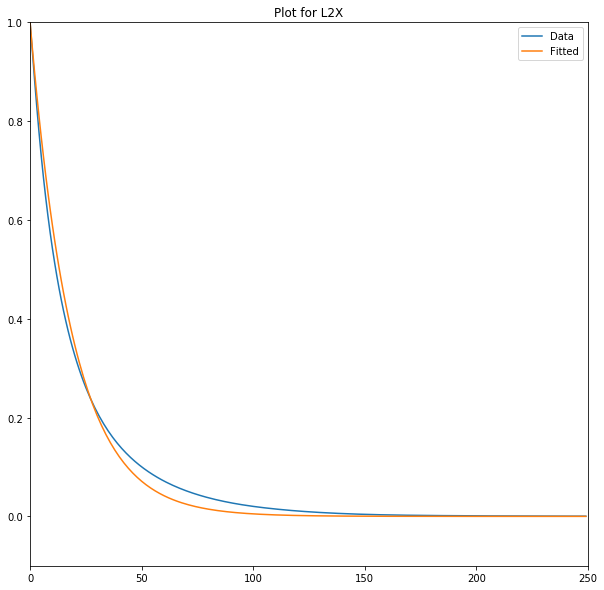

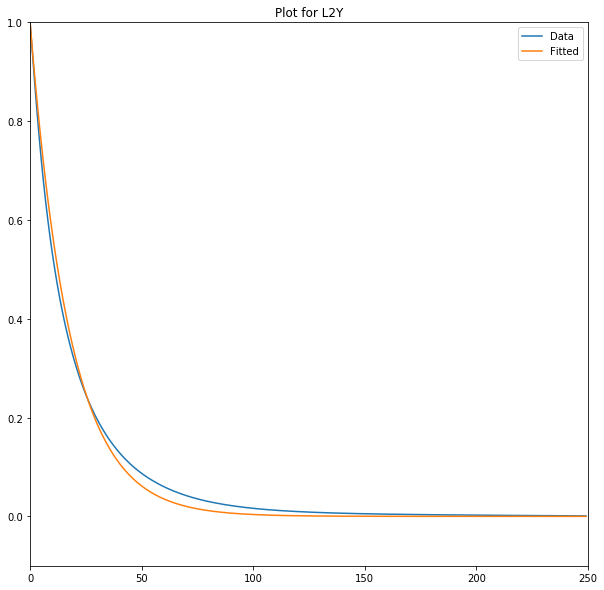

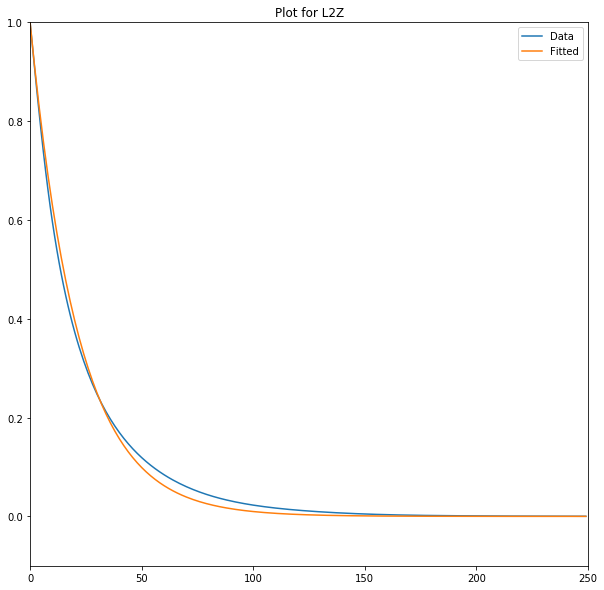

In [7]:
dirs = os.listdir(source_path)

for cdir in ['5', '13']: 
    dirs.remove(cdir)
    dirs.extend([os.path.join(cdir, d) for d in os.listdir(os.path.join(source_path, cdir))])

for dir_name in dirs:
    if dir_name.startswith('.'):
        continue
    data_path = os.path.join(source_path, dir_name) 
    data = read_data(data_path)
    
    dir_path = os.path.join(data_path, 'results')
    if not os.path.exists(dir_path):
        os.mkdir(dir_path)
    print('Current directory: {}'.format(dir_path))
    for tag in tqdm(data):
        phi = data[tag][0] 
        exp_data = normalization(data, tag=tag)
        n = exp_data.shape[0]

        scores = dict()
        for i in range(100):
            if tag.startswith('L2'):
                result = fit_curve(exp_data, f_exp, get_x0_exp, unpack_exp, bounds_exp, 
                                   cons_exp, phi=phi)
            else:
                result = fit_curve(exp_data, f_standard, get_x0_standard,
                                   unpack_standard, bounds_standard, 
                                   cons_exp)
            scores[result['SSE']] = result

        best = min(scores) 
        result = scores[best]

        plot_results(result, tag, dir_path=dir_path)

In [12]:
tag = 'L2X'

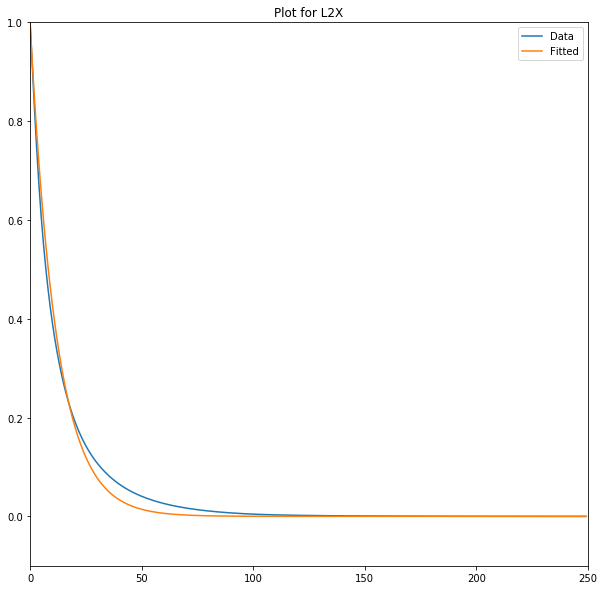

In [13]:
phi = data[tag][0] 
exp_data = normalization(data, tag=tag)
n = exp_data.shape[0]

scores = dict()
for i in range(100):
    if tag.startswith('L2'):
        result = fit_curve(exp_data, f_exp, get_x0_exp, unpack_exp, bounds_exp, 
                           cons_exp, phi=phi)
    else:
        result = fit_curve(exp_data, f_standard, get_x0_standard,
                           unpack_standard, bounds_standard, 
                           cons_exp)
    scores[result['SSE']] = result

best = min(scores) 
result = scores[best]

plot_results(result, tag, dir_path=dir_path)

In [14]:
result

{'x0': [0.8994955906143246, 0.11827279674505942],
 'x': [0.8302396840108425, 15.423867255252853],
 'SSE': 0.05283543282454617,
 'exp_data': [1.0,
  0.9103225597319986,
  0.8226897692738637,
  0.741178373362398,
  0.6687492727517743,
  0.6058462256497221,
  0.5514050262889101,
  0.5038893513102818,
  0.46196412891708555,
  0.4247050066171754,
  0.39147271193942074,
  0.36172610946534767,
  0.33497358931949256,
  0.3108311338223532,
  0.2889871468426901,
  0.2691551893074941,
  0.2511012840367407,
  0.23462900297535474,
  0.21956325247090575,
  0.20575230021002994,
  0.1930584648470979,
  0.18136745510665253,
  0.17057624942794147,
  0.16059033371878983,
  0.15134145259819143,
  0.1427706283425262,
  0.13481236941727137,
  0.12741841984153224,
  0.12054033536448011,
  0.1141316762181351,
  0.10814612951833628,
  0.10254431398352977,
  0.09729438116999574,
  0.0923655916106467,
  0.08773496268814458,
  0.0833784164874926,
  0.079274094119909,
  0.07540288939155233,
  0.0717492965782689,
 